## Python notebook template block B

As of now, you created a new notebook for every study day with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about NAC and the ILO's should be in this one template. Go back to the code you wrote for the previous weeks, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. You are **not** allowed to remove code blocks! All blocks in here need to be filled with code. If you did not write code for a section, leave the code block as is with the pre-filled in comment. Adjust this template to your needs, make sure that all your evidence for all of the ILO's is included.

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️

The ILO's for which you can evidence your code by this notebook are: 

| ILO | Poor | Insufficient | Sufficient | Good | Excellent |
|-----|------|--------------|------------|------|-----------|
| 4.1 | x    | x            | x          | x    | x         |
| 4.2 | x    | x            | x          | x    | x*        |
| 5.0 | x    | x            | x          | x    | x         |
| 7.0 | x    | x            | x          | x    | x         |

4.2 excellent*: If you would like to showcast your graphs using streamlit, you need to hand in a seperate .py file. Evidence accordingly in your learning log.




### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [6]:
# Data manipulation and analysis
import pandas as pd  # Data manipulation using DataFrames
import numpy as np  # Numerical operations and arrays

# Visualization libraries
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Data visualization library based on Matplotlib

# Missing data visualization
import missingno as msno

# Enable iterative imputer
from sklearn.experimental import enable_iterative_imputer

# Data imputation
from sklearn.impute import IterativeImputer, SimpleImputer  # Imputation strategies
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor  # Ensemble methods for imputation

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler  # Feature preprocessing
from sklearn.compose import ColumnTransformer  # Column-specific preprocessing

# Machine learning pipeline
from sklearn.pipeline import Pipeline  # Simplifies the process of transforming and modeling data
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression  # Regression models
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Evaluation metrics
)
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures  # Data encoding and feature transformation
from xgboost import XGBClassifier  # XGBoost classifier for binary classification (from the xgboost library)
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.pipeline import make_pipeline

# Model evaluation and splitting
from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # Regression model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Classification model evaluation
import seaborn as sns  # Data visualization library
import matplotlib.pyplot as plt  # Plotting library
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning

# Feature selection
from sklearn.feature_selection import RFE, SelectFromModel, f_classif

# Support Vector Classification (SVC)
from sklearn.svm import SVC

# Data manipulation and analysis
import pandas as pd  # Data manipulation using DataFrames

# Model evaluation and splitting
from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, davies_bouldin_score, silhouette_score

# LassoCV for L1 regularization
from sklearn.linear_model import LassoCV

# Ensemble methods for imputation and feature importance
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBClassifier, plot_importance

# Clustering
from sklearn.cluster import KMeans  # KMeans clustering algorithm

# Data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Feature preprocessing
from sklearn.impute import SimpleImputer  # Missing data imputation

# Linear models
from sklearn.linear_model import Ridge, Lasso, LinearRegression

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Combining files
import os  # Operating system-dependent functionality

# Working with SQL Database
import mysql.connector

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Cross-validation and XGBoost
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier

# Symbolic computation
from sympy import symbols, Eq, solve, expand, limit, diff, integrate

# Basic mathematical functions and constants
from sympy import sin, cos, exp, log, pi, sqrt, cot, acos, ln, tan, atan

# Alias for sympy
import sympy as sp

# Numerical computation
import numpy as np

# Curve fitting and performance metrics
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Plotting
import matplotlib.pyplot as plt
import numpy as np


#### **For the loading data section, I put that below the Data Management and Understanding section as I needed to clean the data first (Of which the combined data is loaded into)**

## Data Management and Understanding

#### Combing all the CSV files into a single CSV for the NAC Data

### **This fulfills the poor requirement for ILO 4.1**
### **This fulfills the good requirement for ILO 4.2**

In [7]:
# Set the path to the root directory
root_directory =  "C:/Users/rossb/Downloads/2023-24b-fai1-adsai-AlexiKehayias232230/Block B/Deliverables/Final Deliberable Code/NAC Data/CSV"
# Initialize an empty list to store dataframes
dfs = []

# Iterate through each folder in the root directory
for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)

    # Check if the item in the directory is a file
    if os.path.isfile(folder_path):
        print(f"Reading file: {folder}")
        
        # Read the data from the file and append it to the list of dataframes
        df = pd.read_csv(folder_path, encoding='latin1')  
        dfs.append(df)

# Combine all dataframes into a single dataframe
all_data = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a new CSV file
output_csv_path = 'combined_data.csv'
all_data.to_csv(output_csv_path, index=False)

print(f"Combined data saved to {output_csv_path}")

# Get the number of rows
num_rows = df.shape[0]

print(f"The number of rows in the DataFrame is: {num_rows}")

Reading file: Austria 2. Liga 2022_2023.csv
Reading file: Austria Bundesliga 2022_2023.csv
Reading file: Belgium First Division B 2022_2023.csv
Reading file: Bulgaria First League 2022_2023.csv
Reading file: Croatia 1. HNL 2022_2023.csv
Reading file: Cyprus 1. Division 2022_2023.csv
Reading file: Czech FNL 2nd division 2022_2023.csv
Reading file: Czech Fortuna Liga 2022_2023.csv
Reading file: Denmark 1st. Division 2022_2023.csv
Reading file: Denmark Superliga 2022_2023.csv
Reading file: Eredivisie 2022_2023.csv
Reading file: Estonia 1. Division 2023.csv
Reading file: Finland Veikkausliiga 2023.csv
Reading file: France Ligue 2 2022_2023.csv
Reading file: France National 1 2022_2023.csv
Reading file: Germany 2. Bundesliga 2022_2023.csv
Reading file: Germany 3. Liga 2022_2023.csv
Reading file: Germany Regionalliga 2022_2023.csv
Reading file: Greece Super League 2022_2023.csv
Reading file: Hungary NB I 2022_2023.csv
Reading file: Hungary NB II 2022_2023.csv
Reading file: Iceland 2023.csv
R

## Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. This is related to the poor and insufficient criteria of ILO 4.1 and 4.2.

##### **Overview of the combined data before it will be cleaned**

### **This fulfills the insufficient requirement for ILO 4.1**

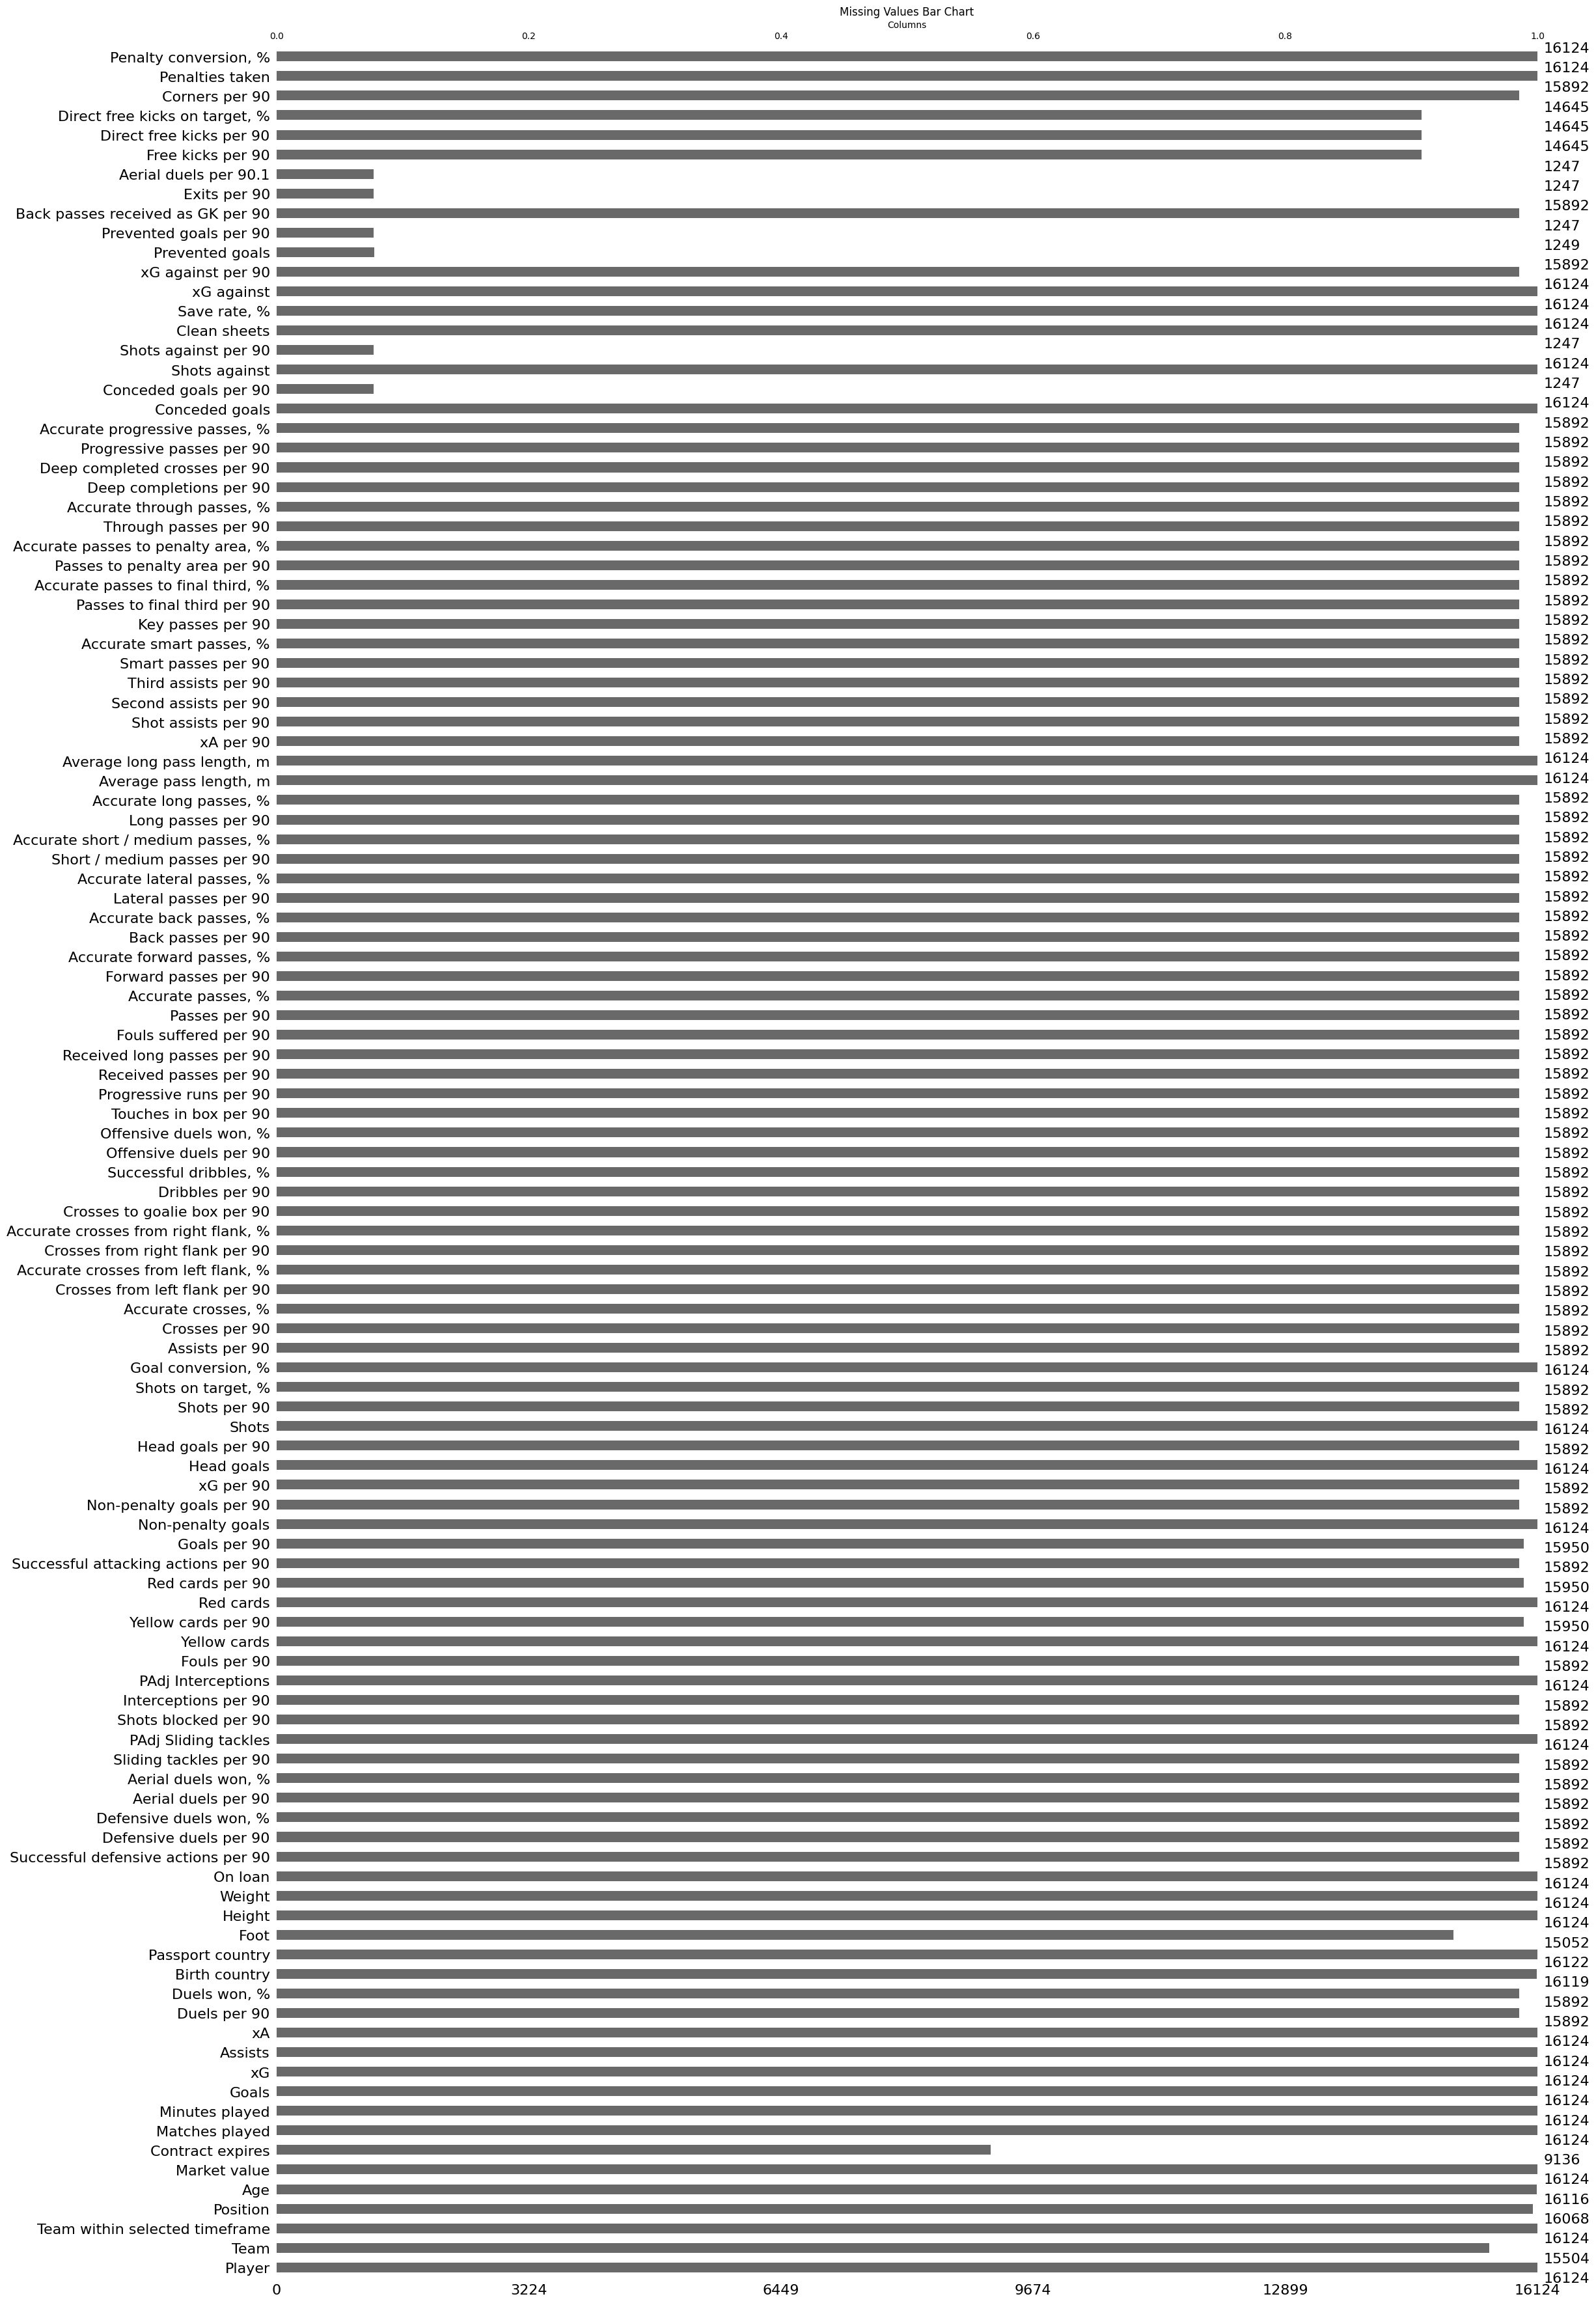

In [8]:
# Load the dataset
CombinedData = pd.read_csv('combined_data.csv')

# Visualize missing values using the msno.bar function
msno.bar(CombinedData)

# Add title and labels
plt.title('Missing Values Bar Chart')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')

# Show the plot
plt.show()


#### There are 7 steps I used to cleansing my data.

**Step 1: Data Preprocessing and Imputation with Machine Learning**

**Step 2: Further Imputation and Feature Engineering**

**Step 3: Position Categorization**

**Step 4: Feature Engineering and Binning**

**Step 5: Data Loading and Imputation**

**Step 6: Replacing missing values using predictions**

**Step 7: Training and Evaluating Regression Models on Football Metrics**

**Step 1: Data Preprocessing and Imputation with Machine Learning**
- This code segment represents the initial phase of data preprocessing for the dataset 'combined_data.csv.' 
- The main objectives include handling missing values, ensuring data consistency, and preparing features for subsequent analysis. 
- The process involves imputing missing values in the 'Duels won, %' column using a machine learning model, handling categorical data through one-hot encoding, and transforming date information into numeric format. 
- The resulting dataset is then saved as 'NAC_PreProcessed_Phase_1.csv,' laying the foundation for further refinement and analysis.

### **This fulfills the poor requirement for ILO 4.2 (Formatting code and comments according to PEP 8 guidelines)**
### **This fulfills the insufficient requirement for ILO 4.2(Reading or scraping a dataset using Python libraries) where I used pandas**

In [9]:
# Step 1: Data Preprocessing and Imputation with Machine Learning

# Load the original dataset
NAC_Data_Phase_1 = pd.read_csv('combined_data.csv', header = 0)

# Identify different types oaumns
categorical_columns = ['Team', 'Position']
numerical_columns = ['Age']
boolean_columns = ['On loan']
text_columns = ['Birth country', 'Passport country']
percentage_columns = ['Duels won, %']

# Ensure 'Duels won, %' column is numeric
NAC_Data_Phase_1['Duels won, %'] = pd.to_numeric(NAC_Data_Phase_1['Duels won, %'], errors='coerce')

# Impute missing values in categorical columns with the mode
for col in categorical_columns:
    NAC_Data_Phase_1[col].fillna(NAC_Data_Phase_1[col].mode()[0], inplace=True)

# Extract year from 'Contract expires' and convert to numeric
NAC_Data_Phase_1['Contract expires'] = pd.to_datetime(NAC_Data_Phase_1['Contract expires'], errors='coerce')
NAC_Data_Phase_1['Contract expires_year'] = NAC_Data_Phase_1['Contract expires'].dt.year

# Define a function to extract year from datetime
def extract_year(df):
    return pd.DataFrame(df['Contract expires'].dt.year)

# Define transformers for numerical, categorical, and date columns
numerical_transformer = IterativeImputer(max_iter=10, random_state=42)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
date_transformer = Pipeline(steps=[
    ('extractor', FunctionTransformer(extract_year, validate=False)),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Bundle transformers for numerical, categorical, and date columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('date', date_transformer, ['Contract expires'])
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Separate data with missing and non-missing values
train_data = NAC_Data_Phase_1[NAC_Data_Phase_1['Duels won, %'].notnull()]
test_data = NAC_Data_Phase_1[NAC_Data_Phase_1['Duels won, %'].isnull()]

# Check if there are samples in the test set
if not test_data.empty:
    # Separate features and target
    X_train = train_data.drop('Duels won, %', axis=1)
    y_train = train_data['Duels won, %']

    # Train the model
    clf.fit(X_train, y_train)

    # Predict the missing values
    NAC_Data_Phase_1.loc[NAC_Data_Phase_1['Duels won, %'].isnull(), 'Duels won, %'] = clf.predict(test_data.drop('Duels won, %', axis=1))
else:
    print("No missing values in 'Duels won, %' column to predict.")

# Impute missing values in boolean columns
NAC_Data_Phase_1['On loan'].fillna('no', inplace=True)

# Impute missing values in text columns
for col in text_columns:
    NAC_Data_Phase_1[col].fillna('Unknown', inplace=True)

# Impute missing values in numerical columns
NAC_Data_Phase_1.loc[:, numerical_columns + percentage_columns] = numerical_transformer.fit_transform(NAC_Data_Phase_1[numerical_columns + percentage_columns])

# Save the modified dataset to a new CSV file
NAC_Data_Phase_1.to_csv('NAC_PreProcessed_Phase_1.csv', index=False)


**Step 2: Further Imputation and Feature Engineering**
- This code segment represents the second phase of data preprocessing for the dataset obtained in Phase 1 ('NAC_PreProcessed_Phase_1.csv'). 
- The focus shifts to handling specific columns, such as 'Market value,' 'xG,' 'Assists,' 'Head goals per 90,' and 'xA.' 
- Imputation techniques are employed, replacing zero values and missing entries with mean values. Additionally, a new feature 'Bin' is created based on market value bins, categorizing players into different value ranges. 
- The resulting dataset is saved as 'NAC_PreProcessed_Phase2.csv,' setting the stage for subsequent analysis and modeling.

### **This fulfills the sufficient requirement for ILO 4.2(Cleaning and pre-processing data using python libraries)**

In [10]:
# Step 2: Further Imputation and Feature Engineering

# Load the preprocessed dataset from Step 1
NAC_Data_Phase_2 = pd.read_csv('NAC_PreProcessed_Phase_1.csv')

# Replace 0 values in 'MarketValue' with the mean
NAC_Data_Phase_2['Market value'].replace(0, NAC_Data_Phase_2['Market value'].mean(), inplace=True)

# Replace missing values in 'xG' with the mean
NAC_Data_Phase_2['xG'].fillna(NAC_Data_Phase_2['xG'].mean(), inplace=True)

# Replace missing values in 'Assists' with the mean
NAC_Data_Phase_2['Assists'].fillna(NAC_Data_Phase_2['Assists'].mean(), inplace=True)

# Replace missing values in 'Head goals per 90' with the mean
NAC_Data_Phase_2['Head goals per 90'].fillna(NAC_Data_Phase_2['Head goals per 90'].mean(), inplace=True)

# Replace missing values in 'xA' with the mean
NAC_Data_Phase_2['xA'].fillna(NAC_Data_Phase_2['xA'].mean(), inplace=True)

#nCreate the 'Bin' feature based on market value
bin_edges = [0, 10_00_00, 50_00_00, float('inf')]
bin_labels = ['Lower Value Bin', 'Medium Value Bin', 'Higher Value Bin']
NAC_Data_Phase_2['Bin'] = pd.cut(NAC_Data_Phase_2['Market value'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Save the cleaned data with the new 'Bin' feature
NAC_Data_Phase_2.to_csv('NAC_PreProcessed_Phase_2.csv', index=False)


**Step 3: Position Categorization**
- This code snippet focuses on categorizing players into distinct roles, namely 'Attackers,' 'Defenders,' or 'Midfielders,' based on their playing positions. 
- A custom function, 'categorize_position,' is created to classify players according to predefined positions associated with each category. 
- The resulting dataset, enriched with the new 'Position_Category' column, is saved as 'NAC_PreProcessed_Phase_3.csv.' 
- This step enhances the dataset by introducing a simplified representation of player roles, facilitating subsequent analysis and interpretation.

In [11]:
# Step 3: Position Categorization

# Load the preprocessed dataset from Step 2
NAC_Data_Phase_3 = pd.read_csv('NAC_PreProcessed_Phase_2.csv')

# Function to categorize players into Attackers, Defenders, Midfielders, and Goal Keepers
def categorize_position(position):
    # Define positions for different categories
    attackers_positions = ['ST', 'CF', 'LW', 'RW']
    defenders_positions = ['LWB', 'LB', 'LCB', 'RCB', 'CB', 'RB', 'RWB']
    midfielders_positions = ['RCM', 'RWF', 'RAMF', 'RCMF', 'AMF', 'RDMF', 'LCMF', 'DMF', 'LAMF', 'LWF']
    goal_keeper_positions = ['GK']  
    
    # Check if the input position belongs to any category
    if isinstance(position, str):
        if any(pos in position for pos in midfielders_positions):
            return 'Midfielders'
        elif any(pos in position for pos in attackers_positions):
            return 'Attackers'
        elif any(pos in position for pos in defenders_positions):
            return 'Defenders'
        elif any(pos in position for pos in goal_keeper_positions):
            return 'Goal Keepers'

    return ''

# Apply the categorization function to create new columns
NAC_Data_Phase_3['Position_Category'] = NAC_Data_Phase_3['Position'].apply(categorize_position)

# Save the updated dataset to a new CSV file
NAC_Data_Phase_3.to_csv('NAC_PreProcessed_Phase_3.csv', index=False)


**Step 4: Feature Engineering and Binning**

- This code snippet represents the concluding phase of feature engineering for the dataset. It involves creating an interaction term, 'Assists*Goals,' to capture the combined impact of assists and goals. Additionally, the 'xG' values are binned into discrete categories ('Very Low,' 'Low,' 'Medium,' 'High,' and 'Very High'). 
- The resulting 'xG_bins' column is one-hot encoded for further analysis. The dataset is then saved as 'NAC_Data_Processed_Final.csv,' reflecting the completion of comprehensive preprocessing and feature engineering steps.

In [12]:
# Step 4: Feature Engineering and Binning

# Load the data from Step 3
NAC_Data_Phase_4 = pd.read_csv("NAC_PreProcessed_Phase_3.csv")

# Create an interaction term 'Assists*Goals'
NAC_Data_Phase_4['Assists*Goals'] = NAC_Data_Phase_4['Assists'] * NAC_Data_Phase_4['Goals']

# Binning 'xG' values
bins = [0, 0.5, 1, 2, 3, 5]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
NAC_Data_Phase_4['xG_bins'] = pd.cut(NAC_Data_Phase_4['xG'], bins=bins, labels=labels)

# One-hot encode the 'xG_bins' column
NAC_Data_Phase_4 = pd.get_dummies(NAC_Data_Phase_4, columns=['xG_bins'], prefix='xG_bin', drop_first=True)

# Save the final processed DataFrame to a new CSV file
NAC_Data_Phase_4.to_csv("NAC_Data_Processed_Phase_4.csv", index=False)


##### **Step 5: Data Loading and Imputation**

 - In this code snippet, the processed data from the previous phase (Phase 4) is loaded into a Pandas DataFrame named NAC_Data_Phase_5 using the pd.read_csv function.
 - To handle missing values in the 'Contract expires' column, the fillna method is applied, replacing any NaN (Not a Number) values with the string 'N/A'. 
 - This step ensures that there are no null values in the specified column.
 - After these modifications, the DataFrame is saved to a new CSV file named "NAC_PreProcessed_Phase_5.csv" using the to_csv method.
 - The parameter index=False is used to exclude the default indexing column in the saved CSV file.


In [13]:
# Step 5: Data Loading and Imputation

# Load the preprocessed dataset from Step 4
NAC_Data_Phase_5 = pd.read_csv("NAC_Data_Processed_Phase_4.csv")
# Assuming df is your DataFrame
NAC_Data_Phase_5['Contract expires'] = NAC_Data_Phase_5['Contract expires'].fillna('N/A')

# Save the modified DataFrame to a new CSV file
NAC_Data_Phase_5.to_csv("NAC_PreProcessed_Phase_5.csv", index=False)

**Step 6: Replacing missing values using predictions**

- The algorithm fills missing values with zeros as a baseline, creating consistency. 
- It converts non-numeric columns to numeric types for imputation. 
- Imputing with mean values maintains statistical characteristics. 
- This ensures data integrity, crucial for unbiased analysis and modeling. 
- Now the dataset is ready for analysis

In [14]:
# Step 6: Replacing missing values using predictions

# Load the preprocessed dataset from Step 5
NAC_Data_Phase_6 = pd.read_csv("NAC_PreProcessed_Phase_5.csv")

# First, replace missing values with 0 for columns with all missing data
NAC_Data_Phase_6.fillna(0, inplace=True)

# List of columns with missing values
columns_with_missing_values = [
    'Duels per 90', 'Foot', 'Yellow cards per 90', 'Red cards per 90',
    'Successful defensive actions per 90', 'Defensive duels per 90',
    'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %',
    'Sliding tackles per 90',
    'Successful attacking actions per 90', 'Goals per 90', 'Non-penalty goals per 90',
    'xG per 90', 'Shots per 90', 'Shots on target, %', 'Assists per 90',
    'Crosses per 90', 'Accurate crosses, %', 'Crosses from left flank per 90',
    'Accurate crosses from left flank, %', 'Crosses from right flank per 90',
    'Accurate crosses from right flank, %', 'Crosses to goalie box per 90',
    'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels per 90',
    'Offensive duels won, %', 'Touches in box per 90', 'Progressive runs per 90',
    'Received passes per 90', 'Received long passes per 90', 'Fouls suffered per 90',
    'Passes per 90', 'Accurate passes, %', 'Forward passes per 90',
    'Accurate forward passes, %', 'Back passes per 90', 'Accurate back passes, %',
    'Lateral passes per 90', 'Accurate lateral passes, %', 'Short / medium passes per 90',
    'Accurate short / medium passes, %', 'Long passes per 90', 'Accurate long passes, %',
    'xA per 90', 'Shot assists per 90', 'Second assists per 90', 'Third assists per 90',
    'Smart passes per 90', 'Accurate smart passes, %', 'Key passes per 90',
    'Passes to final third per 90', 'Accurate passes to final third, %',
    'Passes to penalty area per 90', 'Accurate passes to penalty area, %',
    'Through passes per 90', 'Accurate through passes, %', 'Deep completions per 90',
    'Deep completed crosses per 90', 'Progressive passes per 90',
    'Accurate progressive passes, %', 'Conceded goals per 90', 'Shots against per 90',
    'Prevented goals', 'Prevented goals per 90', 'Back passes received as GK per 90',
    'Exits per 90', 'Free kicks per 90', 'Direct free kicks per 90',
    'Direct free kicks on target, %', 'Corners per 90'
]

# Convert non-numeric columns to numeric types
NAC_Data_Phase_6[columns_with_missing_values] = NAC_Data_Phase_6[columns_with_missing_values].apply(pd.to_numeric, errors='coerce')

# Iterate over each column with missing values and replace with the mean
for column in columns_with_missing_values:
    mean_value = NAC_Data_Phase_6[column].mean()
    NAC_Data_Phase_6[column].fillna(mean_value, inplace=True)

# Save the modified DataFrame to a new CSV file
NAC_Data_Phase_6.to_csv("NAC_PreProcessed_Phase_6.csv", index=False)


**Step 7: Training and Evaluating Regression Models on Football Metrics**

- The algorithm loads preprocessed data, ensuring consistency by replacing missing values with zeros(Handling Missing Values)

- Non-numeric columns in predefined feature lists are converted to numeric types for consistent numeric operations (This is Column-Specific Imputation).

- Random Forest Regressor models predict target variables for football metrics, with mean squared error (MSE) quantifying predictive accuracy (Imputation with Mean Values). 

- Imputed values maintain statistical characteristics, preserving overall dataset integrity for robust modeling(Data Integrity and Consistency)
  
- The updated DataFrame, containing both original and predicted values, is saved ('NAC_PreProcessed_Phase_7.csv')(Preparation for Analysis or Modeling).
  
- This was the final step I needed to take inorder to completely clean my data.

In [15]:
#Step 7: Replacing missing values using predictions

# Load the preprocessed dataset from Step 6
NAC_Data_Phase_7 = pd.read_csv("NAC_PreProcessed_Phase_6.csv")

# Define the features and target variables for each metric

# For Save Rate, %
save_rate_features = [
    'Matches played',
    'Minutes played',
    'Shots against',
    'Shots on target, %',
    'Conceded goals',
    'Yellow cards per 90'
]

# For xG Against
xg_against_features = [
    'xG',
    'Shots against',
    'Shots on target, %'
]

# For xG Against per 90
xg_against_per_90_features = [
    'xG per 90',
    'Shots against per 90'
]

# For Prevented Goals
prevented_goals_features = [
    'Defensive duels per 90',
    'Defensive duels won, %'
]

# For Prevented Goals per 90
prevented_goals_per_90_features = [
    'Successful defensive actions per 90'
]

# For Conceded Goals
conceded_goals_features = [
    'Conceded goals'
]

# For Conceded Goals per 90
conceded_goals_per_90_features = [
    'Conceded goals per 90'
]

# For Back Passes Received as GK per 90
back_passes_received_features = [
    'Back passes received as GK per 90'
]

# For Exits per 90
exits_per_90_features = [
    'Progressive runs per 90',
    'Successful dribbles, %'
]

# For Aerial Duels per 90.1
aerial_duels_per_90_1_features = [
    'Aerial duels per 90',
    'Aerial duels won, %'
]

# For Free Kicks per 90
free_kicks_per_90_features = [
    'Free kicks per 90'
]

# For Direct Free Kicks per 90
direct_free_kicks_per_90_features = [
    'Direct free kicks per 90',
    'Direct free kicks on target, %'
]

# For Corners per 90
corners_per_90_features = [
    'Crosses per 90',
    'Accurate crosses, %',
    'Crosses to goalie box per 90'
]

# For Penalties Taken
penalties_taken_features = [
    'Penalties taken',
    'Penalty conversion, %'
]
# Create an empty list to store individual MSE values
mse_values = []

# Create an empty DataFrame to store all results
all_results_df = pd.DataFrame()

# Function to train and evaluate a model, update df with the predicted values
def train_and_evaluate(features, target):
    global df  # Declare df as global

    X_train, X_test, y_train, y_test = train_test_split(NAC_Data_Phase_7[features], NAC_Data_Phase_7[target], test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)  # Append individual MSE to the list

    # Update df with the predicted values
    NAC_Data_Phase_7.loc[X_test.index, target] = y_pred

# Train and evaluate models for each metric
train_and_evaluate(save_rate_features, 'Save rate, %')
train_and_evaluate(xg_against_features, 'xG against per 90')
train_and_evaluate(prevented_goals_features, 'Prevented goals per 90')
train_and_evaluate(conceded_goals_features, 'Conceded goals per 90')
train_and_evaluate(back_passes_received_features, 'Back passes received as GK per 90')
train_and_evaluate(exits_per_90_features, 'Exits per 90')
train_and_evaluate(aerial_duels_per_90_1_features, 'Aerial duels per 90.1')
train_and_evaluate(free_kicks_per_90_features, 'Free kicks per 90')
train_and_evaluate(direct_free_kicks_per_90_features, 'Direct free kicks on target, %')
train_and_evaluate(corners_per_90_features, 'Corners per 90')
train_and_evaluate(penalties_taken_features, 'Penalty conversion, %')

# Save the all_results_df to a CSV file
NAC_Data_Phase_7.to_csv('NAC_Cleaned.csv', index=False)
print('All results saved')

All results saved


##### **Validating of the cleaning process**

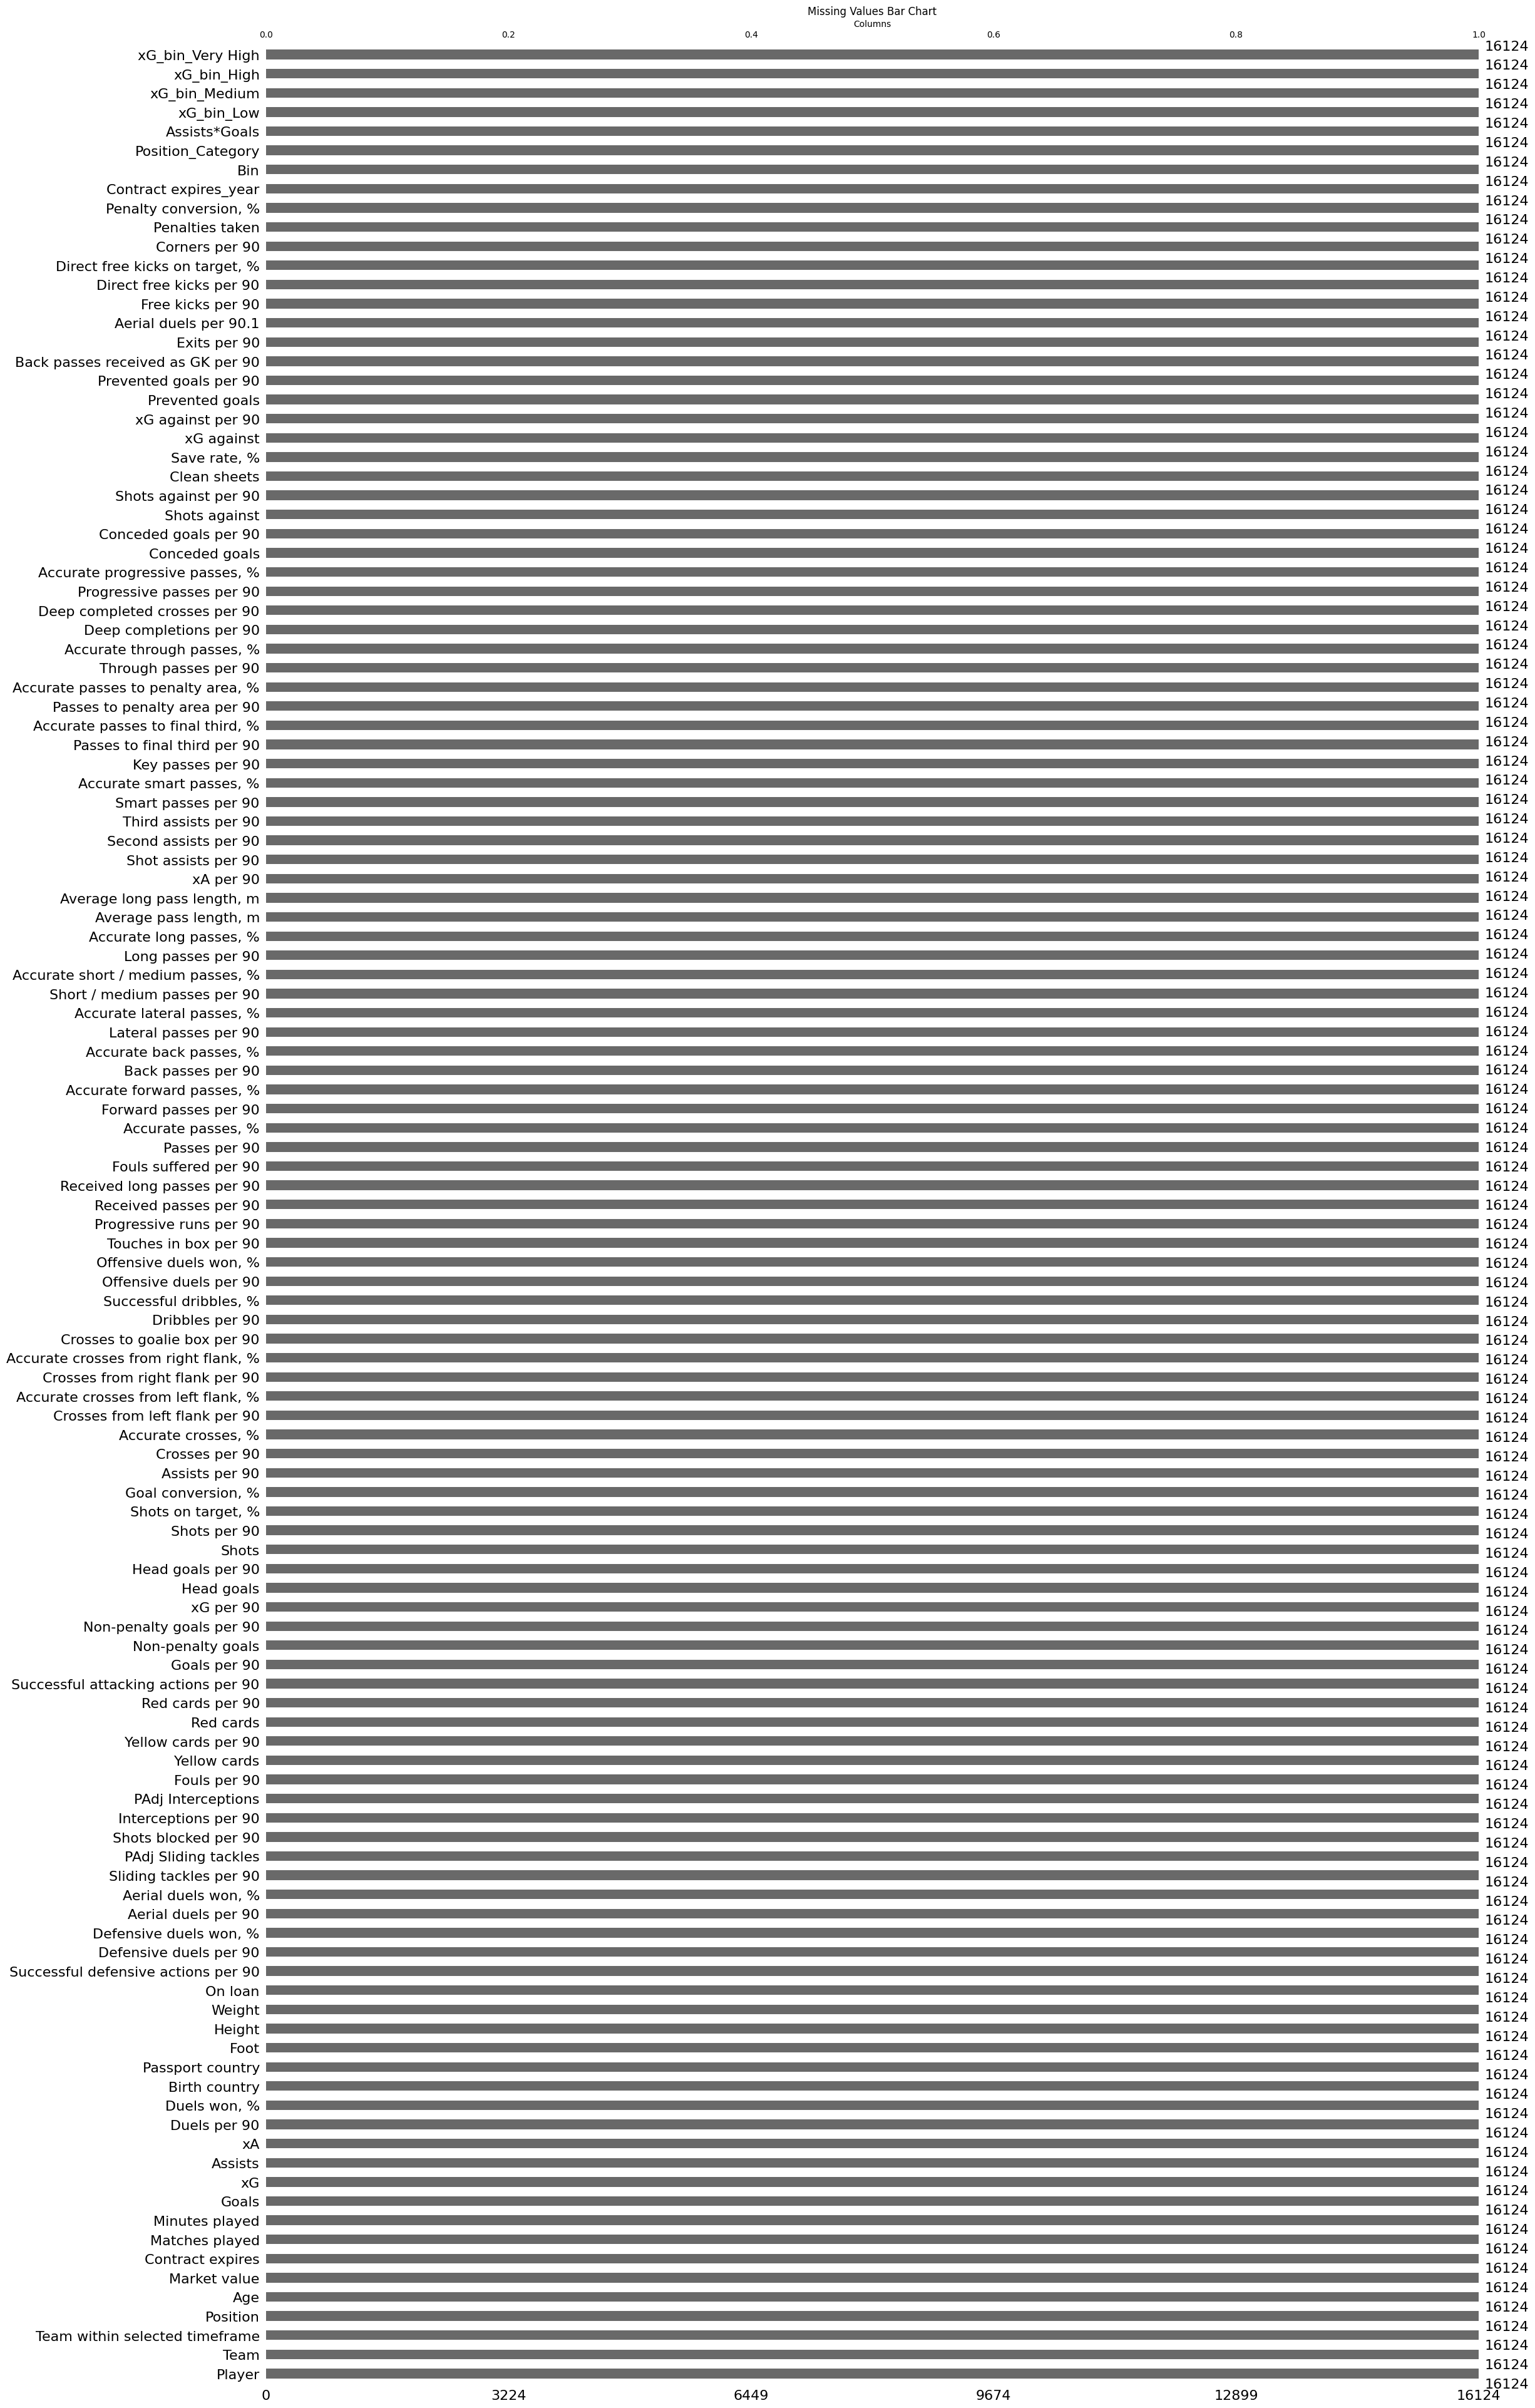

In [16]:
# Load the dataset
CombinedData = pd.read_csv('NAC_Cleaned.csv')

# Visualize missing values using the msno.bar function
msno.bar(CombinedData)

# Add title and labels
plt.title('Missing Values Bar Chart')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')

# Show the plot
plt.show()


## Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

### **This fulfills the sufficient requirement for ILO 4.1**

In [17]:
#Importing the cleaned data into a dataframe called "NAC_Data" which will be used for EDA and ML models
FootBall_Data = pd.read_csv("NAC_Cleaned.csv", header = 0)

# Exploratory Data Analysis and Visualisations

- Include all exploratory Data Analysis questions you studied in this section. This is related to the sufficient and good criteria of ILO 4.1 and 4.2. 
- Include all the visualizations you made in this section. 
- This is related to the excellent criteria of ILO 4.2. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 
❗ If you would like to showcast your visualizations using streamlit, you need to hand in a seperate .py file for this. It is not possible to run streamlit code from a python notebook. 
- Please note down below if you do so.

### **This fulfills the Good requirement for ILO 4.2(Design reports and visuals based on the merged datasets which help provide valuable and actionable insight to the client)**

#### **Phase 1: Performing basic EDA**

#### Questions and Analysis:
##### 1. Number of Numerical Variables
##### 2. Number of Categorical Variables
##### 3. Handling Duplicate Rows
##### 4. Numeric Format for Columns
##### 5. Range of Market Value
##### 6. Country of the Youngest Player

##### 1. Number of Numerical Variables

In [18]:
# Select columns with numerical data in the combine_df DataFrame
numerical_columns = FootBall_Data.select_dtypes(include='number')

# Count the number of non-null values in each numerical column
numerical_cells_count = numerical_columns.count().sum()

# Print the total number of cells with numerical data in the DataFrame
print(f"The number of cells with numerical data in the unified dataset is: {numerical_cells_count}")


The number of cells with numerical data in the unified dataset is: 1741392


##### 2. Number of Categorical Variables

In [19]:
# Select columns with object (categorical) data in the combine_df DataFrame
categorical_columns = FootBall_Data.select_dtypes(include='object')

# Count the number of categorical variables (columns)
num_categorical_variables = len(categorical_columns.columns)

# Print the number of categorical variables
print(f"The number of Categorical Variables: {num_categorical_variables}")


The number of Categorical Variables: 10


##### 4. Numeric Format for Columns

In [20]:
# Display concise information about the DataFrame including data types, non-null counts, and memory usage
FootBall_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16124 entries, 0 to 16123
Columns: 122 entries, Player to xG_bin_Very High
dtypes: bool(4), float64(92), int64(16), object(10)
memory usage: 14.6+ MB


##### 5. Range of Market Value

In [21]:
# Calculate the range of the 'Market value' column in the combine_df DataFrame
market_value_range = FootBall_Data['Market value'].max() - FootBall_Data['Market value'].min()

# Print the calculated range of market values
print(f"Range of Market Value: {market_value_range}")


Range of Market Value: 59990000.0


##### 6. Country of the Youngest Player

In [22]:
# Find the index of the youngest player (assuming 'Age' represents player ages)
youngest_player_index = FootBall_Data['Age'].idxmin()

# Remove any leading or trailing whitespaces in column names
FootBall_Data.columns = FootBall_Data.columns.str.strip()

# Try to locate the column again using the corrected index
try:
    # Retrieve the country of the youngest player using the located index and 'Birth country' column
    youngest_player_country = FootBall_Data.loc[youngest_player_index, 'Birth country']
    
    # Print the result
    print(f"The youngest player's country is: {youngest_player_country}")
except KeyError:
    # Handle the case where the specified column name is not found
    print("Column not found. Please check the column names.")


The youngest player's country is: Estonia


#### **Phase 2: Advanced EDA**

##### **This analysis covers a broader aspect where we look into details shown below in the leagues which NAC Play in:**

1. Comparing average goals per match amongst Attackers.
  
2. Comparing average assists per match amongst Attackers.

3. K-Means Clustering for Offensive Performance

4. Clustering Players based on Attacking Playmaking Features

5. Comparing average assists per match amongst Midfielders.

6. Comparing average goals per match amongst Midfielders.

7. Passing Metrics Amongst Midfielders.

8. Attacking Metrics Amongst Midfielders.
   
9.  Defensive Performance Measurement.

10. Correlation between Goalkeepers' Exits and Defensive Performance Metrics.
  
- Please note: There was insufficient data for some clubs such as Emmen, so it yielded no result(Even after attemping to use predictions for missing data, it yielded no result)

#### **1. Comparing average goals per match amongst Attackers.**

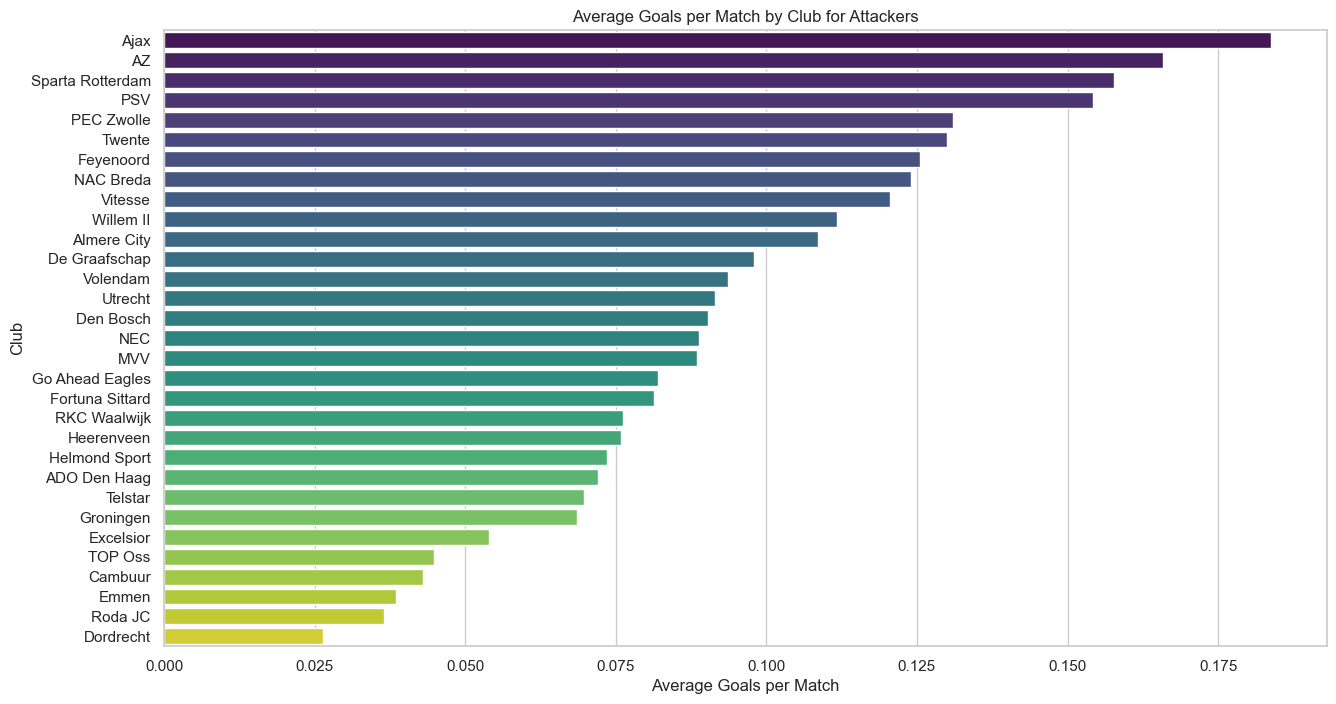

In [23]:
# Apply the categorization function to create new columns
FootBall_Data['Position_Category'] = FootBall_Data['Position'].apply(categorize_position)

# Filter for Attacking players only
midfielder_players_data = FootBall_Data[FootBall_Data['Position_Category'] == 'Attackers']

# List of specified clubs
specified_clubs = [
    'ADO Den Haag', 'SC Cambuur', 'FC Den Bosch', 'FC Dordrecht', 'FC Eindhoven',
    'FC Emmen', 'De Graafschap', 'FC Groningen', 'Helmond Sport', 'Jong Ajax',
    'Jong AZ', 'Jong PSV', 'Jong FC Utrecht', 'MVV Maastricht', 'NAC Breda',
    'Roda JC Kerkrade', 'SC Telstar', 'TOP Oss', 'VVV-Venlo', 'Willem II',
    'ADO Den Haag', 'Ajax', 'AZ', 'Excelsior', 'Feyenoord', 'Go Ahead Eagles',
    'Groningen', 'Heerenveen', 'Heracles Almelo', 'NEC', 'PEC Zwolle', 'PSV',
    'Roda JC', 'Sparta Rotterdam', 'Twente', 'Utrecht', 'Vitesse', 'Willem II',
    'Almere City', 'Cambuur', 'De Graafschap', 'Den Bosch', 'Dordrecht',
    'FC Eindhoven', 'Emmen', 'Fortuna Sittard', 'Helmond Sport', 'MVV',
    'NAC Breda', 'TOP Oss', 'RKC Waalwijk', 'Telstar', 'Volendam', 'VVV-Venlo'
]

# Filter for specified clubs only
attackers_data = FootBall_Data[FootBall_Data['Team'].isin(specified_clubs)]

# Calculate average goals per match by club
average_goals_per_match = attackers_data.groupby('Team').apply(lambda x: x['Goals'].sum() / x['Matches played'].sum()).reset_index()
average_goals_per_match.columns = ['Team', 'Average Goals per Match']

# Sort the data by average goals per match
average_goals_per_match = average_goals_per_match.sort_values(by='Average Goals per Match', ascending=False)

# Set the style to whitegrid
sns.set(style="whitegrid")

# Define a color palette using the 'viridis' colormap
color_palette = sns.color_palette('viridis', len(average_goals_per_match))

# Plotting average goals per match by club using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Average Goals per Match', y='Team', data=average_goals_per_match, palette=color_palette, hue='Team', legend=False)

# Adding labels and title
plt.xlabel('Average Goals per Match')
plt.ylabel('Club')
plt.title('Average Goals per Match by Club for Attackers')

# Show the plot
plt.show()


#### **What this algorithm shows:**

1. **Calculating Average Goals per Match:**
   - It calculates the average goals per match for each club based on the goals and matches played by the attackers. 
   - This metric provides insights into the offensive performance of attackers from different clubs.

2. **Data Visualization:** 
   - It uses Seaborn to create a bar plot visualizing the average goals per match for each club. 
   - The color palette helps differentiate between clubs, and the plot is organized to highlight the clubs with the highest average goals per match.
   
3. **What this analysis is telling us:** 
   - The analysis aims to understand and compare the offensive efficiency of attackers from different clubs.
   - Identifying and handling zero market values ensures the robustness of the market value analysis.
   - Imputing market values based on medians helps maintain the statistical characteristics of the dataset.
   - The visualization provides a clear and concise representation of the average goals per match for each club, aiding in the comparison and identification of high-performing clubs in terms of attacking prowess.
   
- **Justification for the features I chose for this question:**

1. **'Market value'**:
   - Used for filtering out players with a market value of 0, imputing missing values, and analyzing the market values of attackers.

2. **'Position'**:
   - Filters the dataset for attackers and is used for grouping data for market value imputation.

3. **'Team'**:
   - Filters the dataset for specified clubs and is crucial for grouping data to calculate the average goals per match.

4. **'Average Goals per Match'**:
   - Calculated based on goals and matches played, providing a metric for comparing the performance of attackers in different clubs.


#### **2. Comparing average assists per match amongst Attackers.**

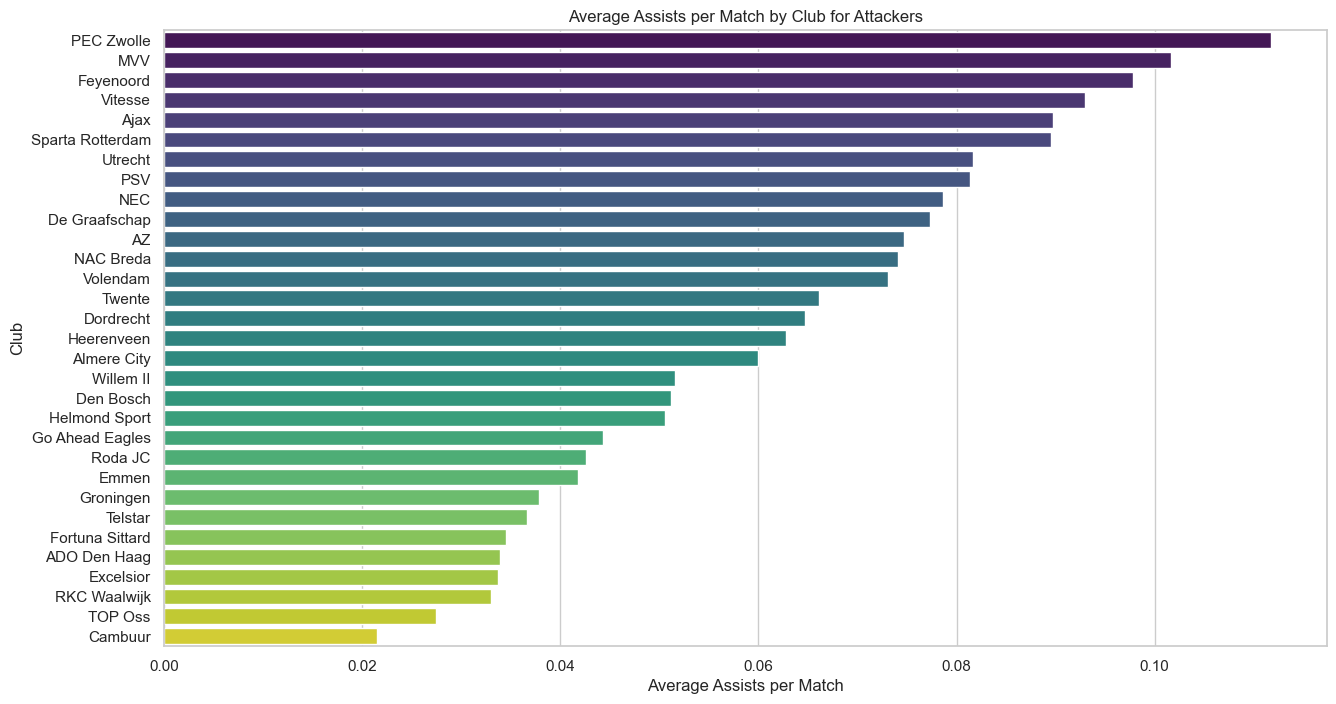

In [24]:
# Apply the categorization function to create new columns
FootBall_Data['Position_Category'] = FootBall_Data['Position'].apply(categorize_position)

# Filter for Attacking players only
midfielder_players_data = FootBall_Data[FootBall_Data['Position_Category'] == 'Attackers']

# List of specified clubs
specified_clubs = [
    'ADO Den Haag', 'SC Cambuur', 'FC Den Bosch', 'FC Dordrecht', 'FC Eindhoven',
    'FC Emmen', 'De Graafschap', 'FC Groningen', 'Helmond Sport', 'Jong Ajax',
    'Jong AZ', 'Jong PSV', 'Jong FC Utrecht', 'MVV Maastricht', 'NAC Breda',
    'Roda JC Kerkrade', 'SC Telstar', 'TOP Oss', 'VVV-Venlo', 'Willem II',
    'ADO Den Haag', 'Ajax', 'AZ', 'Excelsior', 'Feyenoord', 'Go Ahead Eagles',
    'Groningen', 'Heerenveen', 'Heracles Almelo', 'NEC', 'PEC Zwolle', 'PSV',
    'Roda JC', 'Sparta Rotterdam', 'Twente', 'Utrecht', 'Vitesse', 'Willem II',
    'Almere City', 'Cambuur', 'De Graafschap', 'Den Bosch', 'Dordrecht',
    'FC Eindhoven', 'Emmen', 'Fortuna Sittard', 'Helmond Sport', 'MVV',
    'NAC Breda', 'TOP Oss', 'RKC Waalwijk', 'Telstar', 'Volendam', 'VVV-Venlo'
]

# Filter for specified clubs only
attacker_players_data = FootBall_Data[FootBall_Data['Team'].isin(specified_clubs)]

# Calculate average assists per match by club for attackers
average_assists_per_match = attacker_players_data.groupby('Team').apply(lambda x: x['Assists'].sum() / x['Matches played'].sum()).reset_index()
average_assists_per_match.columns = ['Team', 'Average Assists per Match']

# Sort the data by average assists per match
average_assists_per_match = average_assists_per_match.sort_values(by='Average Assists per Match', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Average Assists per Match', y='Team', data=average_assists_per_match, palette='viridis', hue='Team', legend=False)

plt.xlabel('Average Assists per Match')
plt.ylabel('Club')
plt.title('Average Assists per Match by Club for Attackers')

plt.show()

#### **What this algorithm shows**
- This code analyzes and visualizes the average assists per match for attackers in specified football clubs.
- As we can see in the case of NAC Breda, they are in the middle as compared to all the clubs they play against.

#### **Justification for the features I chose for this question:**
  
**1. Average Assists per Match**
- This variable represents the performance metric being analyzed. 
- It provides insights into the average number of assists per match for attackers in each club, which is valuable for evaluating playmaking contributions.
    
**2. Team**
  - This variable represents the categorical data for which the analysis is conducted. 
  - Grouping the data by teams allows for a club-level comparison of average assists per match for attackers, providing insights into the playmaking efficiency of different clubs.

#### **3. K-Means Clustering for Offensive Performance**

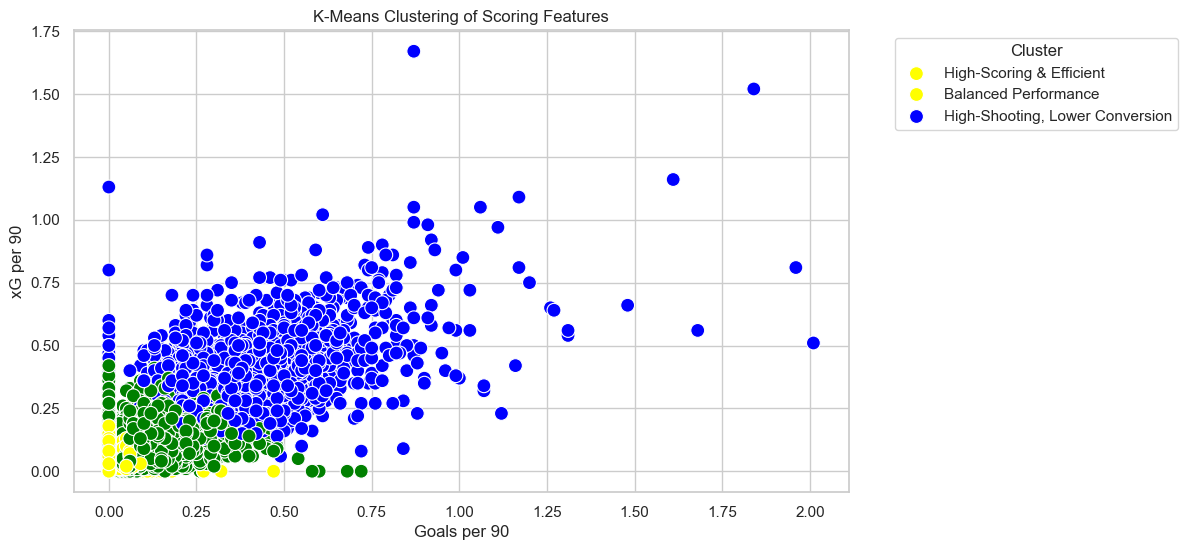

In [25]:
# Assigning the features to a DataFrame called Attack_Data
Attack_Data = FootBall_Data[['Goals per 90', 'xG per 90', 'Shots per 90', 'Goal conversion, %']].copy()  # Create a copy to avoid SettingWithCopyWarning

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(Attack_Data)

# Choosing the optimal number of clusters (k)
optimal_k = 3

# Apply k-means clustering with the chosen k and set n_init
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(data_standardized)

# Add the 'Cluster' column to the original DataFrame
Attack_Data['Cluster'] = clusters

# Scatter plot with custom colors for clusters
plt.figure(figsize=(10, 6))
custom_colors = ['yellow', 'blue', 'green']  # Adjusted to match the chosen number of clusters
sns.scatterplot(x='Goals per 90', y='xG per 90', hue='Cluster', data=Attack_Data, palette=custom_colors, s=100)

# Add legend labels
legend_labels = {
    0: 'High-Scoring & Efficient',
    1: 'Balanced Performance',
    2: 'High-Shooting, Lower Conversion',
}

plt.title('K-Means Clustering of Scoring Features')
plt.xlabel('Goals per 90')
plt.ylabel('xG per 90')
plt.legend(title='Cluster', labels=legend_labels.values(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### **Analysis**

- Here I worked with the features which had the closest relation to Scoring:
  1. Goals per 90 (Goals)
  2. xG per 90 (Expected Goals)
  3. Shots per 90
  4. Goal conversion %

#### **High-Scoring & Efficient Cluster:**
- **Goals per 90**: 0.0098
- **xG per 90**: 0.0382
- **Shots per 90**: 0.483
- **Goal conversion, %**: 1.69%

**Analysis:**
   - Represents teams with low goal-scoring efficiency. Low average goals and xG per 90, modest shooting volume, and a modest goal conversion rate.

####  **Balanced Performance Cluster**
- **Goals per 90**: 0.4005
- **xG per 90**: 0.3811
- **Shots per 90**: 2.443
- **Goal conversion, %**: 17.44%

**Analysis:**
   - Represents teams with high goal-scoring efficiency. High average goals and xG per 90, significant shooting volume, and a high goal conversion rate.

#### **High-Shooting, Lower Conversion Cluster**
- **Goals per 90**: 0.1431
- **xG per 90**: 0.1391
- **Shots per 90**: 1.272
- **Goal conversion, %**: 15.41%

**Analysis:**
   - Represents teams with moderate goal-scoring efficiency. Moderate average goals and xG per 90, moderate shooting volume, and a moderate goal conversion rate.

####  **Overall Summary:**
- **Balanced Performance Cluster** stands out with high goal-scoring efficiency, characterized by high goals and xG, significant shooting volume, and a high goal conversion rate.
- **High-Shooting, Lower Conversion Cluster** represents teams with moderate characteristics in goals, xG, shots, and goal conversion rate.
- **High-Scoring & Efficient Cluster** indicates teams with lower goal-scoring efficiency, featuring lower goals and xG, lower shooting volume, and a modest goal conversion rate.


#### **4. Clustering Players based on Attacking Playmaking Features**


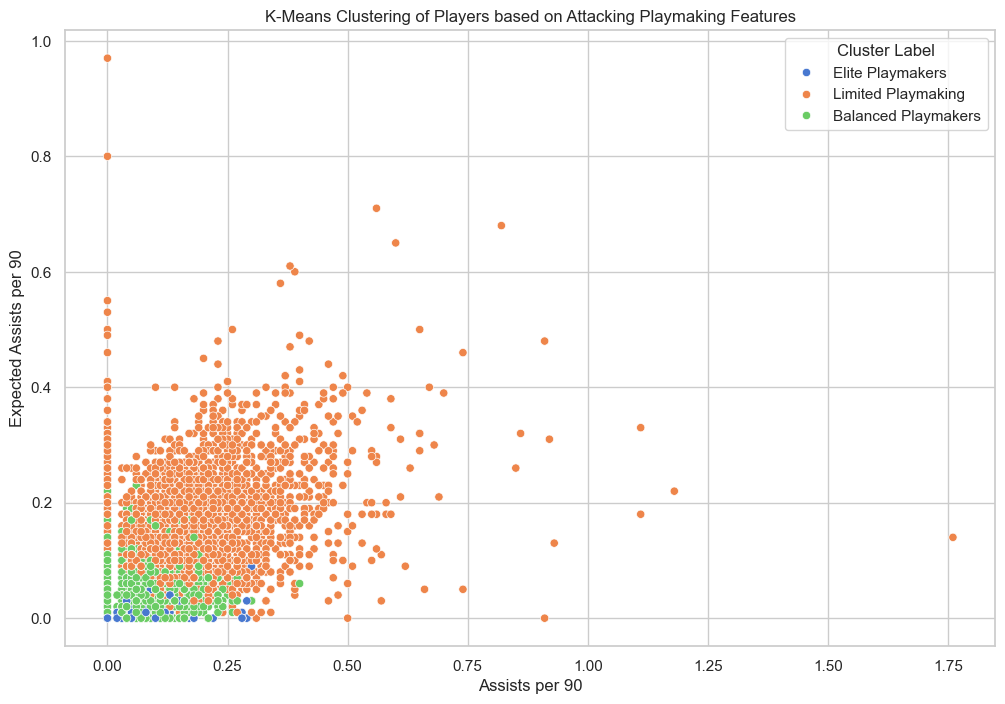

In [26]:
# Selecting relevant features for clustering
attacking_playmaking_features = FootBall_Data[['Assists per 90', 'xA per 90', 'Key passes per 90', 'Dribbles per 90', 'Successful dribbles, %', 'Crosses per 90', 'Accurate crosses, %']]

# Standardize the features
scaler = StandardScaler()
attacking_playmaking_features_scaled = scaler.fit_transform(attacking_playmaking_features)

# Choosing the k value to be 3:
Optimal_Clusters = 3

kmeans = KMeans(n_clusters=Optimal_Clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(attacking_playmaking_features_scaled)

# Adding the cluster labels to the original DataFrame
FootBall_Data['Cluster'] = cluster_labels

# Define cluster labels
cluster_labels_dict = {
    0: 'Balanced Playmakers',
    1: 'Elite Playmakers',
    2: 'Limited Playmaking'
}

# Map cluster labels to the DataFrame
FootBall_Data['Cluster Label'] = FootBall_Data['Cluster'].map(cluster_labels_dict)

# Use a distinct color palette
color_palette = sns.color_palette("muted", n_colors=Optimal_Clusters)

# Scatter plot for two of the features (you can choose any two)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Assists per 90', y='xA per 90', hue='Cluster Label', data=FootBall_Data, palette=color_palette)
plt.title('K-Means Clustering of Players based on Attacking Playmaking Features')
plt.xlabel('Assists per 90')
plt.ylabel('Expected Assists per 90')
plt.show()


#### **Analysis and Interpretation of the graphs**

- **The following are insights into what exactly each cluster represents:**

##### **1.Elite Playmakers Cluster**
  - This cluster comprises players who excel in all attacking playmaking features. 
  - They are highly involved in creating scoring opportunities, delivering accurate crosses, and successfully completing dribbles.
  - It has high values across all the features
  - The high values are significantly above  the cluster mean.
  
##### **2. Balanced Playmakers Cluster**
  - This cluster represents players with a balanced performance in various attacking playmaking aspects. 
  - They contribute moderately across all the different metrics
  -  The medium values are around the cluster mean.

##### **3. Limited Playmaking Cluster**
   - This cluster represents players with relatively lower involvement in attacking playmaking.
   -  They contribute less to all the features.
   -  The low values are significantly below the cluster mean.
  

- The most relevant features I chose for the cluster observations above are:
1. Assists per 90
2. xA per 90:
3. Key passes per 90
4. Dribbles per 90
5. Successful dribbles, %
6. Crosses per 90
7. Accurate crosses, %

#### **Some Insights:**
- **Elite Playmakers Cluster:** Conservative playmaking with a focus on key passes and moderate dribbling.

- **Limited Playmaking Cluster:** Versatile and active playmakers excelling in various aspects.

- **Balanced Playmakers Cluster:** Balanced and moderate playmaking profile across various aspects.


#### **5. Comparing average assists per match amongst Midfielders**



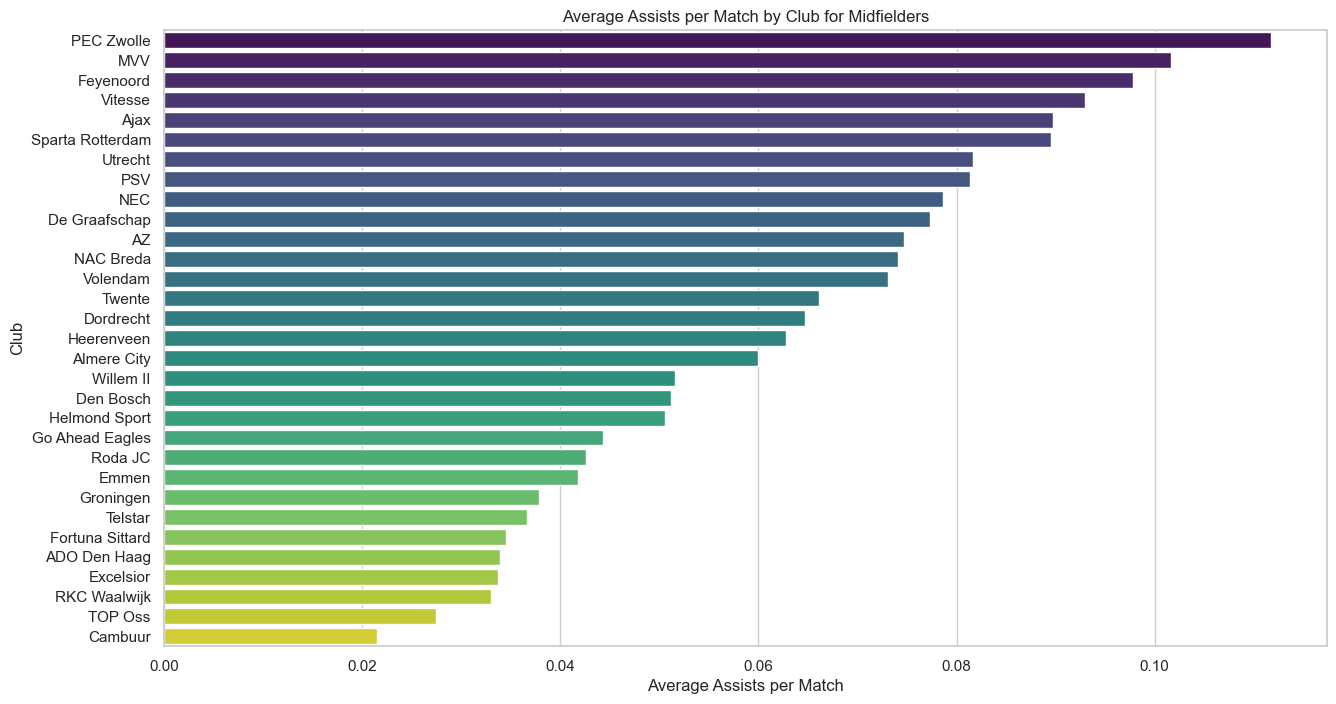

In [27]:
# Apply the categorization function to create new columns
FootBall_Data['Position_Category'] = FootBall_Data['Position'].apply(categorize_position)

# Filter for Midfielder players only
midfielder_players_data = FootBall_Data[FootBall_Data['Position_Category'] == 'Midfielders']


# List of specified clubs
specified_clubs = [
    'ADO Den Haag', 'SC Cambuur', 'FC Den Bosch', 'FC Dordrecht', 'FC Eindhoven',
    'FC Emmen', 'De Graafschap', 'FC Groningen', 'Helmond Sport', 'Jong Ajax',
    'Jong AZ', 'Jong PSV', 'Jong FC Utrecht', 'MVV Maastricht', 'NAC Breda',
    'Roda JC Kerkrade', 'SC Telstar', 'TOP Oss', 'VVV-Venlo', 'Willem II',
    'ADO Den Haag', 'Ajax', 'AZ', 'Excelsior', 'Feyenoord', 'Go Ahead Eagles',
    'Groningen', 'Heerenveen', 'Heracles Almelo', 'NEC', 'PEC Zwolle', 'PSV',
    'Roda JC', 'Sparta Rotterdam', 'Twente', 'Utrecht', 'Vitesse', 'Willem II',
    'Almere City', 'Cambuur', 'De Graafschap', 'Den Bosch', 'Dordrecht',
    'FC Eindhoven', 'Emmen', 'Fortuna Sittard', 'Helmond Sport', 'MVV',
    'NAC Breda', 'TOP Oss', 'RKC Waalwijk', 'Telstar', 'Volendam', 'VVV-Venlo'
]

# Filter for specified clubs only
midfielder_players_data = FootBall_Data[FootBall_Data['Team'].isin(specified_clubs)]

# Calculate average assists per match by club for midfielders
average_assists_per_match = midfielder_players_data.groupby('Team').apply(lambda x: x['Assists'].sum() / x['Matches played'].sum()).reset_index()
average_assists_per_match.columns = ['Team', 'Average Assists per Match']

# Sort the data by average assists per match
average_assists_per_match = average_assists_per_match.sort_values(by='Average Assists per Match', ascending=False)

# Set the style to whitegrid
sns.set(style="whitegrid")

# Define a color palette using the 'viridis' colormap
color_palette = sns.color_palette('viridis', len(average_assists_per_match))

# Plotting average assists per match by club for midfielders using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Average Assists per Match', y='Team', data=average_assists_per_match, hue='Team', palette=color_palette, legend=False)

plt.xlabel('Average Assists per Match')
plt.ylabel('Club')
plt.title('Average Assists per Match by Club for Midfielders')

plt.show()

#### **What this algorithm shows:**

- This algorithm calculates and visualizes the average assists per match by club for midfielders
- It helps visually compare the midfielders' average assists per match across different football clubs, allowing for easy identification of clubs with higher or lower average assist contributions from midfield players

#### **6. Comparing average goals per match amongst Midfielders.**

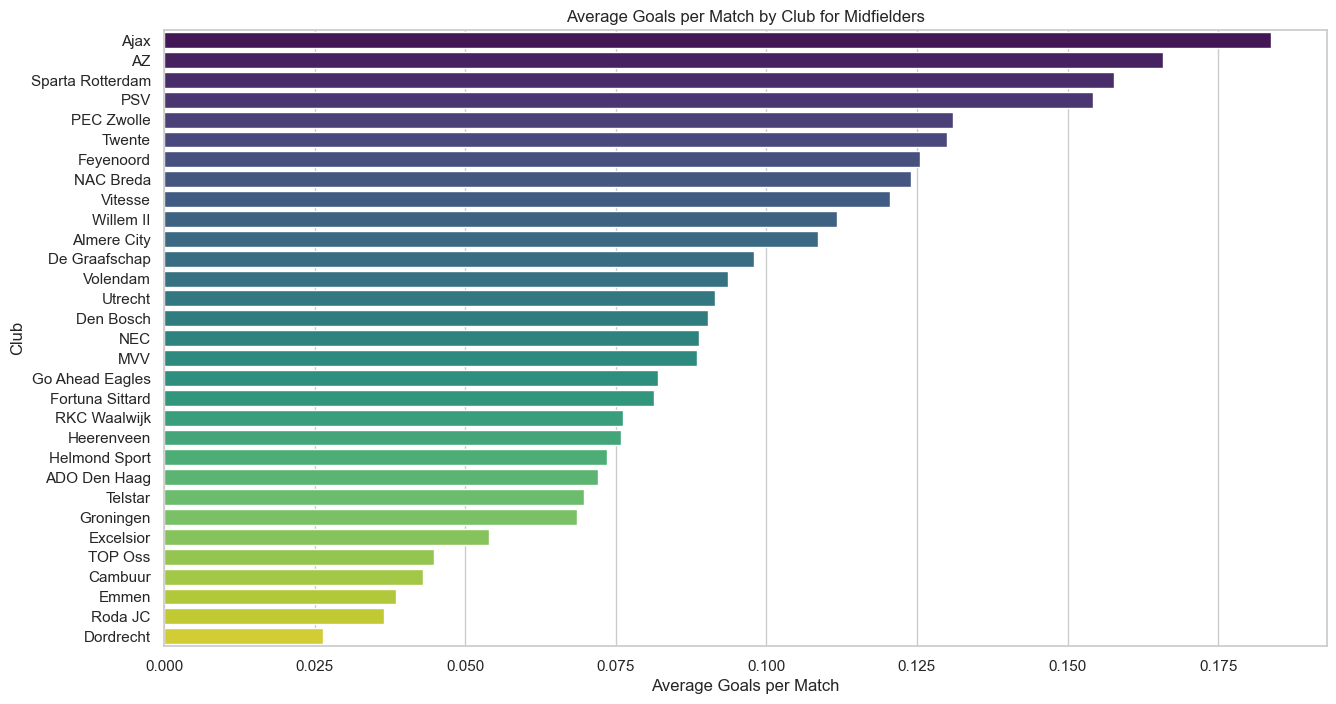

In [28]:
# Apply the categorization function to create new columns
FootBall_Data['Position_Category'] = FootBall_Data['Position'].apply(categorize_position)

# Filter for Midfielder players only
midfielder_players_data = FootBall_Data[FootBall_Data['Position_Category'] == 'Midfielders']

# List of specified clubs
specified_clubs = [
    'ADO Den Haag', 'SC Cambuur', 'FC Den Bosch', 'FC Dordrecht', 'FC Eindhoven',
    'FC Emmen', 'De Graafschap', 'FC Groningen', 'Helmond Sport', 'Jong Ajax',
    'Jong AZ', 'Jong PSV', 'Jong FC Utrecht', 'MVV Maastricht', 'NAC Breda',
    'Roda JC Kerkrade', 'SC Telstar', 'TOP Oss', 'VVV-Venlo', 'Willem II',
    'ADO Den Haag', 'Ajax', 'AZ', 'Excelsior', 'Feyenoord', 'Go Ahead Eagles',
    'Groningen', 'Heerenveen', 'Heracles Almelo', 'NEC', 'PEC Zwolle', 'PSV',
    'Roda JC', 'Sparta Rotterdam', 'Twente', 'Utrecht', 'Vitesse', 'Willem II',
    'Almere City', 'Cambuur', 'De Graafschap', 'Den Bosch', 'Dordrecht',
    'FC Eindhoven', 'Emmen', 'Fortuna Sittard', 'Helmond Sport', 'MVV',
    'NAC Breda', 'TOP Oss', 'RKC Waalwijk', 'Telstar', 'Volendam', 'VVV-Venlo'
]

# Filter for specified clubs only
midfielder_players_data = FootBall_Data[FootBall_Data['Team'].isin(specified_clubs)]

# Calculate average goals per match by club for midfielders
average_goals_per_match = midfielder_players_data.groupby('Team').apply(lambda x: x['Goals'].sum() / x['Matches played'].sum()).reset_index()
average_goals_per_match.columns = ['Team', 'Average Goals per Match']

# Sort the data by average goals per match
average_goals_per_match = average_goals_per_match.sort_values(by='Average Goals per Match', ascending=False)

# Set the style to whitegrid
sns.set(style="whitegrid")

# Define a color palette using the 'viridis' colormap
color_palette = sns.color_palette('viridis', len(average_goals_per_match))

# Plotting average goals per match by club for midfielders using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Average Goals per Match', y='Team', data=average_goals_per_match, hue='Team', palette=color_palette, legend=False)

plt.xlabel('Average Goals per Match')
plt.ylabel('Club')
plt.title('Average Goals per Match by Club for Midfielders')

plt.show()

#### 7. **Passing Metrics Amongst Midfielders**
*Question:* How do the passing metrics of midfielders, including Passes per 90, Accurate passes, %, Forward passes per 90, and Average pass length, m, contribute to their team's possession-based playing style?

- **Features I will be using:**
1. **Passes per 90:** Highlights the involvement of the midfielder in ball circulation and possession.
2. **Accurate passes, %:** Reflects passing accuracy, an essential skill for maintaining possession.
3. **Forward passes per 90:** Indicates the midfielder's ability to contribute to attacking plays.
4. **Average pass length, m:** Gives an idea of the midfielder's passing range and vision.

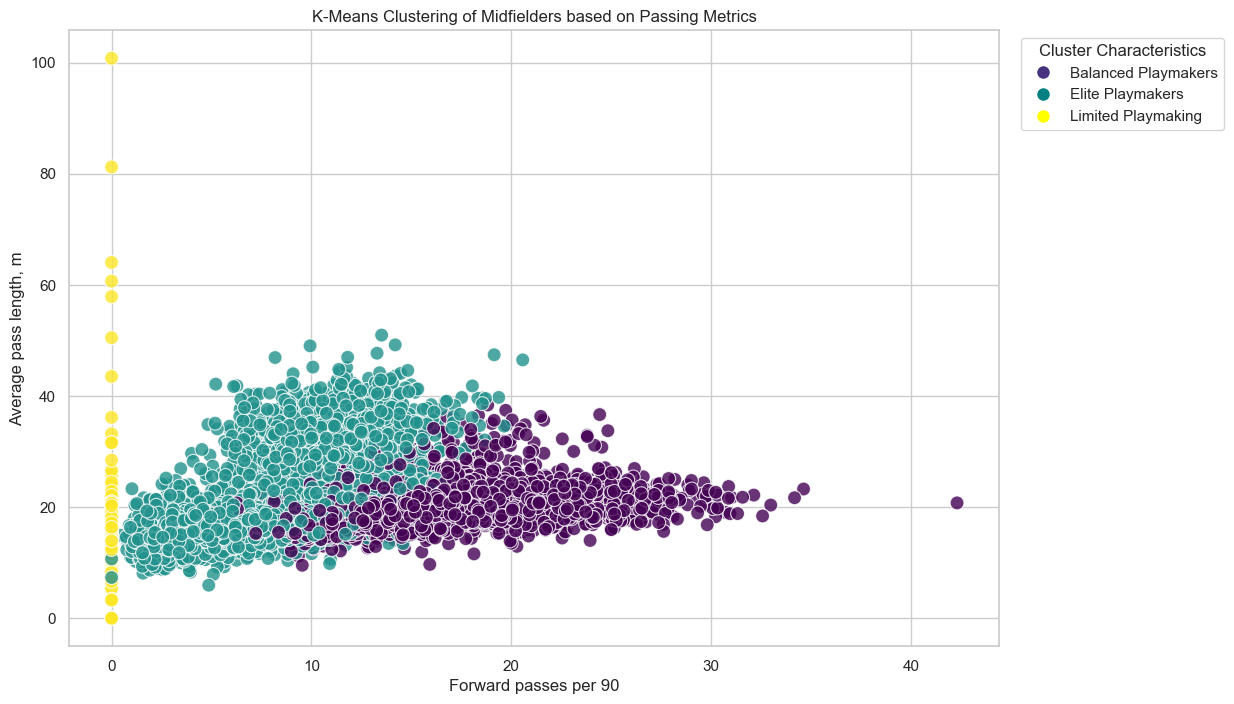

In [29]:
# Select relevant passing metrics for clustering
passing_metrics = FootBall_Data[['Average pass length, m', 'Forward passes per 90', 'Accurate passes, %', 'Passes per 90']]

#Selecting number of optimal clusters
optimal_clusters = 3

# Fit k-means model and obtain cluster labels
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # Set explicit value for n_init
FootBall_Data['Cluster'] = kmeans.fit_predict(passing_metrics)

# Visualize the clusters in a scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Scatter plot for 'Forward passes per 90' vs. 'Average pass length, m'
scatter = sns.scatterplot(x='Forward passes per 90', y='Average pass length, m', hue='Cluster', data=FootBall_Data, palette='viridis', s=100, alpha=0.8)

plt.title('K-Means Clustering of Midfielders based on Passing Metrics')
plt.xlabel('Forward passes per 90')
plt.ylabel('Average pass length, m')

# Adding the cluster labels to the original DataFrame
FootBall_Data['Cluster Label'] = FootBall_Data['Cluster'].map({0: 'Balanced Playmakers', 1: 'Elite Playmakers', 2: 'Limited Playmaking'})

# Create legend
legend_labels = ['Balanced Playmakers', 'Elite Playmakers', 'Limited Playmaking']
legend_handles = []

for i in range(optimal_clusters):
    if i == 1:  # Assign a different color to Elite Playmakers cluster (e.g., cyan)
        color = 'teal'
    elif i == 2:  # Assign yellow color to Limited Playmaking cluster
        color = 'yellow'
    else:
        color = sns.color_palette('viridis')[i]
    
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))

plt.legend(legend_handles, legend_labels, title='Cluster Characteristics', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()


#### **Analysis of the results above**

1. **Balanced Playmakers Cluster**
   - This cluster represents midfielders with a longer average pass length, a moderate number of forward passes, a high accuracy in passes, and a relatively high overall passes per 90. 
   - It signifies versatile and active playmakers excelling in strategic, accurate, and forward-thinking passes. They contribute defensively and offensively, showcasing versatility and a pivotal role in the team's overall playing style, particularly in building up play and creating attacking opportunities.
   - Average Pass Length, m: Around 20.00 meters
   - Forward Passes per 90: Approximately 15.85
   - Accurate Passes, %: About 82.92%
   - Passes per 90: Around 43.28
  
2. **Conservative Distributors Cluster**
   - This cluster represents midfielders with a slightly shorter average pass length, fewer forward passes per 90, a good accuracy in passes, and a lower overall number of passes per 90. 
   -  This cluster signifies elite playmakers with a controlled and precise style. 
   -  They contribute significantly to possession-based play, emphasizing accuracy in their passing. 
   -  While fewer in forward passes, their strategic and calculated approach is central to orchestrating attacks and maintaining control.
   - Average Pass Length, m: Approximately 19.42 meters
   - Forward Passes per 90: Around 7.66
   - Accurate Passes, %: Approximately 75.04%
   - Passes per 90: About 23.33
  
3. **Unusual Subset/Anomalies Cluster**
   - This cluster represents those which have some unusual values (0.00) for forward passes, accurate passes, and passes per 90. This might indicate a data issue or a unique subset of players.
   - This cluster has some unusual values that may require further investigation due to potential data issues or unique characteristics as it it has abnormal data.
   - Average Pass Length, m: About 12.29 meters
   - Forward Passes per 90: 0.00
   - Accurate Passes, %: 0.00%
   - Passes per 90: 0.00 



#### 8. **Attacking Metrics Amongst Midfielders**
*Question:* What is the relationship between the goal-scoring and playmaking abilities of midfielders, as represented by Goals per 90 and Assists per 90, and how does this impact their overall attacking contribution? Additionally, how does the willingness of midfielders to take shots (Shots per 90) and the quality of chances (xG per 90) influence their effectiveness in the attacking phase?
- **Features I will use for this analysis:**
1. **Goals per 90:** Indicates the goal-scoring ability of the midfielder.
2. **Assists per 90:** Reflects the playmaking and assisting capabilities.
3. **Shots per 90:** Demonstrates the midfielder's willingness to take on goal-scoring opportunities.
4. **xG per 90:** Provides insight into the quality of goal-scoring chances created or taken.

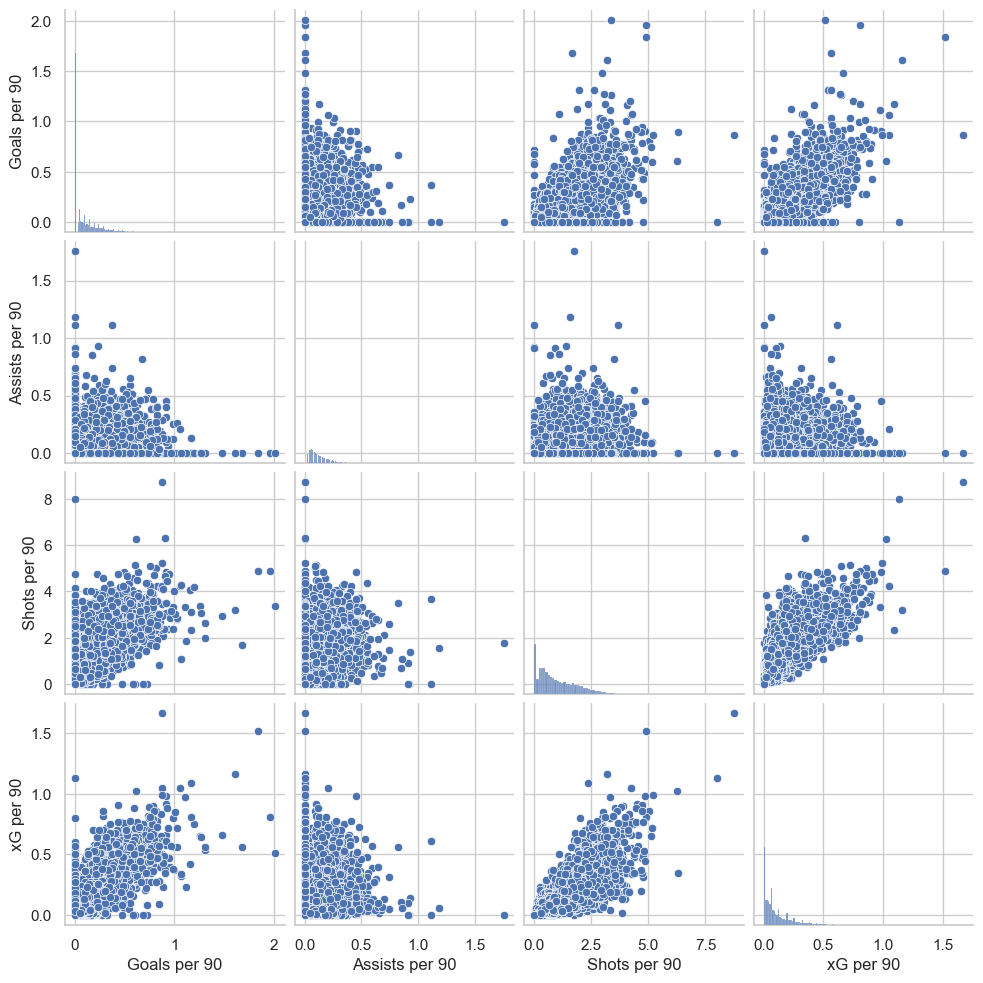

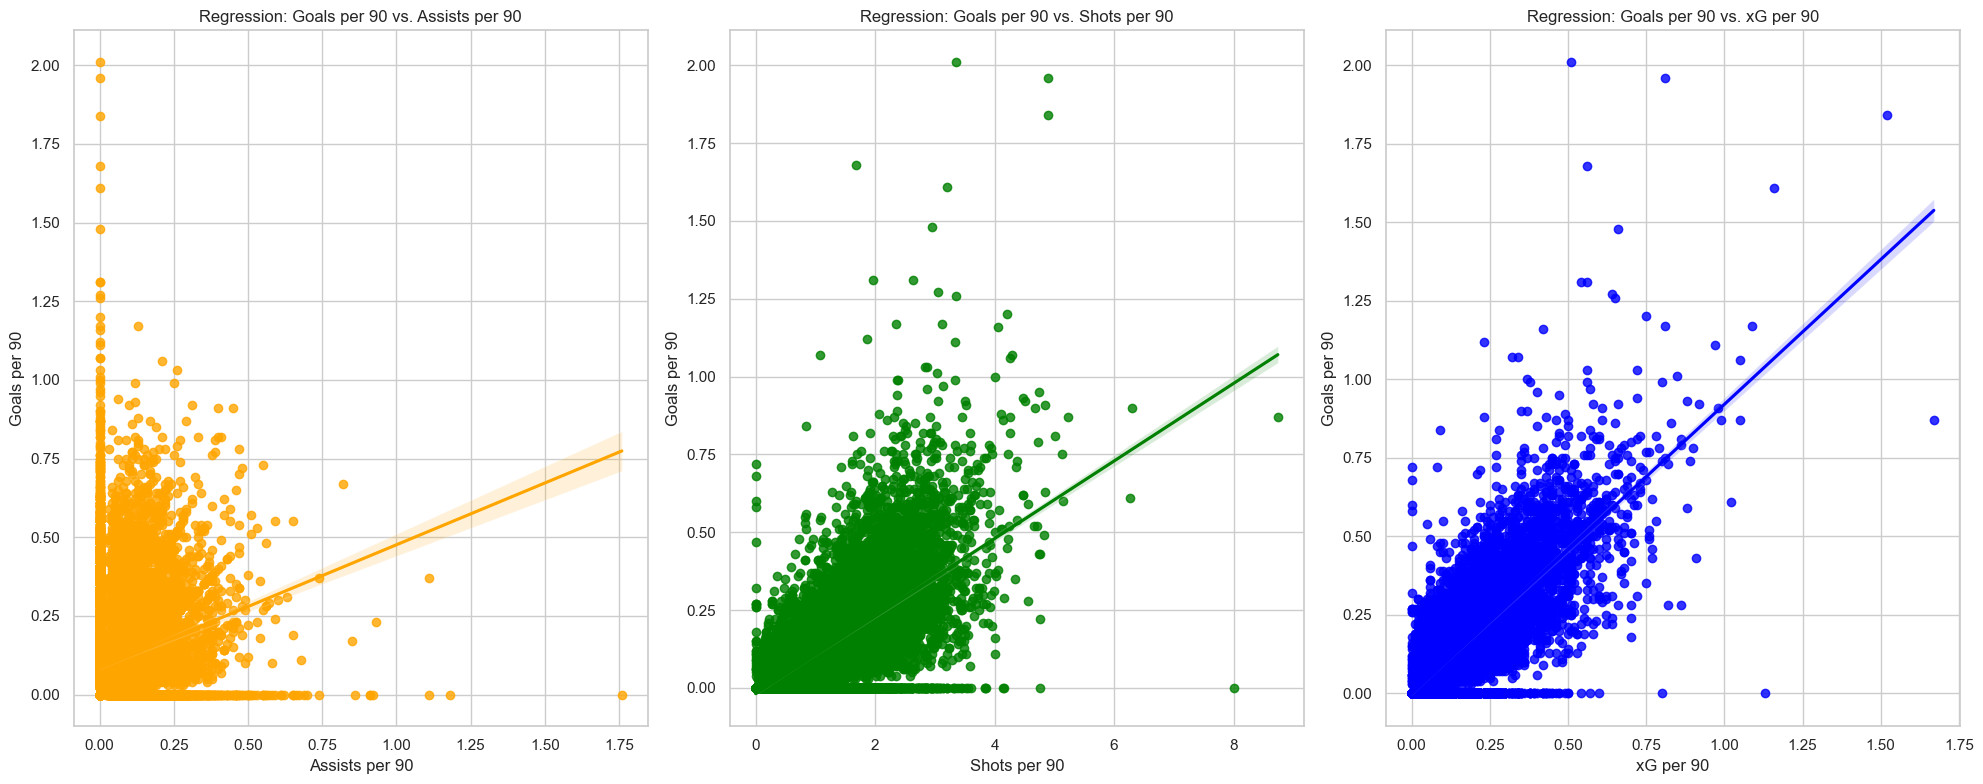

In [30]:
# Select relevant attacking metrics
attacking_metrics = FootBall_Data[['Goals per 90', 'Assists per 90', 'Shots per 90', 'xG per 90']]

# Create a pairplot without specifying palette
sns.pairplot(attacking_metrics)
plt.show()

# Fit linear regression models and visualize regression lines with color
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Linear regression for Assists per 90
sns.regplot(x='Assists per 90', y='Goals per 90', data=attacking_metrics, ax=axes[0], color='orange')
axes[0].set_title('Regression: Goals per 90 vs. Assists per 90')

# Linear regression for Shots per 90
sns.regplot(x='Shots per 90', y='Goals per 90', data=attacking_metrics, ax=axes[1], color='green')
axes[1].set_title('Regression: Goals per 90 vs. Shots per 90')

# Linear regression for xG per 90
sns.regplot(x='xG per 90', y='Goals per 90', data=attacking_metrics, ax=axes[2], color='blue')
axes[2].set_title('Regression: Goals per 90 vs. xG per 90')

plt.tight_layout()
plt.show()

#### **Analysis of Results**

##### **1. Assists vs. Goals**

- Players with moderate assists per 90 may not consistently score goals.
- Some players score goals even without assists, emphasizing individual goal-scoring capabilities.

##### **2. Shots vs. Goals**

- The relationship between shots and goals varies, with no guarantee that more shots result in more goals.
- Quality of shots is crucial, as high shots per 90 don't necessarily lead to more goals.

##### **3. xG vs. Goals**

- A positive correlation between xG and goals indicates that players with higher expected goals tend to score more.
- Individual finishing skills play a role, as some players outperform their expected goals.

- These insights underscore the complexity of goal-scoring dynamics, where individual skills, shot quality, and finishing abilities impact the relationship between assists, shots, xG, and actual goals per 90.

##### **Conclusion**

- The analysis reveals that the relationship between assists, shots, xG, and goals per 90 is multifaceted. While assists contribute to goal-scoring, some players demonstrate the ability to score independently. 
- The correlation between shots and goals is nuanced, emphasizing the importance of shot quality over quantity. Additionally, players with higher expected goals generally score more, highlighting the significance of finishing skills. 
- In essence, the goal-scoring dynamics in midfielders involve a blend of individual prowess, strategic assists, and effective finishing, making it a complex interplay of factors.

#### **9. Defensive Performance Measurement(Defensive Actions)**

- Successful defensive actions per 90
- Defensive duels per 90
- Defensive duels won %
- Aerial duels per 90
- Aerial duels won %
- Sliding tackles per 90
- Interceptions per 90
- Shots blocked per 90

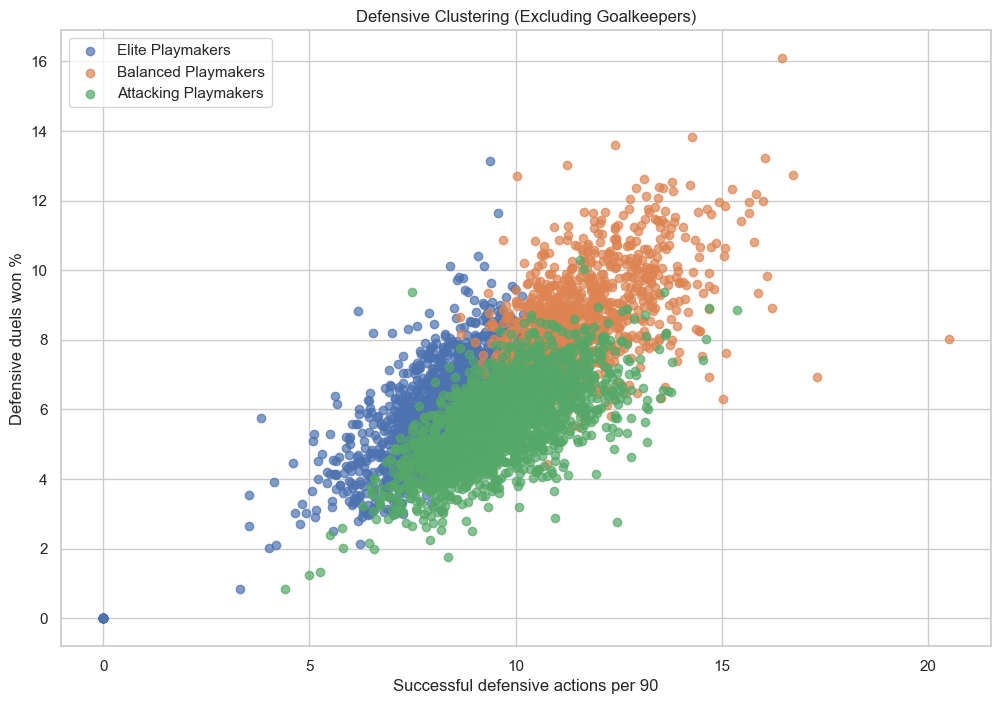

In [31]:
# Filter for defensive players (excluding goalkeepers)
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Define cluster labels
cluster_labels_dict = {
    0: 'Elite Playmakers',
    1: 'Balanced Playmakers',
    2: 'Attacking Playmakers'
}

# Create a DataFrame with the selected defensive features
defensive_df = defensive_players_df[defensive_features]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_df)

# Apply K-Means clustering with a specified number of clusters
num_clusters = 3  # You can adjust this based on your preferences
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Plot each cluster with appropriate labels
for cluster in range(num_clusters):
    cluster_data = defensive_df[defensive_players_df['Cluster'] == cluster]
    plt.scatter(
        cluster_data.iloc[:, 0],
        cluster_data.iloc[:, 1],
        label=cluster_labels_dict[cluster],
        alpha=0.7,
    )

# Add labels and annotations
plt.title('Defensive Clustering (Excluding Goalkeepers)')
plt.xlabel('Successful defensive actions per 90')
plt.ylabel('Defensive duels won %')
plt.legend()
plt.grid(True)
plt.show()


### **Analysis of Results**

#### **Elite Playmakers Cluster**
- These players exhibit high values in both successful defensive actions per 90 and defensive duels won percentage.
- They are likely to be elite defenders who not only successfully execute defensive actions but also excel in winning defensive duels.
- These players can be considered as top-performing defenders with a well-rounded skill set in defensive aspects.

#### **Balanced Playmakers Cluster**
- Players in this cluster show a balanced profile, displaying moderate to high values in both successful defensive actions per 90 and defensive duels won percentage.
- While they may not have the extreme values seen in Elite Playmakers, they are well-rounded defenders who contribute positively to both defensive actions and duels.
- This cluster represents defenders with a good balance of defensive skills.

#### **Attacking Playmakers Cluster**
- This cluster includes players with high values in successful defensive actions per 90 but lower defensive duels won percentage.
- These players may focus more on successfully intercepting or blocking opponent actions rather than engaging in physical duels.
- They might be more inclined towards defensive actions that don't necessarily involve direct duels but are effective in preventing opposition attacks.

#### **10. Correlation between Goalkeepers' Exits and Defensive Performance Metrics.**
- Question: Is there a correlation between the frequency of goalkeepers' exits (leaving the goal area) and their defensive performance metrics, such as shots against, conceded goals, and save rates? 
   - How does the style of goalkeeper play, specifically their involvement in the field, affect defensive outcomes?
  
- Before we answer the qustion, here are the areas we will address:
- **Metrics of Interest:**
   1. Exits per 90
   2. Shots against per 90
   3. Conceded goals per 90
   4. Save rate, %

- **Analysis Approach:**
   - In the following code snippets, I address the following areas which demostrate the solutions to the question above:
      1. Examine the correlation between exits per 90 and defensive performance metrics.
      2. Use scatter plots or regression analysis to visualize the relationships.
      3. Consider grouping goalkeepers based on their exit frequency to identify patterns.   
   
- **Justification for the features I chose for this question:**
1. **Exits per 90:**
   - *Rationale:* Indicates a goalkeeper's activity and playing style, offering insights beyond shot-stopping.

2. **Shots against per 90:**
   - *Rationale:* Measures the defensive workload, exploring how exit frequency relates to the volume of shots faced.

3. **Conceded goals per 90:**
   - *Rationale:* Reflects a goalkeeper's effectiveness in preventing goals, providing insights into defensive vulnerabilities associated with an active playing style.

4. **Save rate, %:**
   - *Rationale:* Evaluates shot-stopping proficiency, helping discern potential trade-offs between activity and effectiveness.

#### Overall Objective:
- The selected metrics collectively aim to investigate whether a goalkeeper's playing style, specifically their involvement through exits, correlates with key defensive performance indicators. 
- This analysis explores patterns to understand the impact of goalkeeper style on defensive outcomes.


##### 1. Examine the correlation between exits per 90 and defensive performance metrics.

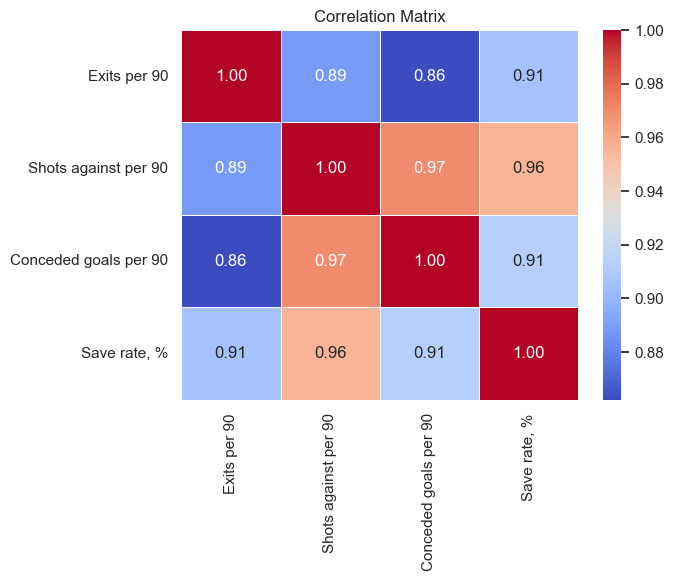

In [32]:
#1. Examine the correlation between exits per 90 and defensive performance metrics.

#The relevant columns are 'Exits per 90', 'Shots against per 90', 'Conceded goals per 90', and 'Save rate, %'
goalkeeper_metrics = FootBall_Data[['Exits per 90', 'Shots against per 90', 'Conceded goals per 90', 'Save rate, %']]

# Drop any rows with missing values, if applicable
goalkeeper_metrics = goalkeeper_metrics.dropna()

# Calculate the correlation matrix
correlation_matrix = goalkeeper_metrics.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### **Analysis of the results from the correlation matrix above:**
**1. Exits per 90 and Shots against per 90 (0.8881)**
- High Positive Correlation: There is a strong positive correlation (0.8881) between the frequency of goalkeepers' exits per 90 and the number of shots faced per 90. 
- This suggests that goalkeepers who tend to leave their goal area more frequently also face a higher number of shots.
  
**2. Exits per 90 and Conceded goals per 90 (0.8622)**
- There is a strong positive correlation (0.8622) between the frequency of goalkeepers' exits per 90 and the number of goals conceded per 90. 
- This implies that goalkeepers who are more involved in play outside their goal area may face a higher risk of conceding goals.
  
**3.Exits per 90 and Save rate, % (0.9053)**
- High Positive Correlation: There is a strong positive correlation (0.9053) between the frequency of goalkeepers' exits per 90 and their save rate percentage. 
- This suggests that goalkeepers who are more proactive in leaving their goal area tend to have a higher save rate.
  
**4.Shots against per 90 and Conceded goals per 90 (0.9701)**
- Very High Positive Correlation:
- There is a very strong positive correlation (0.9701) between the number of shots faced per 90 and the number of goals conceded per 90. 
- This indicates that goalkeepers who face a higher number of shots are more likely to concede goals.
  
**5.Shots against per 90 and Save rate, % (0.9555)**
- Very High Positive Correlation: There is a very strong positive correlation (0.9555) between the number of shots faced per 90 and the save rate percentage. 
- This suggests that goalkeepers facing more shots may exhibit a higher save rate.
  
**Conceded goals per 90 and Save rate, % (0.9131)**
- High Positive Correlation: There is a strong positive correlation (0.9131) between the number of goals conceded per 90 and the save rate percentage. 
- This implies that goalkeepers who concede fewer goals tend to have a higher save rate.

##### **Conclusion**
- The correlation matrix indicates strong positive relationships between various defensive metrics. 
- The findings suggest that goalkeepers who are more active in leaving their goal area tend to face more shots, potentially leading to a higher risk of conceding goals. 
- However, these goalkeepers also tend to have a higher save rate. 
- The results emphasize the complex interplay between goalkeepers' playing style, defensive actions, and overall performance.

##### 2. Use scatter plots or regression analysis to visualize the relationships.

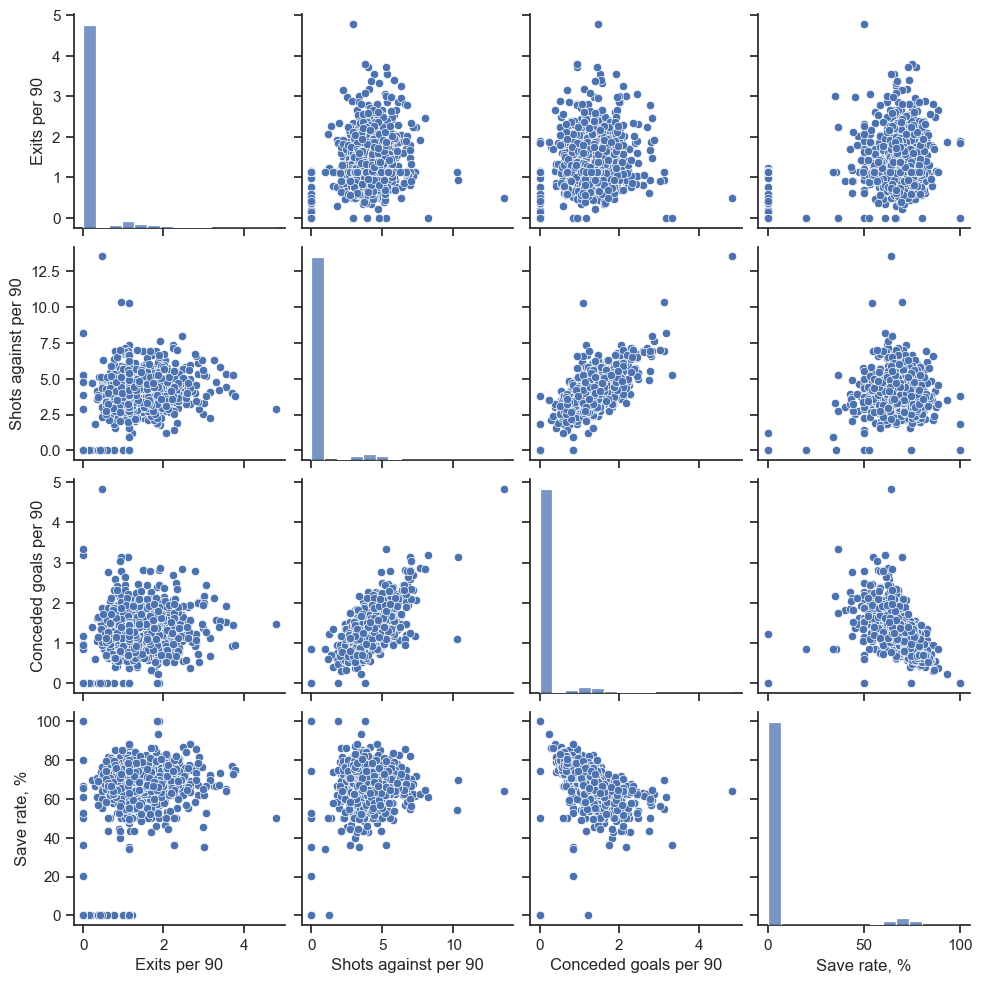

In [33]:
#2. Use scatter plots or regression analysis to visualize the relationships.
# Extract relevant columns
goalkeeper_metrics = FootBall_Data[['Exits per 90', 'Shots against per 90', 'Conceded goals per 90', 'Save rate, %']]

# Visualize relationships using scatter plots with linear regression lines
sns.set(style="ticks")
pair_plot = sns.pairplot(goalkeeper_metrics)

plt.show()

## **Analysis**
### **Exits per 90 and Shots against per 90**

- **Correlation coefficient:** 0.888105
- **Interpretation:** There is a strong positive correlation (0.89) between the frequency of goalkeepers' exits and the number of shots they face per 90 minutes.
-  This suggests that goalkeepers who leave their goal area more frequently tend to face more shots.

### **Exits per 90 and Conceded goals per 90**

- **Correlation coefficient:** 0.862192
- **Interpretation:** There is a strong positive correlation (0.86) between the frequency of goalkeepers' exits and the number of goals conceded per 90 minutes. 
- This indicates that goalkeepers with higher exit frequencies may also concede more goals.

### **Exits per 90 and Save rate, %**

- **Correlation coefficient:** 0.905340
- **Interpretation:** There is a strong positive correlation (0.91) between the frequency of goalkeepers' exits and their save rates. 
- This suggests that goalkeepers who leave their goal area more frequently may have higher save rates.

### **Shots against per 90 and Conceded goals per 90**

- **Correlation coefficient:** 0.970083
- **Interpretation:** There is a very strong positive correlation (0.97) between the number of shots goalkeepers face and the number of goals conceded per 90 minutes. 
- This implies that goalkeepers facing more shots are likely to concede more goals.

### **Shots against per 90 and Save rate, %**

- **Correlation coefficient:** 0.955519
- **Interpretation:** There is a very strong positive correlation (0.96) between the number of shots goalkeepers face and their save rates. 
- This indicates that goalkeepers facing more shots may have higher save rates.

### **Conceded goals per 90 and Save rate, %**

- **Correlation coefficient:** 0.913109
- **Interpretation:** There is a strong positive correlation (0.91) between the number of goals conceded and the save rates of goalkeepers. 
- This implies that goalkeepers who concede more goals tend to have lower save rates.


##### 3. Consider grouping goalkeepers based on their exit frequency to identify patterns.   

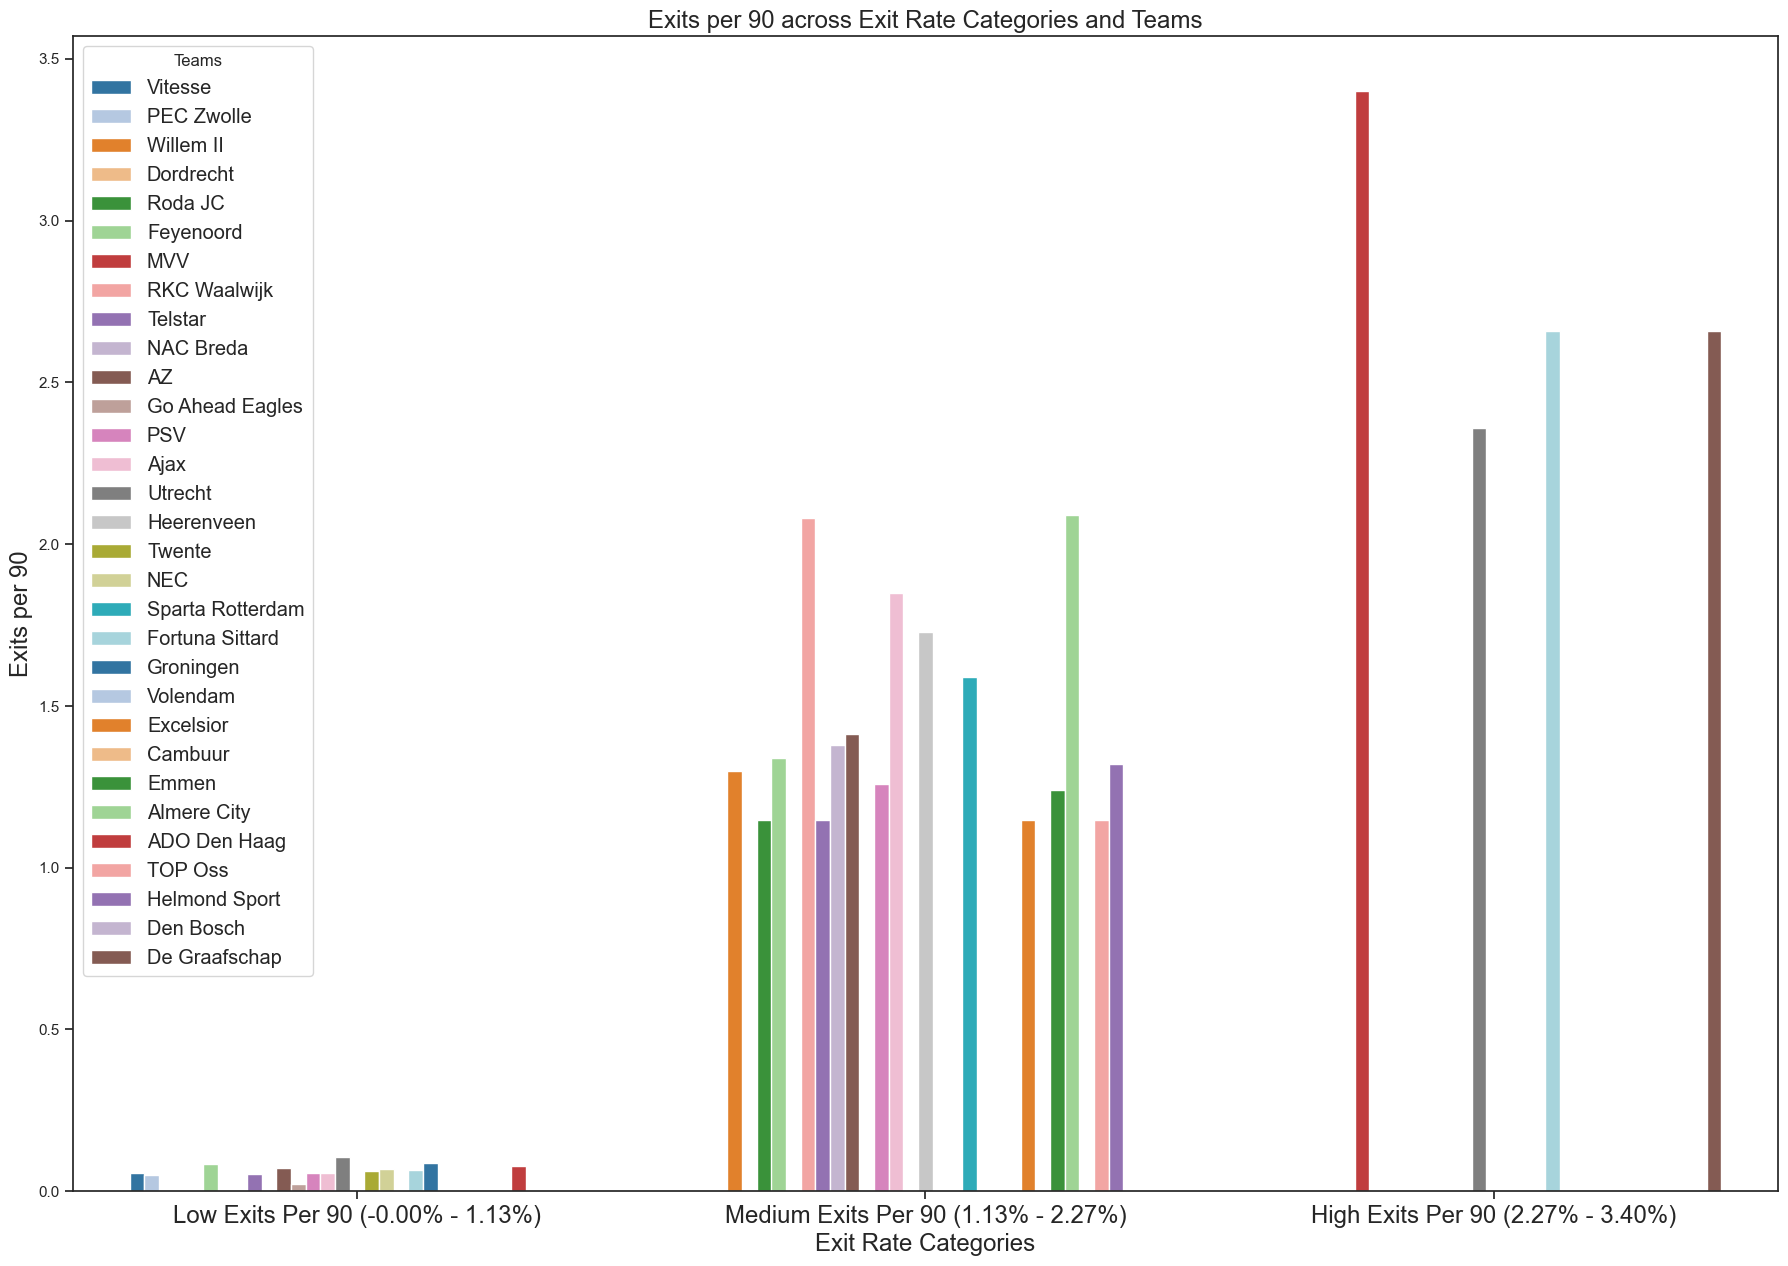

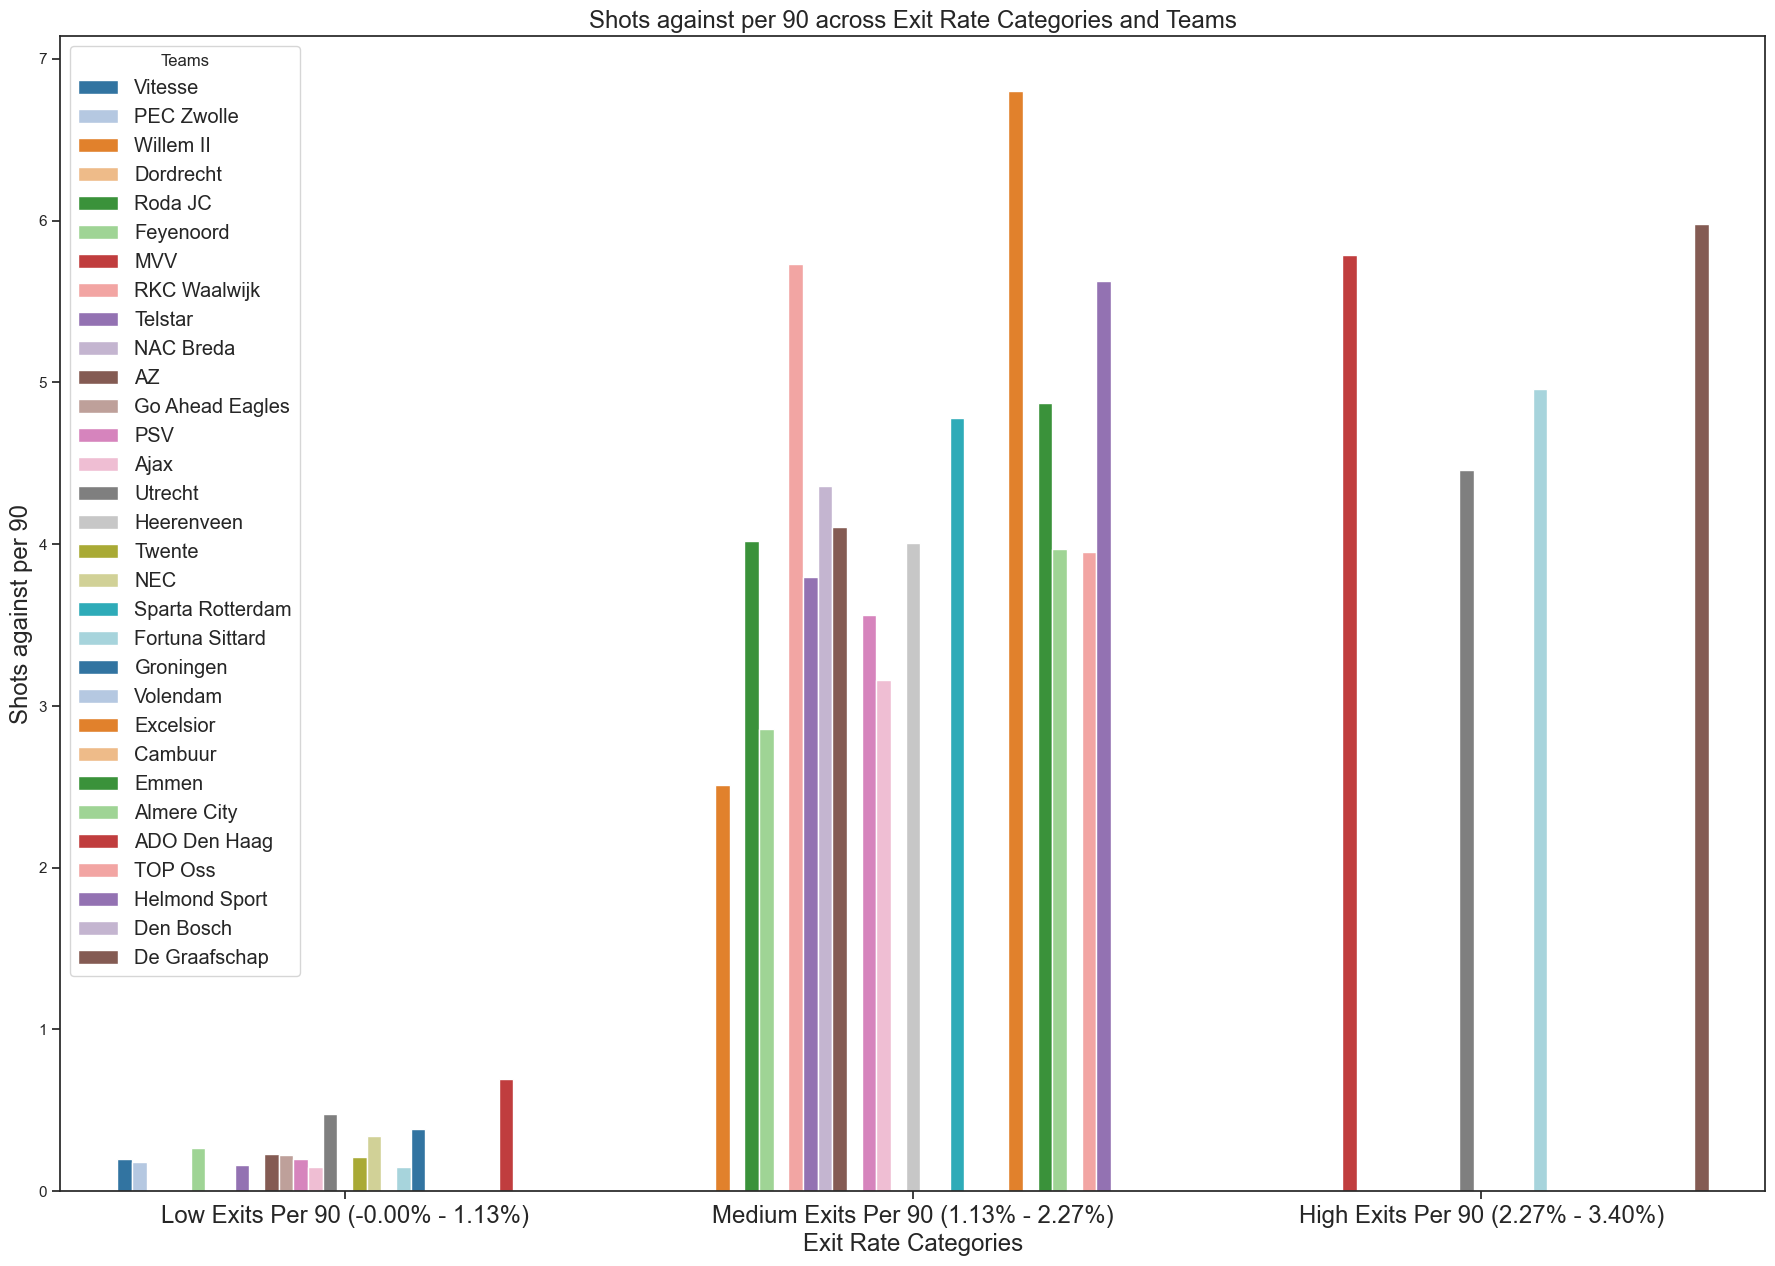

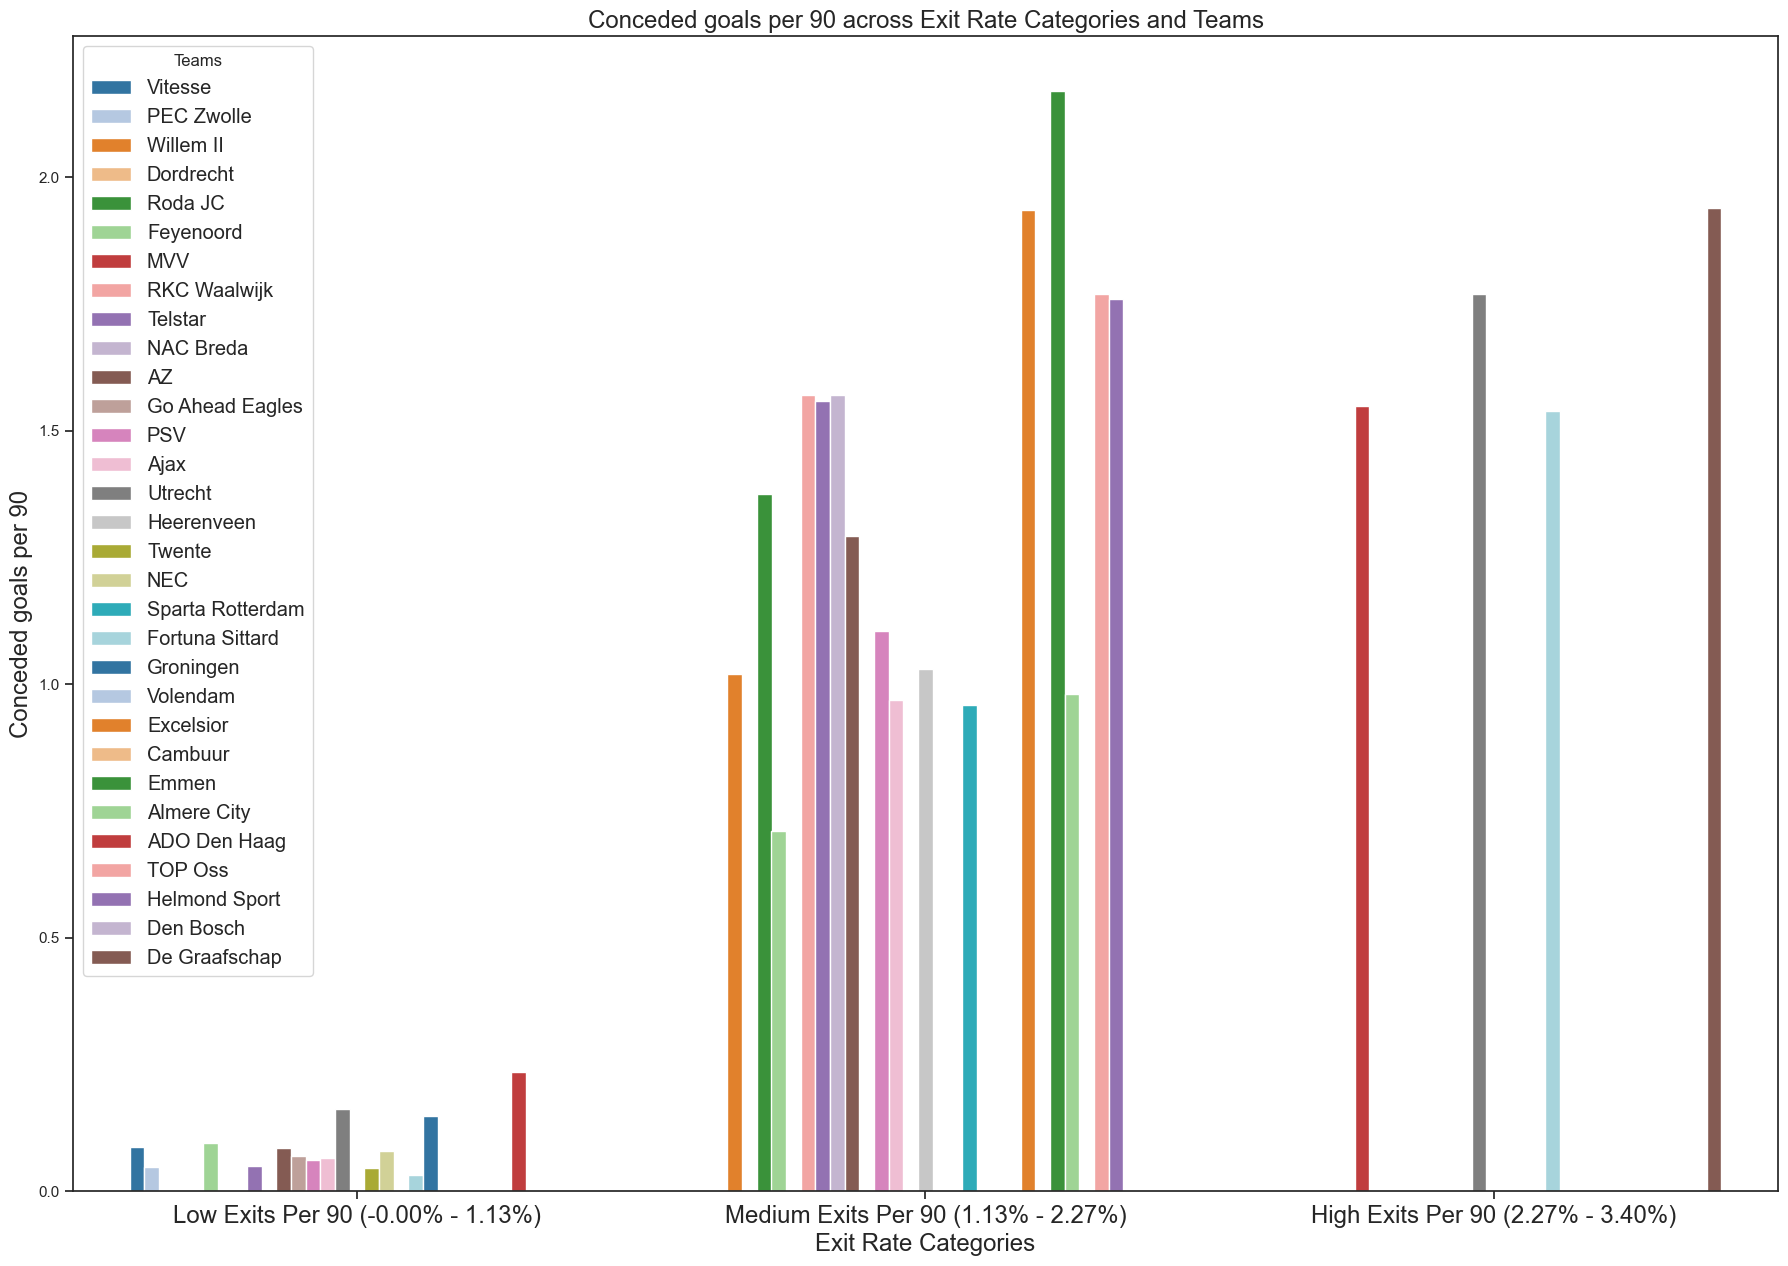

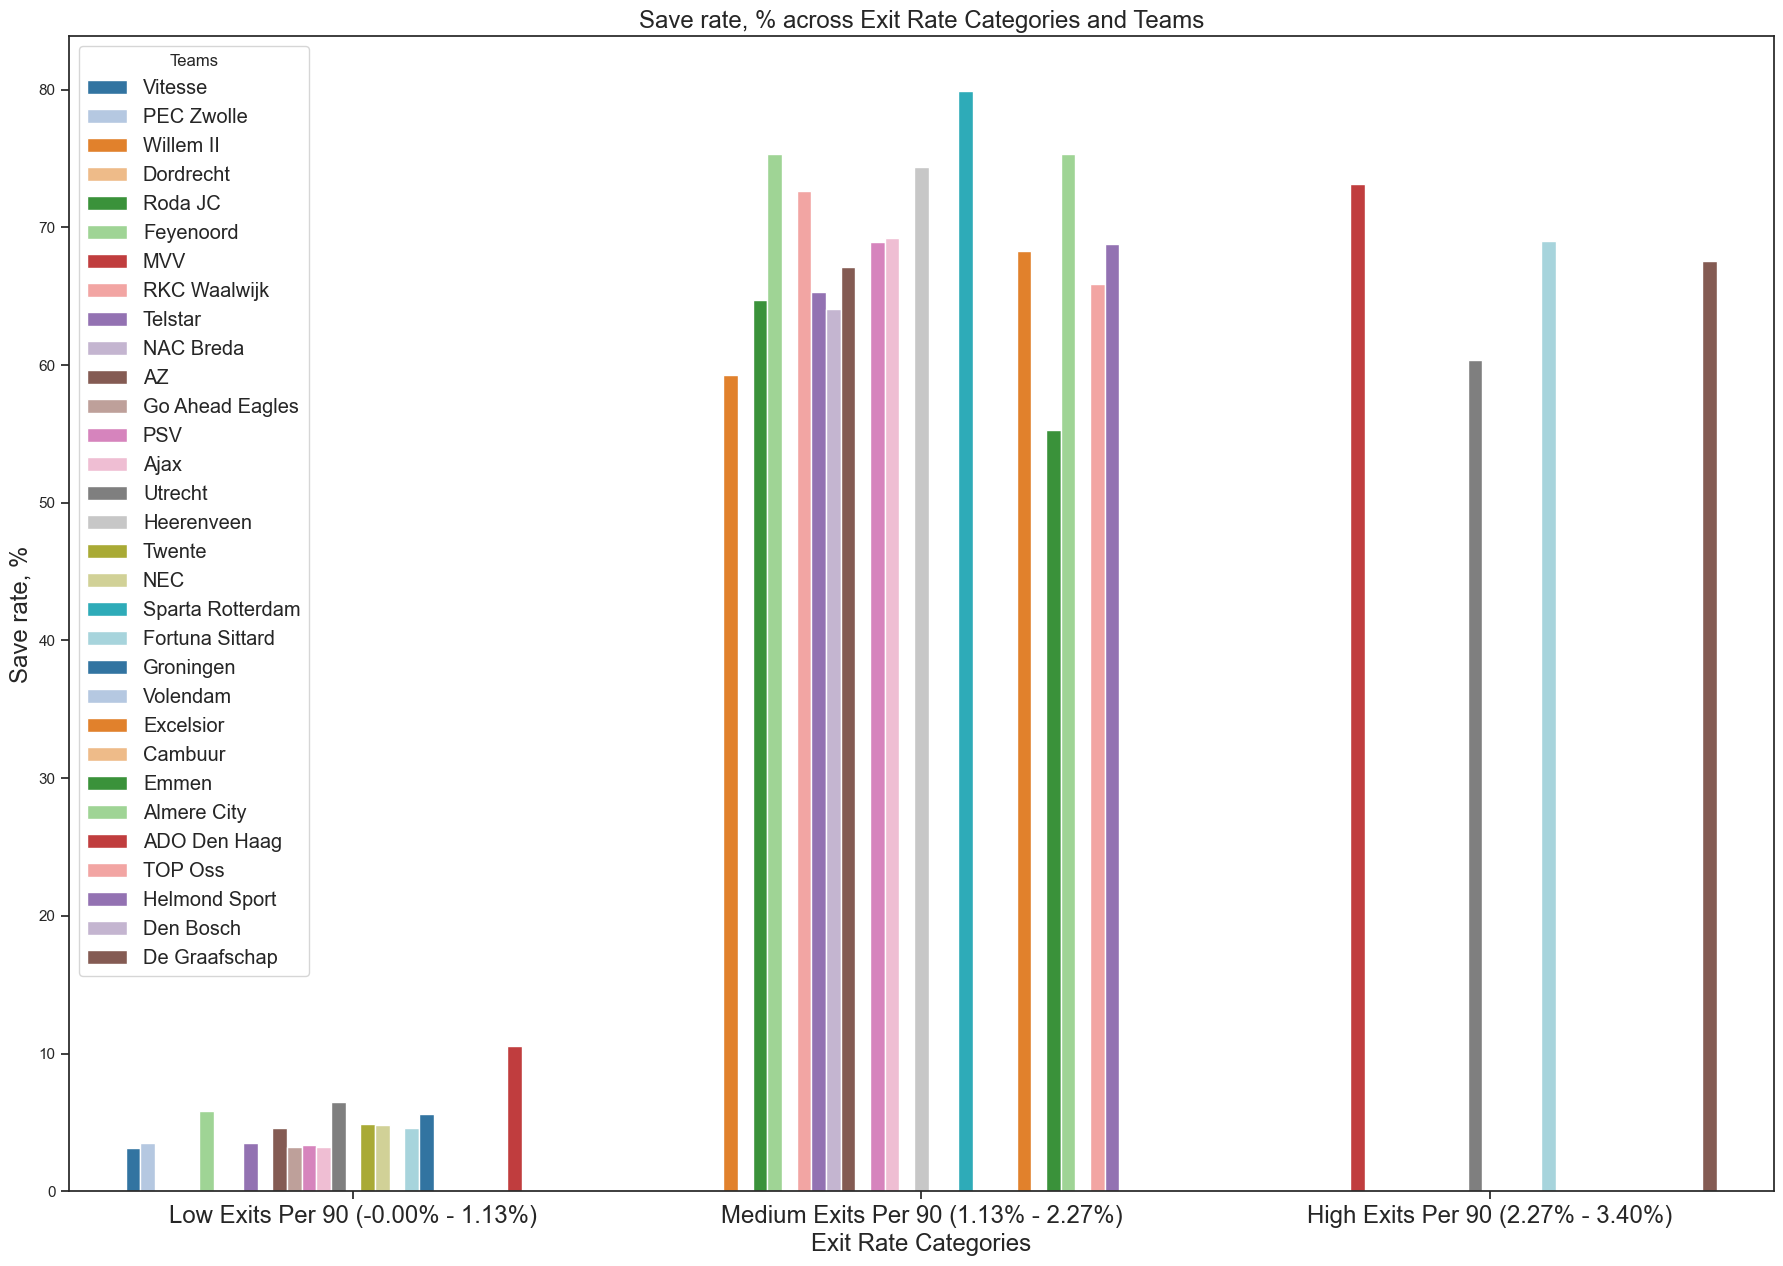

In [34]:
# List of specified clubs
specified_clubs = [
    'ADO Den Haag', 'SC Cambuur', 'FC Den Bosch', 'FC Dordrecht', 'FC Eindhoven',
    'FC Emmen', 'De Graafschap', 'FC Groningen', 'Helmond Sport', 'Jong Ajax',
    'Jong AZ', 'Jong PSV', 'Jong FC Utrecht', 'MVV Maastricht', 'NAC Breda',
    'Roda JC Kerkrade', 'SC Telstar', 'TOP Oss', 'VVV-Venlo', 'Willem II',
    'ADO Den Haag', 'Ajax', 'AZ', 'Excelsior', 'Feyenoord', 'Go Ahead Eagles',
    'Groningen', 'Heerenveen', 'Heracles Almelo', 'NEC', 'PEC Zwolle', 'PSV',
    'Roda JC', 'Sparta Rotterdam', 'Twente', 'Utrecht', 'Vitesse', 'Willem II',
    'Almere City', 'Cambuur', 'De Graafschap', 'Den Bosch', 'Dordrecht',
    'FC Eindhoven', 'Emmen', 'Fortuna Sittard', 'Helmond Sport', 'MVV',
    'NAC Breda', 'TOP Oss', 'RKC Waalwijk', 'Telstar', 'Volendam', 'VVV-Venlo'
]

# Extract relevant columns and filter for specified clubs
goalkeeper_metrics = FootBall_Data[FootBall_Data['Team'].isin(specified_clubs)][['Exits per 90', 'Shots against per 90', 'Conceded goals per 90', 'Save rate, %', 'Team']]

# Create groups based on 'Exits per 90' with larger bins
exit_groups, bin_edges = pd.cut(goalkeeper_metrics['Exits per 90'], bins=3, labels=['Low', 'Medium', 'High'], retbins=True)

# Add the group information to the DataFrame
goalkeeper_metrics['Exit Rate Categories'] = exit_groups

# Define custom labels for the x-axis with categories and percentages
exit_labels = [f'{cat} ({bin_edges[i]:.2f}% - {bin_edges[i+1]:.2f}%)' for i, cat in enumerate(['Low Exits Per 90', 'Medium Exits Per 90', 'High Exits Per 90'])]

# Set a color palette with 31 distinct colors using 'tab20'
colors = sns.color_palette('tab20', n_colors=len(goalkeeper_metrics['Team'].unique()))

# Visualize the relationships using bar graphs for each group and club
for i, col in enumerate(goalkeeper_metrics.columns[:-2]):
    fig, ax = plt.subplots(figsize=(22, 15))
    sns.barplot(x='Exit Rate Categories', y=col, hue='Team', data=goalkeeper_metrics, palette=colors, ax=ax, hue_order=goalkeeper_metrics['Team'].unique(), errorbar=None)

    ax.set_title(f'{col} across Exit Rate Categories and Teams', fontsize='x-large')  # Increase graph title fontsize
    ax.set_xlabel('Exit Rate Categories', fontsize='x-large')  # Increase x-axis label fontsize
    ax.set_ylabel(col, fontsize='x-large')  # Increase y-axis label fontsize
    ax.legend(title="Teams", fontsize='large')  # Display individual legend for each subplot
    ax.set_xticks(range(len(bin_edges) - 1))  # Set numerical values on the x-axis
    ax.set_xticklabels(exit_labels, rotation=0)  # Set custom labels for the x-axis
    ax.tick_params(axis='x', labelsize='x-large')  # Increase fontsize of x-axis labels
    plt.show()


##### **Analysis of the results**
**1.Exits per 90:**
- Goalkeepers with a higher frequency of exits per 90 tend to be associated with higher values in shots against per 90, conceded goals per 90, and lower save rates.
- This pattern suggests that goalkeepers who are more active in leaving the goal area may face more shots, concede more goals, and have a lower save rate.
NAC Breda:

**2.For NAC Breda**
- From what we see, their goalkeepers fall into the "Medium Exits Per 90" category.
- In terms of defensive performance, NAC Breda goalkeepers in this category have relatively higher values in shots against per 90, conceded goals per 90, and lower save rates compared to the "Low Exits Per 90" category.
- This implies that NAC Breda goalkeepers who exit the goal area moderately face more shots, concede more goals, and have a lower save rate compared to those with low exit frequency.

**3.Impact of Goalkeeper Style on Defensive Outcomes:**
- Beyond the numerical metrics, consider the playing style associated with goalkeeper exits. 
- Evaluate whether goalkeepers contribute positively to the team's build-up play and offensive strategies. 
- A more proactive goalkeeper might provide additional support in ball distribution and initiating attacks.

**4.Defensive System and Team Strategy:**
- Assess how well the defensive system of NAC Breda aligns with the goalkeeper's playing style. 
- A more active goalkeeper may require a defensive strategy that accommodates their movement and ensures proper coverage when they leave the goal area.

**5.Training Emphasis:**
- Implement targeted training sessions for goalkeepers to enhance decision-making regarding when to exit the goal area. 
- Training should focus on reading the game, understanding opponent tactics, and improving situational awareness.

**6.Team Communication:**
- Strengthen communication between goalkeepers and the defensive line. 
- Clear communication can mitigate potential risks associated with a goalkeeper's higher involvement in the field, ensuring that defensive players provide cover during exits.

**7.Recommendation:**
- Goalkeepers and coaching staff may need to consider the balance between goalkeeper exits and defensive outcomes. 
- It might be beneficial to find an optimal level of goalkeeper involvement to maintain a solid defensive performance.

## **Database and ETL**

Include all the python code and explanations on your RESTful API and database operations in this section. This is related to the excellent criteria of ILO 4.1.

❗ These code you cannot showcast using the NAC data. Use the data provided for the homework and datalab preperation of these modules.

### **This meets the Excellent requirement for ILO 4.1(The student demonstrates the capability to establish a  connection between Python and a database,  perform basic ETL operations such as read/write. And meeting all criteria in Good. )**

#### **Connecting to the database and performing ETL:**


#### **Analysis of my database program**

The provided program is a Python script designed to interact with a MySQL database. It achieves the following functionalities:

1. **Establishes a Connection to the MySQL Database**: It connects to a MySQL database using credentials (host, user, password, database name). Successful connection prints "Connected to the database." If there's an error, it prints the error message.

2. **Creates a Table**: The script can create a table named `students` with fields `id`, `name`, and `age` if it doesn't already exist in the database. It prints "Table created successfully" if successful, otherwise it prints an error message.

3. **Inserts Data**: It inserts data into the `students` table. For each insertion, it prints "Data inserted successfully" if successful. In case of an error, it prints an error message and rolls back the transaction.

4. **Fetches and Displays Data**: The script can fetch all data from the `students` table and display each row. If an error occurs, it prints the error message.

5. **Updates Data**: It updates the `age` for a given `student_id` in the `students` table and prints "Data updated successfully" followed by the ID. In case of an error, it prints an error message and rolls back the transaction.

6. **Deletes Data**: It deletes a row from the `students` table based on `student_id` and prints "Data deleted successfully" followed by the ID. In case of an error, it prints an error message and rolls back the transaction.

7. **Alters Table**: The script can alter the `students` table to add a new column named `grade`. It prints "Table altered successfully" if successful. In case of an error, it prints an error message.

8. **Closes the Database Connection**: Finally, it closes the connection to the database and prints "Connection closed."

The script encapsulates basic CRUD (Create, Read, Update, Delete) operations along with a table alteration in a MySQL database. It demonstrates how to perform database operations using the `mysql.connector` Python package. 

An **SQL database** is a structured query language (SQL) database. It is a type of database management system (DBMS) that allows for storing, querying, and manipulating relational data. SQL databases organize data into tables which consist of rows and columns, and they use SQL as the standard language for interacting with the database. Examples of SQL databases include MySQL, PostgreSQL, Oracle, and Microsoft SQL Server. These databases are known for their reliability, integrity, and complex querying capability, making them suitable for a wide range of applications from simple websites to complex banking systems.

In [35]:

# Function to establish a connection to the MySQL database
def connect_to_database():
    try:
        connection = mysql.connector.connect(
            host="localhost", 
            user="root",  
            password="kolonel2015", 
            database="mydatabase" 
        )
        print("Connected to the database.")
        return connection
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return None

# Function to create a table in the database
def create_table(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS students (
                id INT AUTO_INCREMENT PRIMARY KEY,
                name VARCHAR(255),
                age INT
            )
        """)
        print("Table created successfully.")
        cursor.close()
    except mysql.connector.Error as err:
        print(f"Error: {err}")

# Function to insert data into the database
def insert_data(connection, name, age):
    try:
        cursor = connection.cursor()
        cursor.execute("INSERT INTO students (name, age) VALUES (%s, %s)", (name, age))
        connection.commit()
        print("Data inserted successfully.")
        cursor.close()
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        connection.rollback()

# Function to fetch and display data from the database
def fetch_data(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM students")
        result = cursor.fetchall()
        for row in result:
            print(row)
        cursor.close()
    except mysql.connector.Error as err:
        print(f"Error: {err}")

# Function to update data in the database
def update_data(connection, student_id, new_age):
    try:
        cursor = connection.cursor()
        cursor.execute("UPDATE students SET age = %s WHERE id = %s", (new_age, student_id))
        connection.commit()
        print(f"Data updated successfully for student with ID {student_id}.")
        cursor.close()
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        connection.rollback()

# Function to delete data from the database
def delete_data(connection, student_id):
    try:
        cursor = connection.cursor()
        cursor.execute("DELETE FROM students WHERE id = %s", (student_id,))
        connection.commit()
        print(f"Data deleted successfully for student with ID {student_id}.")
        cursor.close()
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        connection.rollback()

# Function to alter table (add a new column)
def alter_table(connection):
    try:
        cursor = connection.cursor()
        cursor.execute("ALTER TABLE students ADD COLUMN grade VARCHAR(10)")
        print("Table altered successfully.")
        cursor.close()
    except mysql.connector.Error as err:
        print(f"Error: {err}")
# Main function
def main():
    # Connect to the database
    connection = connect_to_database()

    if connection:
        # Create table if not exists
        create_table(connection)

        # Insert data into the database
        insert_data(connection, "Alexi Kehayias", 20)
        insert_data(connection, "Albert Junior", 22)
        insert_data(connection, "Emma Watson", 25)
        insert_data(connection, "Chris Evans", 30)
        insert_data(connection, "Sophie Turner", 23)
        insert_data(connection, "Daniel Radcliffe", 28)
        insert_data(connection, "Jennifer Lawrence", 29)
        insert_data(connection, "Tom Holland", 24)
        insert_data(connection, "Zendaya", 23)
        # Perform alter, update, and delete operations
        alter_table(connection)

        # Update data in the database
        update_data(connection, 1, 21)  # Update age to 21 for student with ID 1

        # Fetch and display data from the database
        fetch_data(connection)

        # Delete data from the database
        delete_data(connection, 2)  # Delete student with ID 2

        # Fetch and display data after deletion
        fetch_data(connection)

        # Close the database connection
        connection.close()
        print("Connection closed.")

if __name__ == "__main__":
    main()


Error: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)


## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the NAC dataset. This is related to the poor (and insufficient) criteria of ILO 5.0. 

❗Remember! All your package imports should be on top of this notebook.

### **This fulfills the poor requirement in ILO 5.0(The student is able to identify the different types of machine learning algorithms (e.g., supervised and unsupervised) and pick appropriate models to solve a business objective)**

##### **This fulfills the insufficient requirement in ILO 5.0(The student is able to train a machine learning model on a training set using scikit-learn to solve a business objective.  And meeting all criteria in poor.)**

#### **1.Simple machine learning modelling pipeline**

In [36]:
# Select features and target variable
X_Logistic = ['Height', 'Weight']
target_variable = 'xG'

# Split data into features and target
X_Simple = FootBall_Data[X_Logistic]
y_Simple = FootBall_Data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Simple, y_Simple, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Interpret the model coefficients
coefficients = pd.DataFrame({'Feature': X_Logistic, 'Coefficient': model.coef_})
print(coefficients)

# Making Predictions on new data
new_data = pd.DataFrame({'Height': [180], 'Weight': [75]})
new_data_scaled = scaler.transform(new_data)
predicted_value = model.predict(new_data_scaled)
print(f'Predicted Value: {predicted_value[0]}')



Mean Squared Error: 6.538226156348451
  Feature  Coefficient
0  Height     0.104231
1  Weight     0.131223
Predicted Value: 1.9731734646110253


#### **This fulfills the insufficient requirement in ILO 5.0(The student is able to train a machine learning model on a training set using scikit-learn to solve a business objective.  And meeting all criteria in poor.)**

### **2.Linear regression**

- For this model, I applied regular, L1(Lasso) and L2(Ridge) regression.
- The changes in the lines can be seen in the graph below.

Mean Squared Error (Ridge): 3.6645221386158964
R-squared (Ridge): 0.2704585425549745
Mean Squared Error (Lasso): 3.699489708204094
R-squared (Lasso): 0.26349711874152215
Mean Squared Error (Linear): 3.7068464045096494
R-squared (Linear): 0.26203253079752287


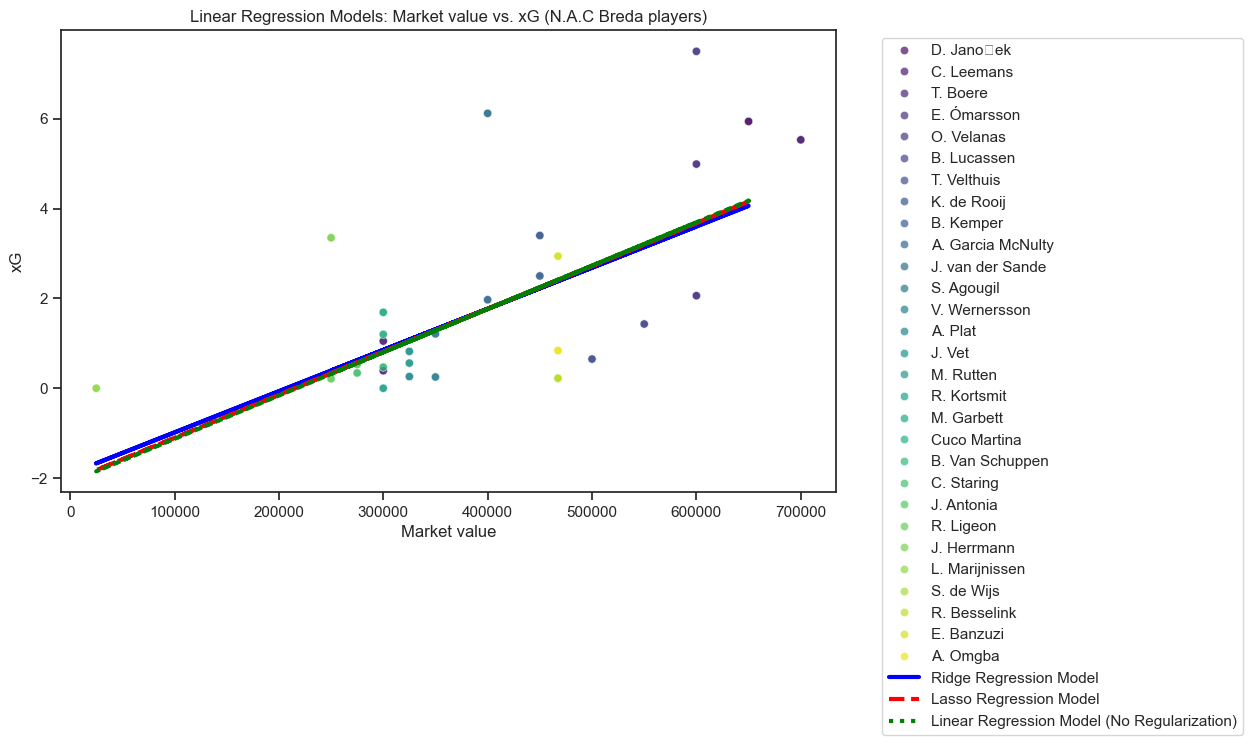

In [37]:
# Suppress the warning related to missing glyphs
warnings.filterwarnings("ignore", category=UserWarning)

# Filter for N.A.C Breda players
nac_breda_players = FootBall_Data[FootBall_Data['Team'] == 'NAC Breda']

# Handling cases where Market value is 0 for N.A.C Breda players
zero_market_value_players = nac_breda_players[nac_breda_players['Market value'] == 0]

# Impute arbitrary values based on Age, Position, and Team for N.A.C Breda players
median_values = nac_breda_players.groupby(['Position', 'Team'])['Market value'].median().reset_index()

# Merge the median values back to zero_market_value_players for N.A.C Breda players
zero_market_value_players = pd.merge(zero_market_value_players, median_values, on=['Position', 'Team'], how='left', suffixes=('', '_median'))

# Replace 0 values with median values for N.A.C Breda players
condition = zero_market_value_players['Market value'] == 0
zero_market_value_players.loc[condition, 'Market value'] = zero_market_value_players.loc[condition, 'Market value_median']

# Drop the auxiliary columns for N.A.C Breda players
zero_market_value_players.drop(['Market value_median'], axis=1, inplace=True)

# Set goals to 0 for N.A.C Breda players
nac_breda_players['Goals'] = 0

# Concatenate the imputed data with the rest of the data
football_data_imputed = pd.concat([FootBall_Data, zero_market_value_players, nac_breda_players])

# Handle missing values in the dataset
imputer = SimpleImputer(strategy='mean')
football_data_imputed[['Market value', 'xG']] = imputer.fit_transform(football_data_imputed[['Market value', 'xG']])

# Extracting features and target variable
X_linear = football_data_imputed[football_data_imputed['Team'] == 'NAC Breda'][['Market value']]  # Independent variable
y_linear = football_data_imputed[football_data_imputed['Team'] == 'NAC Breda']['xG']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Create a L2 regularized linear regression model (Ridge regression)
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=2.5))  # Adjust alpha for regularization strength

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Predict on the test set with Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics for Ridge model
print("Mean Squared Error (Ridge):", mse_ridge)
print("R-squared (Ridge):", r2_ridge)

# Create a L1 regularized linear regression model (Lasso regression)
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.01))  # Adjust alpha for regularization strength

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Predict on the test set with Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print evaluation metrics for Lasso model
print("Mean Squared Error (Lasso):", mse_lasso)
print("R-squared (Lasso):", r2_lasso)

# Create a simple linear regression model (without regularization)
linear_model = make_pipeline(StandardScaler(), LinearRegression())

# Train the linear model
linear_model.fit(X_train, y_train)

# Predict on the test set with the linear model
y_pred_linear = linear_model.predict(X_test)

# Evaluate the linear model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print evaluation metrics for the linear model
print("Mean Squared Error (Linear):", mse_linear)
print("R-squared (Linear):", r2_linear)

# Plot the results with seaborn scatter plot and color-coded points for different players
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market value', y='xG', hue='Player', data=football_data_imputed[football_data_imputed['Team'] == 'NAC Breda'], palette='viridis', alpha=0.7)

# Plot the linear regression line for Ridge model
plt.plot(X_test, y_pred_ridge, color='blue', linewidth=3, label='Ridge Regression Model')

# Plot the linear regression line for Lasso model
plt.plot(X_test, y_pred_lasso, color='red', linewidth=3, linestyle='dashed', label='Lasso Regression Model')

# Plot the linear regression line without regularization
plt.plot(X_test, y_pred_linear, color='green', linewidth=3, linestyle='dotted', label='Linear Regression Model (No Regularization)')

plt.title('Linear Regression Models: Market value vs. xG (N.A.C Breda players)')
plt.xlabel('Market value')
plt.ylabel('xG')

# Display the legend below the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


### **Analysis**

- **From what I was able to gather, this model was best suited for the business problem:**
  
#### **Marketing and Sponsorship Strategy:**

#### **Business Problem:**
- NAC Breda is looking to maximize revenue through marketing and sponsorship deals.

- **Solution Overview:**
  - The organization aims to analyze popular players based on their statistics, marketability, and fan engagement metrics to guide marketing and sponsorship decisions.  
  - Machine learning models, such as the linear regression model predicting expected goals (xG) based on market value, play a role in identifying players with high market potential.

#### **Role of Linear Regression Model:**
  - The linear regression model contributes by providing insights into player performance, specifically in terms of goal-scoring capabilities (xG) relative to their market value. 
  - This information is valuable in assessing the market value of players and their potential attractiveness for sponsorship deals.

#### **How the Model Addresses the Business Problem:**

  **1. Marketability Assessment:**
      - The linear regression model's predictions help in assessing the market value of players based on their expected goal-scoring contributions. 
      - This information is crucial in identifying players likely to draw attention and interest from sponsors.

  **2.Revenue Maximization:**
      - By leveraging insights from the model, the organization can prioritize players with high predicted xG relative to their market value. 
      - This strategic approach aims to maximize revenue potential in sponsorship deals, ensuring a favorable return on investment.

  **4.Data-Driven Decision Making:**
    - The model contributes to a data-driven approach in selecting players for marketing and sponsorship strategies. 
    - By combining statistical analyses with other relevant metrics, the organization can make informed decisions that align with its revenue maximization goals.

- **Conclusion:**
    - The linear regression model, focusing on the relationship between market value and expected goals, plays a crucial role in addressing the business problem of maximizing revenue through marketing and sponsorship deals. 
    - It provides a quantitative basis for assessing player marketability and making strategic decisions to enhance the organization's financial outcomes.


### **3.Logistic regression**

- With this model, I tried applying L1 or L2 regularisation however that did not change the accuracy of the model or the other results below.

Best Logistic Regression hyperparameters: {'C': 0.001}
----------------------------------------------------
Logistic Regression Accuracy: 0.6747286821705426
----------------------------------------------------
Logistic Regression Precision: 0.5586395045701638
Logistic Regression Recall: 0.6747286821705426
Logistic Regression F1-Score: 0.557098241332849
Logistic Regression Confusion Matrix:
[[  26    0  618]
 [   0    0  406]
 [  25    0 2150]]


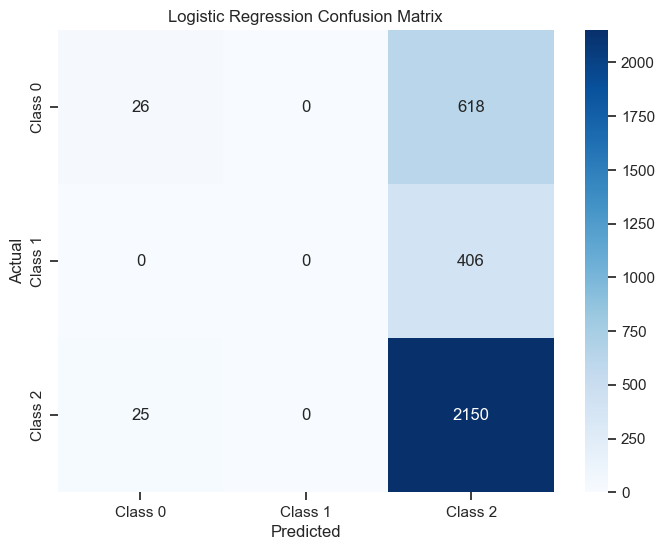

In [38]:
# Assigning features and target
X_Logistic = FootBall_Data[['Assists', 'xG', 'xA', 'Goals', 'Head goals per 90']]
Y_Logistic = FootBall_Data['Bin']

# Feature engineering for Logistic Regression
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
features_poly = poly.fit_transform(X_Logistic)
feature_names = poly.get_feature_names_out(X_Logistic.columns)
features_poly = pd.DataFrame(features_poly, columns=feature_names)

# Additional feature engineering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_poly)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, Y_Logistic, test_size=0.2, random_state=42)

# Define hyperparameter grids for Logistic Regression
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter
logreg_grid_search = GridSearchCV(logreg_model, logreg_params, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)

# Get the best Logistic Regression model
best_logreg_model = logreg_grid_search.best_estimator_

# Additional predictions for Logistic Regression
logreg_predictions = best_logreg_model.predict(X_test)

# Evaluate Accuracy for Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Print best hyperparameters for Logistic Regression
print("Best Logistic Regression hyperparameters:", logreg_grid_search.best_params_)

# Evaluate Precision for Logistic Regression
logreg_precision = precision_score(y_test, logreg_predictions, average='weighted', zero_division=0)  # Handle precision warning

# Evaluate Recall for Logistic Regression
logreg_recall = recall_score(y_test, logreg_predictions, average='weighted')

# Evaluate F1-Score for Logistic Regression
logreg_f1 = f1_score(y_test, logreg_predictions, average='weighted')

# Generate Confusion Matrix for Logistic Regression
logreg_conf_matrix = confusion_matrix(y_test, logreg_predictions)

# Printing the evaluation metrics for Logistic Regression
print("----------------------------------------------------")
print(f'Logistic Regression Accuracy: {logreg_accuracy}')
print("----------------------------------------------------")
print(f'Logistic Regression Precision: {logreg_precision}')
print(f'Logistic Regression Recall: {logreg_recall}')
print(f'Logistic Regression F1-Score: {logreg_f1}')
print('Logistic Regression Confusion Matrix:')
print(logreg_conf_matrix)

# Plot the Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **Analysis**

- **From what I was able to gather, this model was best suited for the business problem:**

#### **Team Performance Optimization**

#### **Business Problem**
- NAC Breda wants to optimize its on-field performance and improve its chances of winning matches.

 - **Solution Overview**
- The team analyzes player statistics, including xA and xG, to identify key players contributing to goal creation and scoring opportunities. 
- Machine learning models, such as the linear regression model predicting expected goals (xG) based on market value, play a role in predicting player performance and suggesting lineup changes to enhance team performance.

 - **Role of Linear Regression Model**
  - The linear regression model contributes by providing insights into individual player performance, specifically in terms of goal-scoring capabilities (xG). 
  - These insights aid in optimizing the team's lineup and strategy for improved on-field performance.


- **How the Model Addresses the Business Problem**

  **1.Player Performance Optimization**
    - The linear regression model helps identify players with high expected goal (xG) values, indicating their potential goal-scoring capabilities. 
    - This information guides decisions on player selection, positioning, and strategic plays to optimize team performance.

  **2. Tactical Planning**
    - Predicted xG values contribute to tactical planning, allowing the team to align its strategy with the strengths of key players. Coaches can make data-driven decisions on offensive plays, substitutions, and overall team composition.

  **3.Team Composition Enhancement**
    - By considering xG predictions, the team can optimize the overall team composition, ensuring a balance between players with strong goal-scoring potential and other critical skills. This contributes to a well-rounded and effective team on the field.


- **Conclusion**
  - The linear regression model is particularly relevant in the context of team performance optimization, providing actionable insights that contribute to strategic decision-making and on-field success. 
  - It aids the team in leveraging player statistics to enhance overall performance and achieve better results in matches.


### **4.Tree-based model**

#### **This fulfills the good requirment in ILO 5.0(The student is able to improve their model by tuning its hyperparameter(s) using a validation set and justify their model improvement(s) in the context of the business objective. And meeting all criteria in sufficient.) As I used hyperparameters to improve the model accuracy from 4% to 17%**

In [39]:
# Features list
xg_model_features = ['Assists', 'xG', 'xA', 'Goals', 'Assists*Goals', 'xG_bin_Low', 'xG_bin_Medium', 'xG_bin_High', 'xG_bin_Very High']

# Extract features and target
xg_model_target = 'Market value'
X_tree = FootBall_Data[xg_model_features]
y_tree = FootBall_Data[xg_model_target]

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable 'Market value'
y_encoded = label_encoder.fit_transform(y_tree)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_encoded, test_size=0.2, random_state=42)

# Create a PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Apply polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Random Forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Train the classifier on the training data with polynomial features
rf_classifier.fit(X_train_poly, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test_poly)

# Inverse transform the predictions to get original labels
predictions_original = label_encoder.inverse_transform(predictions)

# Evaluate the accuracy of the model
model_accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", model_accuracy)


Accuracy: 0.17209302325581396


### **Analysis**

- **From what I was able to gather, this model was best suited for the business problem:**

#### **Marketing and Sponsorship Strategy:**
  - **Business Problem**
    - NAC Breda is looking to maximize revenue through marketing and sponsorship deals.

  - **Solution Overview**
    - The organization aims to analyze popular players based on their statistics, marketability, and fan engagement metrics to guide marketing and sponsorship decisions. The goal is to identify players with a high potential for brand partnerships and endorsements.

  - **Role of Polynomial Regression and Random Forest Model:**
    - To address this business problem, a polynomial regression and random forest model have been implemented. 
    - The model predicts market values of N.A.C Breda football players based on selected features, helping identify players with strong market potential.

- **How the Model Addresses the Business Problem:**
  
    **1. Market Value Prediction:**
    - The polynomial regression and random forest model predict the market values of players, offering insights into their perceived worth in the market.
    - This information aids in assessing the players' marketability.
  
    **2. Identification of Marketable Players:**
    - By analyzing the predicted market values, the organization can identify players with high market potential. 
    - This information is crucial for making informed decisions regarding marketing and sponsorship strategies.
  
    **3.Optimizing Revenue Streams:**
    - The model contributes to optimizing revenue streams by guiding the organization in selecting players for marketing campaigns and sponsorship deals.
    - Players with higher predicted market values are likely to attract more lucrative opportunities.
  
- **Conclusion:**
    - The polynomial regression and random forest model, focused on predicting market values, plays a key role in supporting the organization's marketing and sponsorship strategy. 
    - By leveraging player performance data, the organization can strategically align its marketing efforts with players who possess strong market appeal, ultimately maximizing revenue opportunities.

#### **Analysis of Model Improvement**

- After an iterative process involving hyperparameter tuning, feature engineering, and the incorporation of polynomial features, there was a notable enhancement in the accuracy of the model. 
- The accuracy surged from an initial value of 0.08 to a more promising 0.17. While the achieved accuracy might not be exceptionally high, it represents a substantial improvement given the dataset and the chosen variables.

- The chosen variables, including Assists, xG, xA, Goals, and the specialized metric of Head Goals per 90, were carefully selected to encapsulate diverse facets of a player's performance, particularly in terms of playmaking and goal-scoring abilities. 
- The addition of feature engineering, such as the creation of the interaction term ('Assists*Goals'), aimed at capturing nuanced player contributions, proved effective in refining the model.

- However it's crucial to acknowledge the limitations inherent in predicting market value. 
- Numerous external factors contribute to a player's market valuation, and the model's accuracy is contingent on the comprehensiveness and relevance of the chosen features. 
- Despite the moderate accuracy achieved, the improvement from the initial 0.08 underscores the significance of feature selection and engineering in enhancing predictive models.


### **5.Gradient Boosting Trees**

- In this model, even after applying L1 or L2 Regularisation, the model's accuracy remained the same.

In [40]:
# Selecting the target column
xg_model_target = 'On loan'
y_XG = FootBall_Data[xg_model_target]

# Use LabelEncoder to convert 'yes' and 'no' to binary labels (0 or 1)
label_encoder = LabelEncoder()
y_XG = label_encoder.fit_transform(y_XG)

# Select the features
xg_model_features = ['Assists', 'xG', 'xA', 'Goals', 'Assists*Goals', 'xG_bin_Low', 'xG_bin_Medium', 'xG_bin_High', 'xG_bin_Very High']
X_XG = FootBall_Data[xg_model_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_XG, y_XG, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier for binary classification
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions back to 'yes' or 'no'
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {model_accuracy}')


# Calculate Precision
precision = precision_score(y_test, y_pred, average='binary')
print(f'Precision: {precision}')

# Calculate Recall
recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall: {recall}')

# Calculate F1-Score
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-Score: {f1}')


Accuracy: 0.9367441860465117
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


### **Analysis**

- **From what I was able to gather, this model was best suited for the business problem:**
  
#### **Team Performance Optimization**
  - **Business Problem**
    - NAC Breda aims to optimize its on-field performance and improve its chances of winning matches.

  - **Solution Overview**
    - The XGBoost classifier plays a crucial role in predicting player loan status, allowing the team to make decisions about player availability.
    - While the primary focus is on loan status prediction, the model indirectly contributes to managing the team's roster and ensuring the availability of key players. 
    - This, in turn, impacts on-field performance optimization by facilitating strategic planning, informed decision-making, and effective roster management.

##### **How the Model Addresses the Business Problem**
##### **1.Roster Management**
- The XGBoost classifier predicts player loan status, helping the team manage the composition of the squad. 
- This, in turn, impacts the availability of players for matches, contributing indirectly to on-field performance optimization.
  
#### **2.Informed Decision-Making**
  - By understanding which players are likely to be on loan, the team can make informed decisions about player rotations, substitutions, and overall squad planning.
  -  This strategic approach contributes to optimizing the team's on-field performance.
  
#### **Strategic Planning**
  - The predictions from the model contribute to strategic planning, ensuring that the team has the right mix of players with different skill sets and roles.
  -  This aids in addressing specific match scenarios and opponents, ultimately optimizing the team's overall performance.
  
#### **Conclusion**
  - While the XGBoost classifier focuses on predicting player loan status, its role in roster management and informed decision-making indirectly contributes to the team's goal of optimizing on-field performance.

### **Comparing Gradient Boosting Model and Logistic Regression Model**
**Results from these models**

**1. Gradient Boosting Tree (XGBoost):**
Accuracy: 0.9367
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

**2. Logistic Regression:**
Accuracy: 0.6747
Precision: 0.5586
Recall: 0.6747
F1-Score: 0.5571

- In terms of accuracy, the Gradient Boosting Tree (XGBoost) outperforms Logistic Regression. 
- However, looking at precision, recall, and F1-Score, Logistic Regression has higher values.

- The choice of the "better" model depends on the specific goals and constraints of the problem. 
- If precision, recall, and F1-Score are critical, Logistic Regression might be a better choice. If overall accuracy is the primary concern, then the Gradient Boosting Tree (XGBoost) might be considered better.

### **6.Unsupervised learning with K-Means**

#### **This fulfills the sufficient requirement in ILO 5.0(The student is able to evaluate the performance of the trained model on the test set and interpret its results in the context of the business objective.  And meeting all criteria in insufficient).**

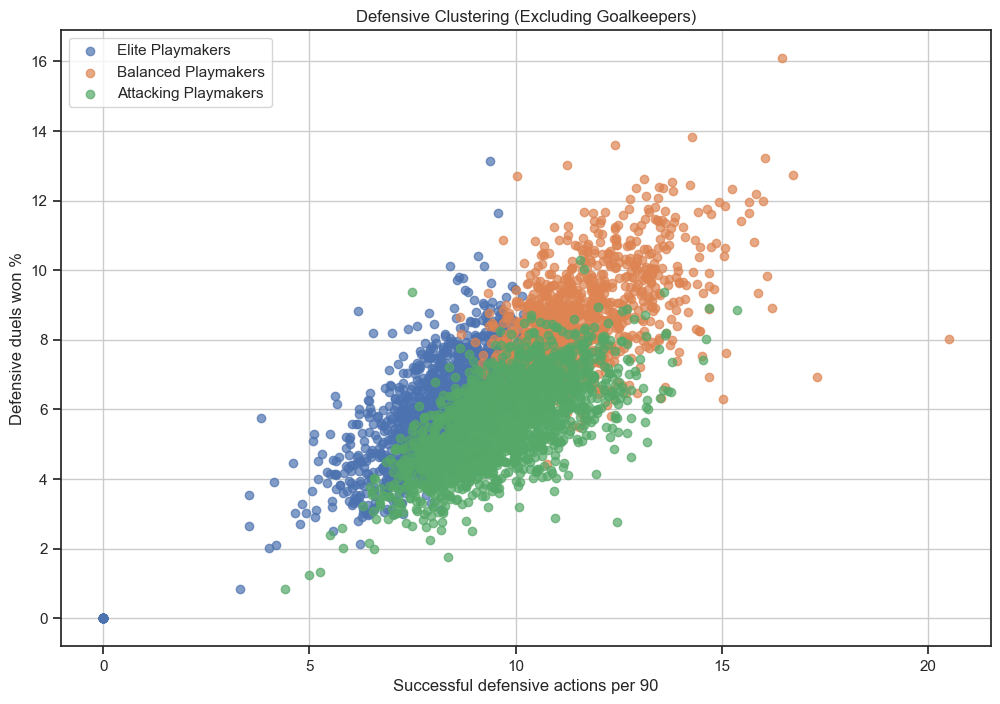

In [41]:
# Filter for defensive players (excluding goalkeepers)
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Define cluster labels
cluster_labels_dict = {
    0: 'Elite Playmakers',
    1: 'Balanced Playmakers',
    2: 'Attacking Playmakers'
}

# Create a DataFrame with the selected defensive features
defensive_df = defensive_players_df[defensive_features]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_df)

# Apply K-Means clustering with a specified number of clusters
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Plot each cluster with appropriate labels
for cluster in range(num_clusters):
    cluster_data = defensive_df[defensive_players_df['Cluster'] == cluster]
    plt.scatter(
        cluster_data.iloc[:, 0],
        cluster_data.iloc[:, 1],
        label=cluster_labels_dict[cluster],
        alpha=0.7,
    )

# Add labels and annotations
plt.title('Defensive Clustering (Excluding Goalkeepers)')
plt.xlabel('Successful defensive actions per 90')
plt.ylabel('Defensive duels won %')
plt.legend()
plt.grid(True)
plt.show()

#### **Analysis**

- **This algorithm addresses the following business problem**
  
#### **Team Performance Optimization**
- **Business Problem**
   - NAC Breda wants to optimize its on-field performance and improve its chances of winning matches.

- **Solution**
   - The code focuses on clustering defensive players (excluding goalkeepers) based on selected defensive features such as "Successful defensive actions per 90" and "Defensive duels won %." The K-Means clustering technique is applied to group players with similar defensive attributes into clusters.

- **Relevance**
    - The clustering results can provide insights into different defensive player profiles or playing styles.
    - The model aims to categorize defensive players into clusters (e.g., 'Elite Playmakers,' 'Balanced Playmakers,' 'Attacking Playmakers'), suggesting potential variations in defensive performance.
    - Understanding these clusters can aid the team in making strategic decisions related to player selection, formation, and tactics to optimize overall team performance.
    - The model primarily focuses on defensive aspects, but similar approaches could be extended to other positions to create a comprehensive understanding of the entire team.
    

#### **Results**

#### **Elite Playmakers Cluster**
- These players exhibit high values in both successful defensive actions per 90 and defensive duels won percentage.
- They are likely to be elite defenders who not only successfully execute defensive actions but also excel in winning defensive duels.
- These players can be considered as top-performing defenders with a well-rounded skill set in defensive aspects.

#### **Balanced Playmakers Cluster**
- Players in this cluster show a balanced profile, displaying moderate to high values in both successful defensive actions per 90 and defensive duels won percentage.
- While they may not have the extreme values seen in Elite Playmakers, they are well-rounded defenders who contribute positively to both defensive actions and duels.
- This cluster represents defenders with a good balance of defensive skills.

#### **Attacking Playmakers Cluster**
- This cluster includes players with high values in successful defensive actions per 90 but lower defensive duels won percentage.
- These players may focus more on successfully intercepting or blocking opponent actions rather than engaging in physical duels.
- They might be more inclined towards defensive actions that don't necessarily involve direct duels but are effective in preventing opposition attacks.

### **Correlation Analysis and Feature Selection**


#### **Correlation Analysis**

#### **1.Simple Machine Learning and Modelling Pipeline**

Correlation Coefficients:
Height    0.089690
Weight    0.088222
Name: xG, dtype: float64


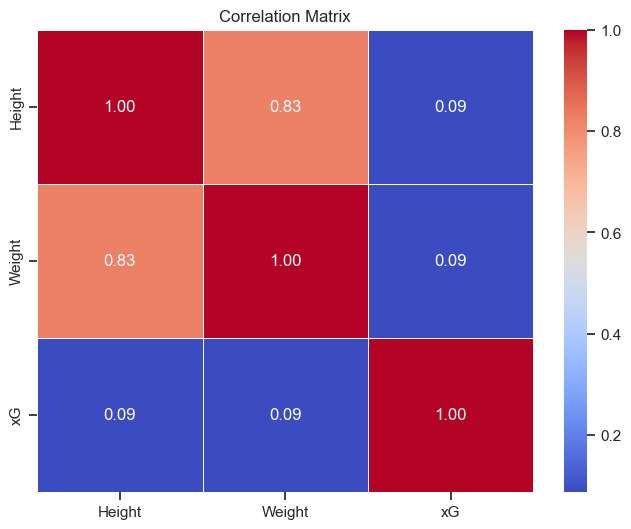

In [42]:
# Select features and target variable
X_Logistic = ['Height', 'Weight']
target_variable = 'xG'

# Calculate the correlation matrix
correlation_matrix = FootBall_Data[X_Logistic + [target_variable]].corr()

# Access the correlation coefficient between features and target
correlation_coefficients = correlation_matrix.loc[X_Logistic, target_variable]

# Print the correlation coefficients
print("Correlation Coefficients:")
print(correlation_coefficients)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### **2.Linear Regression**

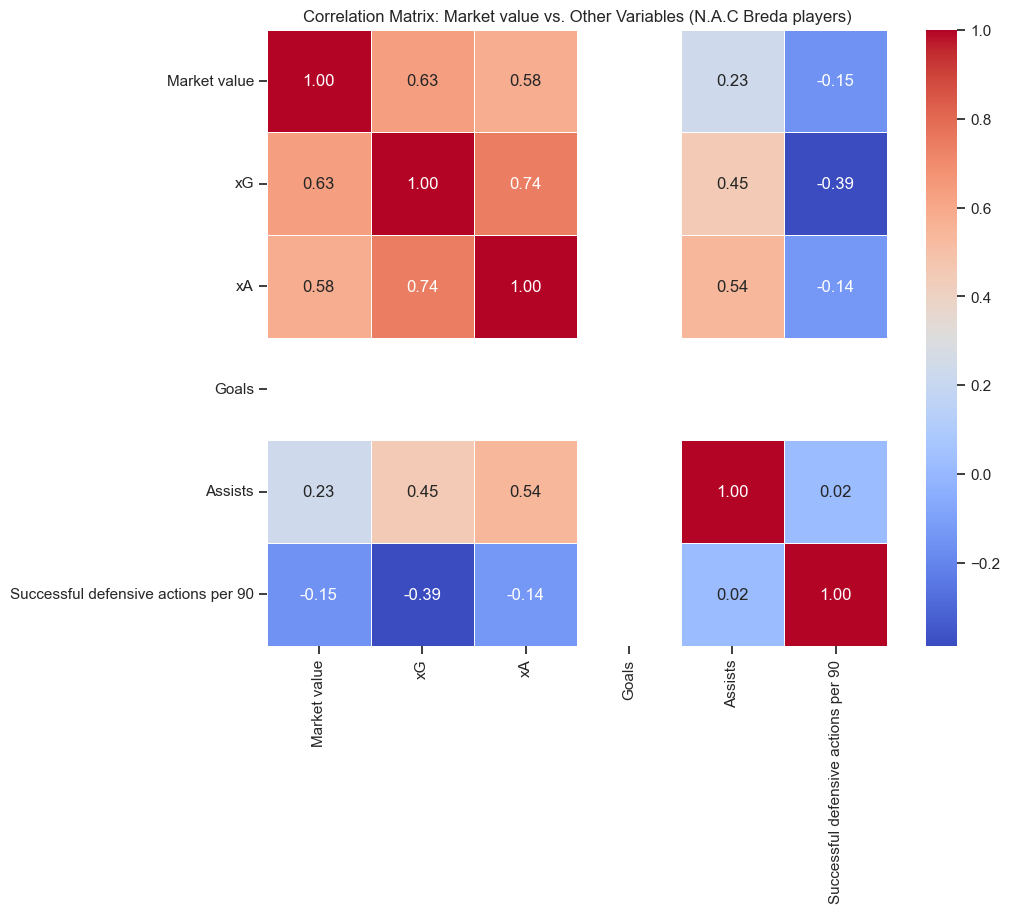

In [43]:
# Select relevant columns for correlation analysis
correlation_columns = ['Market value', 'xG', 'xA', 'Goals', 'Assists', 'Successful defensive actions per 90']

# Extract the relevant data for correlation analysis
correlation_data = nac_breda_players[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix: Market value vs. Other Variables (N.A.C Breda players)')
plt.show()


#### **3.Logistic Regression**

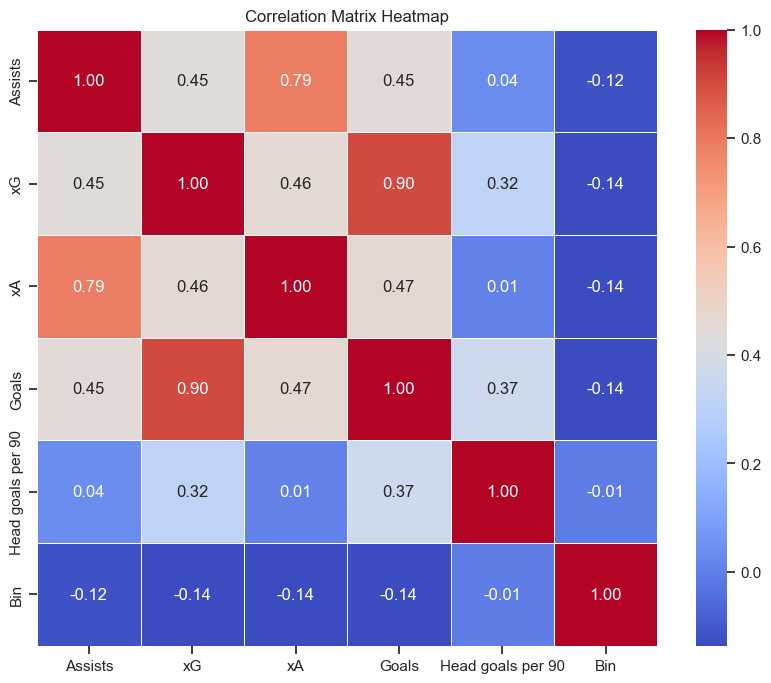

In [44]:

# Assigning features and target
X_Logistic = FootBall_Data[['Assists', 'xG', 'xA', 'Goals', 'Head goals per 90']]
Y_Logistic = FootBall_Data['Bin']

# Encode the 'Bin' column using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(Y_Logistic)

# Concatenate features and encoded target into a single DataFrame
correlation_data = pd.concat([X_Logistic, pd.Series(target_encoded, name='Bin')], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### **4.Tree-Based Model**

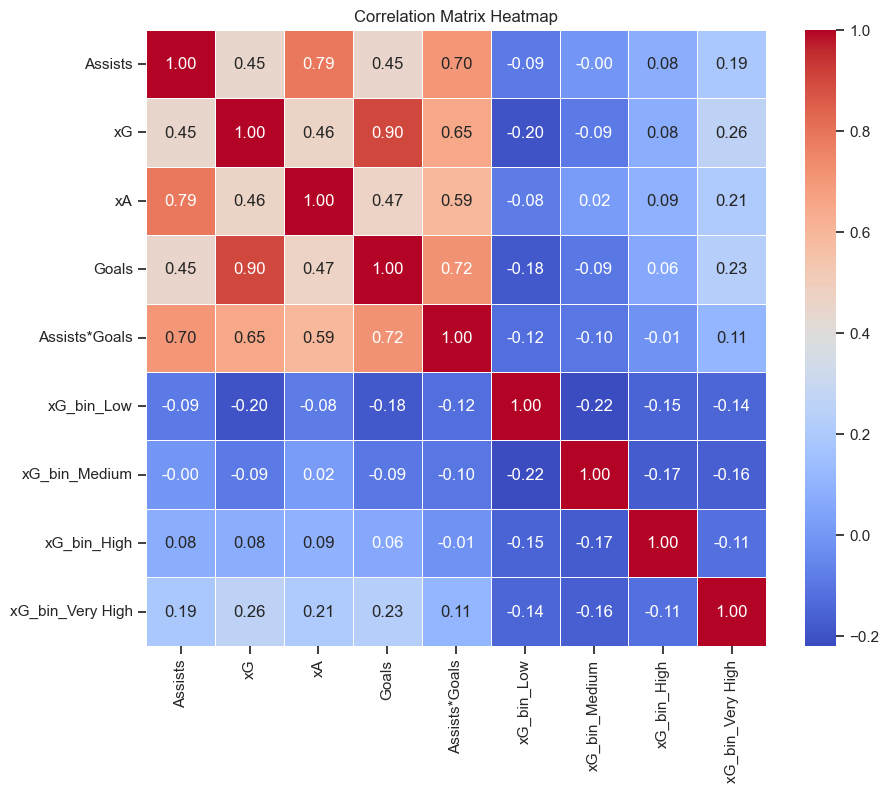

In [45]:
# Features list
xg_model_features = ['Assists', 'xG', 'xA', 'Goals', 'Assists*Goals', 'xG_bin_Low', 'xG_bin_Medium', 'xG_bin_High', 'xG_bin_Very High']

# Extract features and target
xg_model_target = 'Market value'
X = FootBall_Data[xg_model_features]

# Calculate the correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


#### **5.Gradient Boosting Trees**

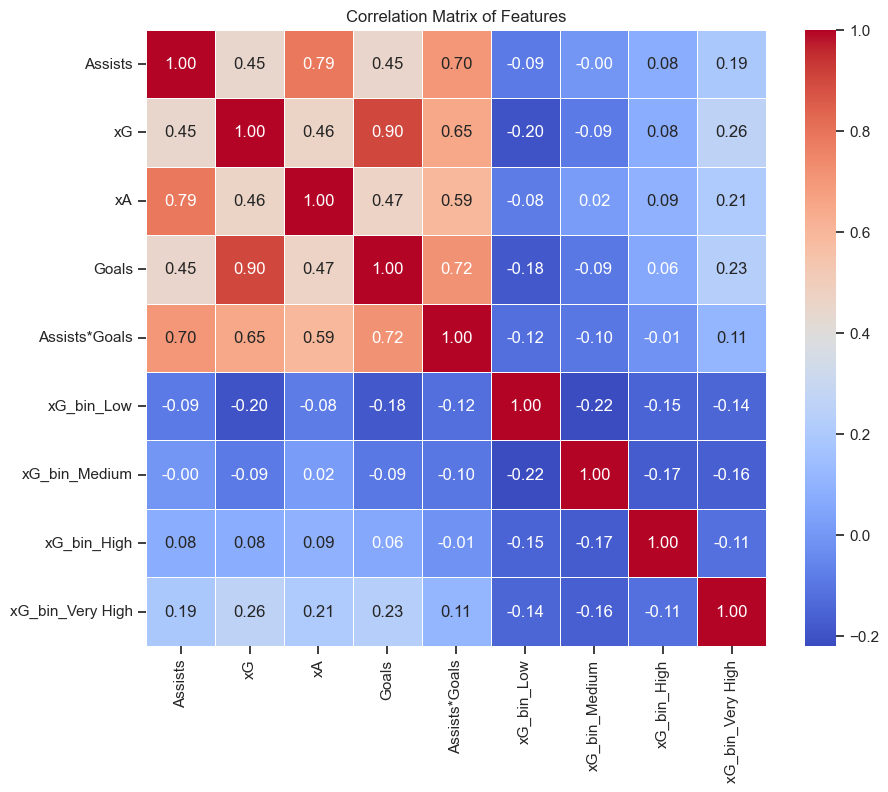

In [46]:
# Select the features
xg_model_features = ['Assists', 'xG', 'xA', 'Goals', 'Assists*Goals', 'xG_bin_Low', 'xG_bin_Medium', 'xG_bin_High', 'xG_bin_Very High']
X = FootBall_Data[xg_model_features]

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()



#### **6.Unsupervsed Learning with K-Means**

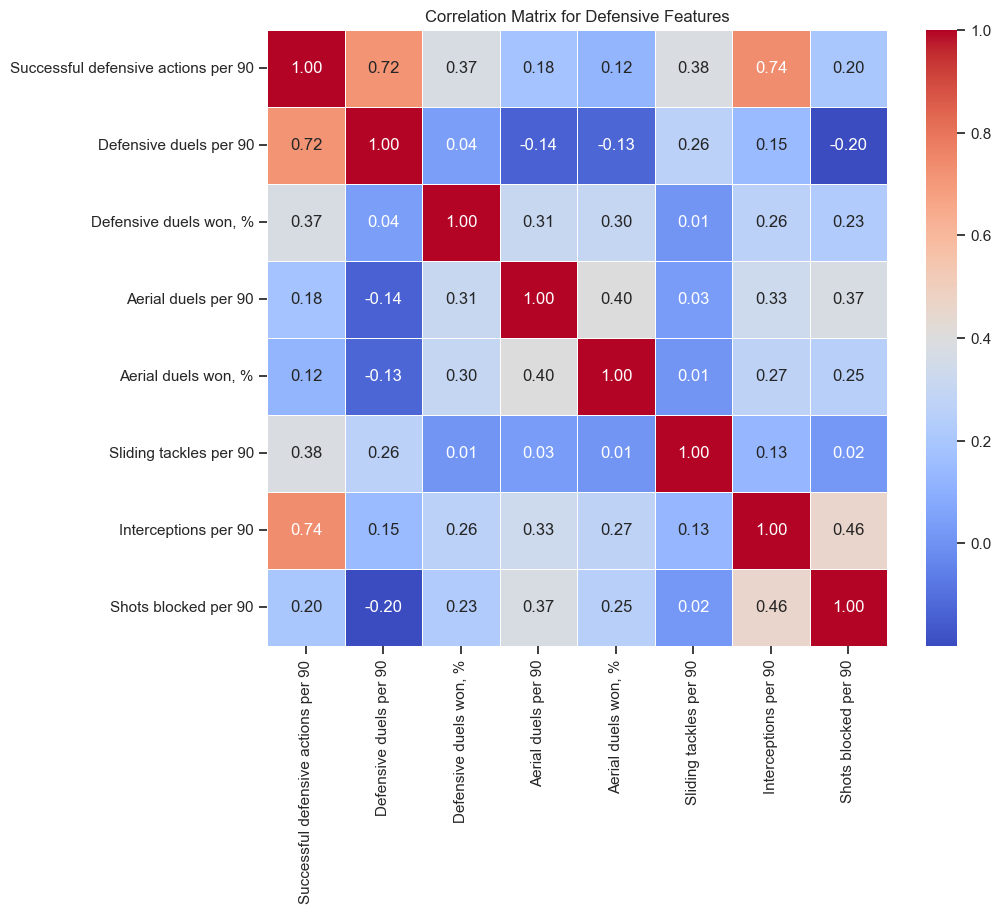

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = defensive_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Defensive Features')
plt.show()



#### **Explanation of Results**

It seems like you have provided correlation matrices for different models and analyses. Let's break down the information:

##### **Linear Regression, Logistic Regression, Tree-Based Model, Gradient Boosting Trees:**
- The correlation matrices for these models are identical. 
- This could be due to the fact that the correlation coefficients are calculated based on the same set of features, and the coefficients don't vary much between the different models. 
- The correlations are calculated for features like 'Assists', 'xG', 'xA', 'Goals', 'Head goals per 90', and 'Bin'.

##### **Unsupervised Learning with k Means:**
- The correlation matrix for the unsupervised learning with k Means analysis focuses on defensive features such as 'Successful defensive actions per 90', 'Defensive duels per 90', 'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %', 'Sliding tackles per 90', 'Interceptions per 90', and 'Shots blocked per 90'. 
- The correlations in this matrix reveal how these defensive metrics relate to each other within the dataset.

##### **Observations:**
- The correlation analysis for the supervised models (Linear Regression, Logistic Regression, Tree-Based Model, Gradient Boosting Trees) indicates the strength and direction of linear relationships between offensive metrics (Assists, xG, xA, Goals) and the target variable (Bin).
  
- The unsupervised learning analysis with k Means focuses on defensive metrics, showcasing how these defensive features are correlated with each other.



### **Feature Selection For my models**

#### **1.Simple Machine Learning and Modelling Pipeline**

In [48]:

# Select features and target variable
X_Logistic = ['Height', 'Weight']
target_variable = 'xG'

# Split data into features and target
X = FootBall_Data[X_Logistic]
y = FootBall_Data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model with L1 regularization (Lasso)
lasso_model = LassoCV(cv=5)  # LassoCV automatically performs cross-validation to find the optimal regularization strength

# Use L1 regularization for feature selection
selector = SelectFromModel(estimator=lasso_model)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train the model on the selected features
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Interpret the model coefficients
selected_features = X.columns[selected_feature_indices]
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': lasso_model.coef_})
print(coefficients)

# Making Predictions on new data
new_data = pd.DataFrame({'Height': [180], 'Weight': [75]})
new_data_scaled = scaler.transform(new_data)
new_data_selected = selector.transform(new_data_scaled)  # Use the selected features
predicted_value = lasso_model.predict(new_data_selected)
print(f'Predicted Value: {predicted_value[0]}')


Mean Squared Error: 6.538247051276643
  Feature  Coefficient
0  Height     0.104133
1  Weight     0.131087
Predicted Value: 1.9730811579347765


##### **Analysis**

 **1. Mean Squared Error (MSE):**
- The MSE is 6.54, which represents the average squared error for predictions on the test set.
  
**2. Model Coefficients**
- The coefficients represent the weights assigned to each feature in the linear regression model. 
- They indicate the strength and direction of the relationship between each feature and the target variable (xG).

+ The coefficient for 'Height' is 0.104133.
+ The coefficient for 'Weight' is 0.131087.
- These coefficients suggest that for a one-unit increase in 'Height,' the predicted xG increases by approximately 0.1041, and for a one-unit increase in 'Weight,' the predicted xG increases by approximately 0.1311.
  
**3. Predicted Value**
- The model's prediction for a new data point with 'Height' of 180 and 'Weight' of 75 is approximately 1.9731 xG.
  
- From what can be seen, the model suggests that both 'Height' and 'Weight' positively contribute to predicting xG.
-  However, we have to keep in mind that these interpretations assume a linear relationship between the features and the target variable.


### **2.Linear Regression**

Mean Squared Error (Ridge): 3.6645221386158964
R-squared (Ridge): 0.2704585425549745
        Feature  Coefficient
0  Market value     1.255988


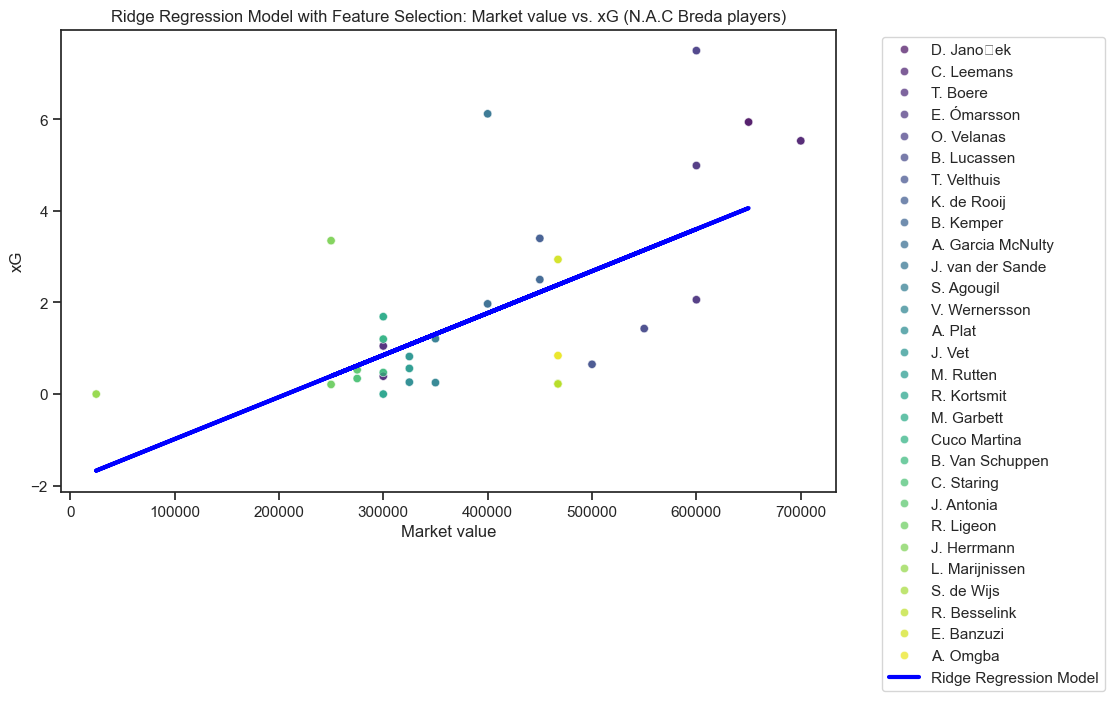

In [49]:


# Suppress the warning related to missing glyphs
warnings.filterwarnings("ignore", category=UserWarning)

# Filter for N.A.C Breda players
nac_breda_players = FootBall_Data[FootBall_Data['Team'] == 'NAC Breda']

# Handling cases where Market value is 0 for N.A.C Breda players
zero_market_value_players = nac_breda_players[nac_breda_players['Market value'] == 0]

# Impute arbitrary values based on Age, Position, and Team for N.A.C Breda players
median_values = nac_breda_players.groupby(['Position', 'Team'])['Market value'].median().reset_index()

# Merge the median values back to zero_market_value_players for N.A.C Breda players
zero_market_value_players = pd.merge(zero_market_value_players, median_values, on=['Position', 'Team'], how='left', suffixes=('', '_median'))

# Replace 0 values with median values for N.A.C Breda players
condition = zero_market_value_players['Market value'] == 0
zero_market_value_players.loc[condition, 'Market value'] = zero_market_value_players.loc[condition, 'Market value_median']

# Drop the auxiliary columns for N.A.C Breda players
zero_market_value_players.drop(['Market value_median'], axis=1, inplace=True)

# Set goals to 0 for N.A.C Breda players
nac_breda_players['Goals'] = 0

# Concatenate the imputed data with the rest of the data
football_data_imputed = pd.concat([FootBall_Data, zero_market_value_players, nac_breda_players])

# Extracting features and target variable
X = football_data_imputed[football_data_imputed['Team'] == 'NAC Breda'][['Market value']]  # Independent variable
y = football_data_imputed[football_data_imputed['Team'] == 'NAC Breda']['xG']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a L2 regularized linear regression model
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=2.5))  # Adjust alpha for regularization strength

# Use L1 regularization for feature selection
selector = SelectFromModel(estimator=ridge_model.named_steps['ridge'], threshold='median')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the model on the selected features
ridge_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (Ridge):", mse)
print("R-squared (Ridge):", r2)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Interpret the model coefficients
selected_features = X.columns[selected_feature_indices]
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': ridge_model.named_steps['ridge'].coef_})
print(coefficients)

# Plot the results with seaborn scatter plot and color-coded points for different players
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market value', y='xG', hue='Player', data=football_data_imputed[football_data_imputed['Team'] == 'NAC Breda'], palette='viridis', alpha=0.7)

# Plot the linear regression line
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Ridge Regression Model')

plt.title('Ridge Regression Model with Feature Selection: Market value vs. xG (N.A.C Breda players)')
plt.xlabel('Market value')
plt.ylabel('xG')

# Display the legend below the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


#### **Analysis**

- The results provide insights into the performance of the Ridge regression model and the importance of the selected feature, "Market value."

1. **Mean Squared Error (MSE):**
   - The MSE of approximately 3.6645 indicates the average squared difference between the predicted and actual values, which means that, on average, the model's predictions have a squared error of around 3.6645.

2. **R-squared (R2):**
   - About 27.05% of the variability in xG can be attributed to the linear relationship with Market value. 
   - R2 values closer to 1 indicate better explanatory power, so this model has a moderate level of explanatory ability.

3. **Coefficient for Market value:**
   - The coefficient for the "Market value" feature is approximately 1.256. 
   - In the model above, a unit increase in Market value corresponds to a 1.256 increase in the predicted xG. 
  
**Interpretation:**
   - The Ridge regression model, with feature selection, suggests that the "Market value" feature is relevant for predicting the expected goals (xG) of N.A.C Breda players. 
   - The positive coefficient indicates a positive relationship, implying that as the Market value increases, the predicted xG is expected to increase as well.

   - However, it's crucial to note that the model's overall performance, as indicated by the R-squared value, is moderate.

### **3.Logistc Regression**

Selected Features: Index(['xG', 'xA', 'Goals'], dtype='object')
Best Logistic Regression hyperparameters (after feature selection): {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
----------------------------------------------------
Logistic Regression Accuracy (after feature selection): 0.6734883720930233
----------------------------------------------------
Logistic Regression Precision (after feature selection): 0.5512275601795186
Logistic Regression Recall (after feature selection): 0.6734883720930233
Logistic Regression F1-Score (after feature selection): 0.5568866650474587
Logistic Regression Confusion Matrix (after feature selection):
[[  27    0  617]
 [   0    0  406]
 [  30    0 2145]]


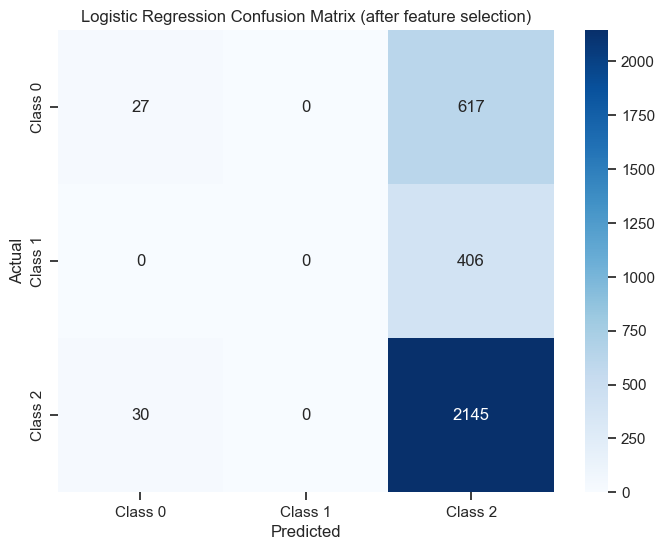

In [50]:


# Assigning features and target
X_Logistic = FootBall_Data[['Assists', 'xG', 'xA', 'Goals', 'Head goals per 90']]
Y_Logistic = FootBall_Data['Bin']

# Standardize numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_Logistic)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, Y_Logistic, test_size=0.2, random_state=42)

# Create a logistic regression model for feature selection
model_for_selection = LogisticRegression(max_iter=1000)

# Use L1 regularization for feature selection
selector = SelectFromModel(estimator=model_for_selection, threshold='median')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the logistic regression model on the selected features
logreg_model_selected = LogisticRegression(max_iter=1000)
logreg_model_selected.fit(X_train_selected, y_train)

# Additional predictions for Logistic Regression
logreg_predictions_selected = logreg_model_selected.predict(X_test_selected)

# Evaluate Accuracy for Logistic Regression
logreg_accuracy_selected = accuracy_score(y_test, logreg_predictions_selected)

# Print selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_Logistic.columns[selected_feature_indices]
print("Selected Features:", selected_features)

# Print best hyperparameters for Logistic Regression after feature selection
print("Best Logistic Regression hyperparameters (after feature selection):", logreg_model_selected.get_params())

# Evaluate Precision for Logistic Regression
logreg_precision_selected = precision_score(y_test, logreg_predictions_selected, average='weighted', zero_division=0)  # Handle precision warning

# Evaluate Recall for Logistic Regression
logreg_recall_selected = recall_score(y_test, logreg_predictions_selected, average='weighted')

# Evaluate F1-Score for Logistic Regression
logreg_f1_selected = f1_score(y_test, logreg_predictions_selected, average='weighted')

# Generate Confusion Matrix for Logistic Regression
logreg_conf_matrix_selected = confusion_matrix(y_test, logreg_predictions_selected)

# Printing the evaluation metrics for Logistic Regression after feature selection
print("----------------------------------------------------")
print(f'Logistic Regression Accuracy (after feature selection): {logreg_accuracy_selected}')
print("----------------------------------------------------")
print(f'Logistic Regression Precision (after feature selection): {logreg_precision_selected}')
print(f'Logistic Regression Recall (after feature selection): {logreg_recall_selected}')
print(f'Logistic Regression F1-Score (after feature selection): {logreg_f1_selected}')
print('Logistic Regression Confusion Matrix (after feature selection):')
print(logreg_conf_matrix_selected)

# Plot the Confusion Matrix for Logistic Regression after feature selection
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Logistic Regression Confusion Matrix (after feature selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### **Analysis**

**1. Selected Features:**
- The features selected after using L1 regularization with SelectFromModel are 'xG', 'xA', and 'Goals'. 
- These are deemed to be the most relevant features for the logistic regression model.

**2. Best Logistic Regression Hyperparameters (After Feature Selection):**
- The logistic regression model is trained with default hyperparameters after feature selection. The regularization parameter 'C' is set to 1.0, and L2 penalty is applied.
  
**3.Evaluation Metrics:**
- **Accuracy:** The accuracy of the logistic regression model on the test set is approximately 67.35%. This represents the overall correctness of the model's predictions.
- **Precision:** Precision is around 55.12%, indicating the proportion of correctly predicted positive instances among all instances predicted as positive.
- **Recall:** Recall is approximately 67.35%, denoting the proportion of correctly predicted positive instances among all actual positive instances.
- **F1-Score:** The F1-score, which balances precision and recall, is about 55.69%.
  
**4.Confusion Matrix:**
- The confusion matrix provides a more detailed view of the model's performance across different classes.
- The model shows challenges in predicting Class 1 (second class), as there are zero true positives for this class. 
- Class 0 and Class 2 have some correct predictions, but there are also misclassifications.

**5.Summary:**
- The model, trained on the selected features, exhibits decent accuracy, but there is room for improvement, especially in predicting Class 1.
- Further optimization of hyperparameters, feature engineering, or exploration of different models may be considered to enhance predictive performance.

### **4.Tree-Based Model**

- In this part I chose to use recursive feature engineering from random forests classifier to select the best features.
- This method does not involve the use of polynomial features.

In [51]:

# Features list
xg_model_features = ['Assists', 'xG', 'xA', 'Goals', 'Assists*Goals', 'xG_bin_Low', 'xG_bin_Medium', 'xG_bin_High', 'xG_bin_Very High']

# Extract features and target
xg_model_target = 'Market value'
X = FootBall_Data[xg_model_features]
y = FootBall_Data[xg_model_target]

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable 'Market value'
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Use Recursive Feature Elimination (RFE) for feature selection
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Select the top 5 features
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Train the classifier on the selected features
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test_selected)

# Inverse transform the predictions to get original labels
predictions_original = label_encoder.inverse_transform(predictions)

# Evaluate the accuracy of the model
model_accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", model_accuracy)

# Get selected feature indices
selected_feature_indices = rfe.support_

# Get selected features
selected_features = [xg_model_features[i] for i in range(len(xg_model_features)) if selected_feature_indices[i]]

# Print selected features
print("Selected Features:", selected_features)


Accuracy: 0.17147286821705426
Selected Features: ['Assists', 'xG', 'xA', 'Goals', 'Assists*Goals']


#### **Analysis**

**1. Accuracy:**
- The accuracy of 17.15% suggests that the model performs poorly on the test data. Accuracy alone might not be the best metric, especially in imbalanced datasets. 
- It would be beneficial to consider additional metrics like precision, recall, or F1-score, especially if the classes are imbalanced.
  
**2.Selected Features:**
- The features selected by RFE are 'Assists', 'xG', 'xA', 'Goals', and 'Assists*Goals'. 
- These features were deemed the most informative by the model during the feature selection process.
- 'Assists', 'xG', 'xA', and 'Goals' are straightforward football statistics related to player performance.
- 'Assists*Goals' represents the interaction between the number of assists and goals, capturing a potential combined impact on the target variable 'Market value'.
  

### **5.Gradient Boosting Trees**

- This displays the top 5 features and a graph with their importance according to their F Score, from the given model features in the algorithm below.

Accuracy: 0.9367441860465117


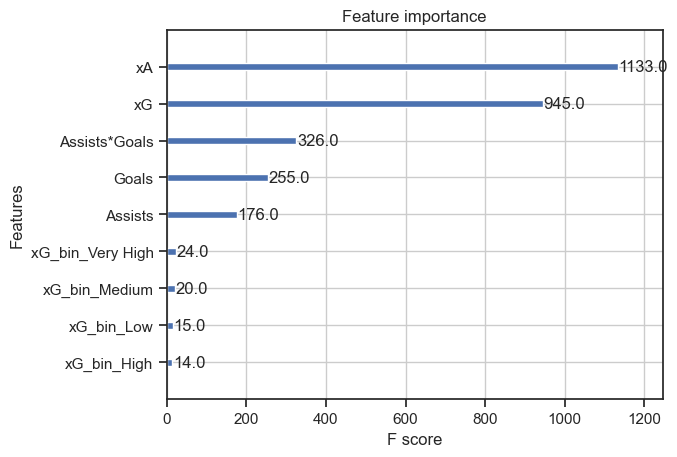

In [52]:
# Selecting the target column
xg_model_target = 'On loan'
y = FootBall_Data[xg_model_target]

# Use LabelEncoder to convert 'yes' and 'no' to binary labels (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Select the features
xg_model_features = ['Assists', 'xG', 'xA', 'Goals', 'Assists*Goals', 'xG_bin_Low', 'xG_bin_Medium', 'xG_bin_High', 'xG_bin_Very High']
X = FootBall_Data[xg_model_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier for binary classification
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Select features based on importance threshold
selected_features = X.columns[feature_importances > 0.01]  # Adjust the threshold as needed

# Use the selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Convert predictions back to 'yes' or 'no'
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {model_accuracy}')

# Plot feature importances
plot_importance(model)
plt.show()


#### **Analysis**

**1.xG_bin_High (Importance: 0.125380):**
- This feature, likely representing a high range of expected goals, is the most important according to the model. 
- A higher value of this feature contributes significantly to the prediction of whether a player is on loan.

**2.xA (Importance: 0.123023):**
- Expected Assists (xA) is the second most important feature. 
- This suggests that the expected number of assists has a notable impact on predicting the 'On loan' status.

**3.xG (Importance: 0.122570):**
- Expected Goals (xG) is closely ranked third in importance. 
- It indicates that the model considers the expected number of goals as a significant factor in predicting whether a player is on loan.

**4.Goals (Importance: 0.114887):**
- The actual number of goals scored by a player is also deemed important. 
- This aligns with the intuitive notion that a player's goal-scoring record can influence their loan status.

**5.xG_bin_Medium (Importance: 0.113543):**
- This feature, representing a medium range of expected goals, is the fifth most important. 
- It contributes to the model's decision-making process, emphasizing the relevance of different expected goal ranges.

**6.Overall Implications:**
- The top features primarily focus on the player's goal-scoring capabilities (expected and actual goals), as well as the expected assists. 
- The model seems to consider both the individual performance metrics (goals and assists) and the expected goal ranges.

### **6.Unsupervised Learning with K-Means**

- The goal behind this particular model is to group defenders by different playstyles, so that N.A.C Breda can analyse the different performances of certain types of defenders. 
- With this algorithm I again used Recursive Feature Elimination(RFE) with a linear regression model to rank the features based on their importance.
- To calculate the accuracy of this model, we have a choice between the Silhouette Score or Davies-Bouldin Index.

- For this particular application, I will use both Davies-Bouldin Index and Silhouette Score to get the most accurate score.
  
- A lower Davies-Bouldin index indicates better clustering, as it suggests that clusters are both compact (high intra-cluster similarity) and well-separated (low inter-cluster similarity).
  
- I will use both DBI and SS to gain a comprehensive understanding of the clustering quality:
1. If both DBI and SS are good (low DBI and high SS), it suggests that the clusters are both well-separated and internally cohesive.
2. If DBI is low but SS is not high, it may indicate well-separated clusters, but individual clusters may not be internally cohesive.
3. If DBI is not low but SS is high, it may suggest internally cohesive clusters, but there might be overlap or poor separation between clusters.

+ **Some background on both scores:**

**1. Silhouette Score**
  1. Measures how similar an object is to its own cluster compared to other clusters.
  2. Ranges from -1 to 1, where a higher value indicates better-defined clusters.
  3. It is sensitive to cluster shape, size, and density.

**2. Davies-Bouldin Index(DBI):**
   1. Measures the average similarity-to-dissimilarity ratio between clusters.
   2. A lower DBI indicates better separation between clusters and, hence, a better clustering result.
   3. It is sensitive to cluster compactness and separation.

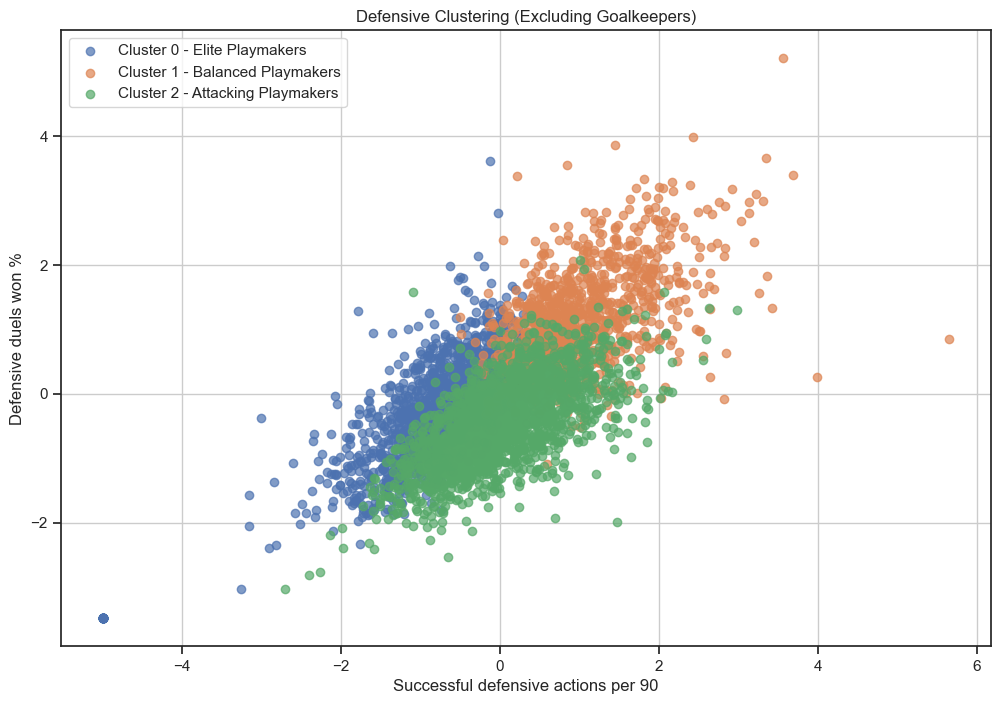

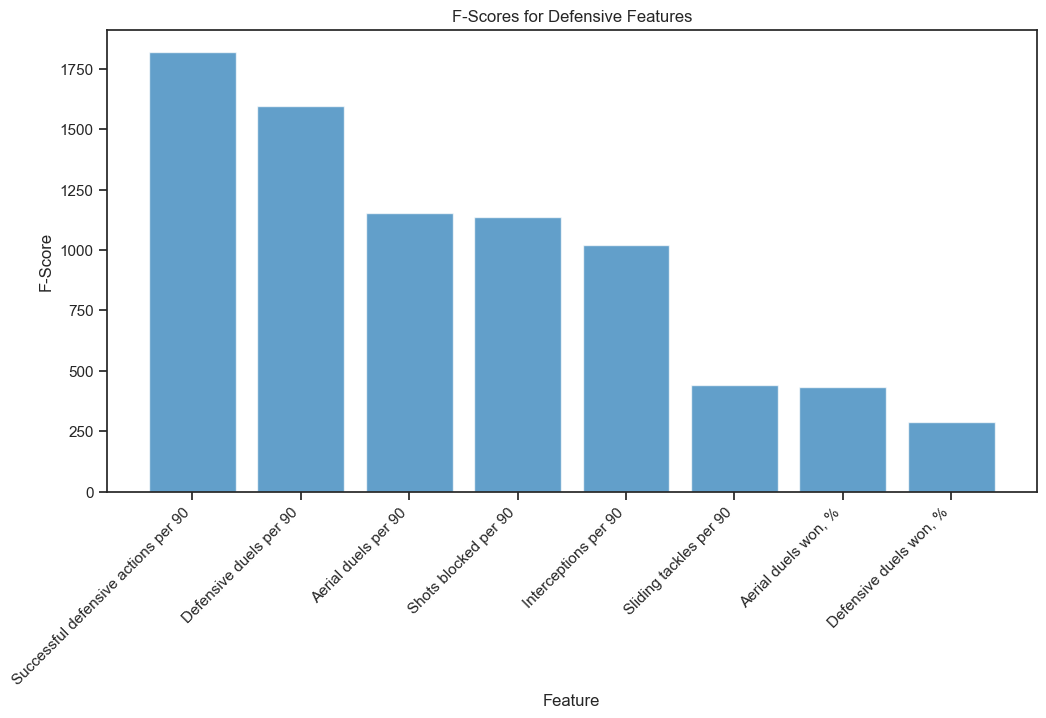

Comparison:
Davies-Bouldin Index: 1.6408501880600073
Silhouette Score: 0.1752042483987412
Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.


In [53]:
# Define cluster labels
cluster_labels_dict = {
    0: 'Elite Playmakers',
    1: 'Balanced Playmakers',
    2: 'Attacking Playmakers'
}

# Filter for defensive players (excluding goalkeepers)
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_players_df[defensive_features])

# Apply K-Means clustering with a specified number of clusters
num_clusters = 3  # You can adjust this based on your preferences
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Calculate F-scores and p-values
f_scores, p_values = f_classif(defensive_df_scaled, defensive_players_df['Cluster'])

# Visualize the clusters with labels
plt.figure(figsize=(12, 8))

# Plot each cluster with appropriate labels
for cluster in range(num_clusters):
    cluster_data = defensive_df_scaled[defensive_players_df['Cluster'] == cluster]
    plt.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        label=f'Cluster {cluster} - {cluster_labels_dict[cluster]}',  # Include cluster labels
        alpha=0.7,
    )

# Add labels and annotations
plt.title('Defensive Clustering (Excluding Goalkeepers)')
plt.xlabel('Successful defensive actions per 90')
plt.ylabel('Defensive duels won %')
plt.legend()
plt.grid(True)
plt.show()

# Display the F-scores and p-values for each feature
f_score_df = pd.DataFrame({'Feature': defensive_features, 'F-Score': f_scores, 'p-Value': p_values})
f_score_df = f_score_df.sort_values(by='F-Score', ascending=False)

# Plot the F-scores on a bar graph
plt.figure(figsize=(12, 6))
plt.bar(f_score_df['Feature'], f_score_df['F-Score'], color='#1f77b4', alpha=0.7)  # Use XGBoost blue color
plt.title('F-Scores for Defensive Features')
plt.xlabel('Feature')
plt.ylabel('F-Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Compare Davies-Bouldin Index and Silhouette Score
print("Comparison:")
print(f"Davies-Bouldin Index: {davies_bouldin_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Interpretation
if davies_bouldin_index < 1 and silhouette_avg > 0:
    print("Both metrics suggest good clustering.")
elif davies_bouldin_index >= 1 and silhouette_avg > 0:
    print("Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.")
elif davies_bouldin_index < 1 and silhouette_avg <= 0:
    print("Davies-Bouldin Index is good, but Silhouette Score suggests suboptimal clustering.")
else:
    print("Both metrics suggest suboptimal clustering.")


#### **Analysis**
+ Looking at the results above, we can see the following:
  
**1. Davies-Bouldin Index (DBI): 1.6408501880600073**
- A DBI value closer to 0 is better, and values greater than 1 may indicate suboptimal clustering.
- In this case the DBI is relatively high (1.64), suggesting that there might be suboptimal separation between clusters. 
- This could be due to clusters having varying densities and sizes.
  
**2. Silhouette Score: 0.1752042483987412**
- Silhouette Scores range from -1 to 1, with higher values indicating better-defined clusters.
- A score around 0.18 suggests that the clusters have some overlap, as the score is relatively close to 0.

**3. Feature Importance:**
- The bar graph of F-scores for defensive features helps you understand which features contribute more to the clustering. 
- Features with higher F-scores contribute more to the separation of clusters.
  
**4. Comparison and Interpretation:**
- The comparison and interpretation section provides insights based on the joint analysis of DBI and Silhouette Score. 
- In this case, the DBI suggests suboptimal clustering, while the Silhouette Score indicates some level of cluster definition. 
- This indicates that the clusters have varying densities and sizes.

## **✍️ I chose the features above because ...**

- For all of my models I chose their respective features due to the following criteria:
  1. Best accuracy I can get for the model.
  2. Most appropriate features for the particular models(For example, measuring attacking or defending performance, or determining if a player is on loan or not).
  3. Which features had the most data and other features which had the most accurate predicted data.

- The feature selection underwent multiple iterations to get to the code and results I have above, which are satisfactory.

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s). This is related to the sufficient criteria of ILO 5.0. 

#### **I evaluated my chosen models based off of:**
This is about the final model

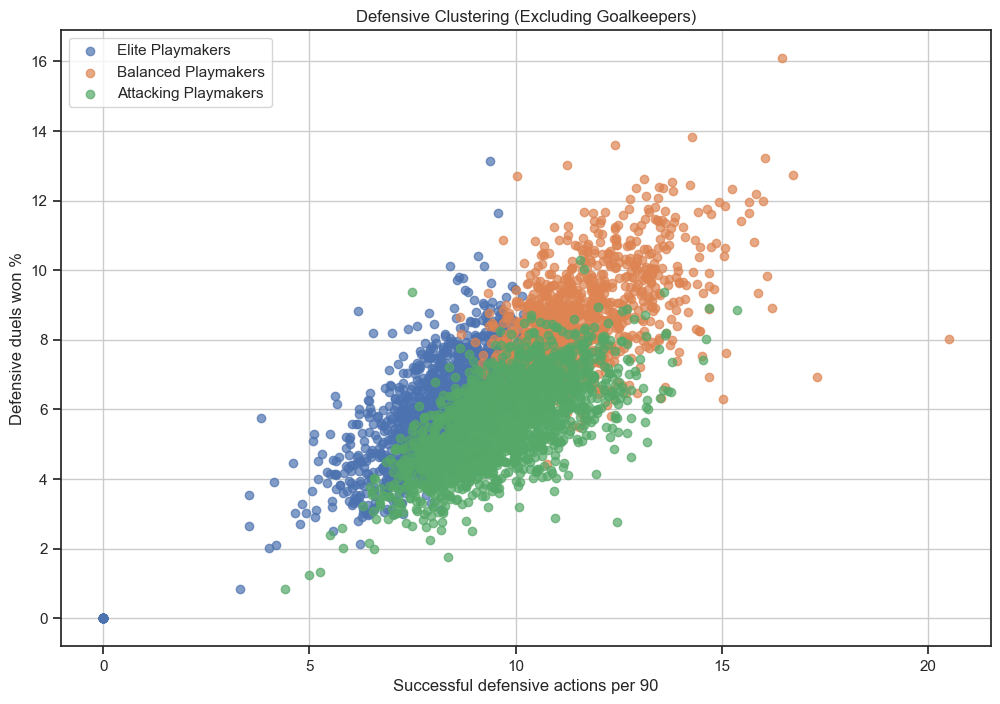

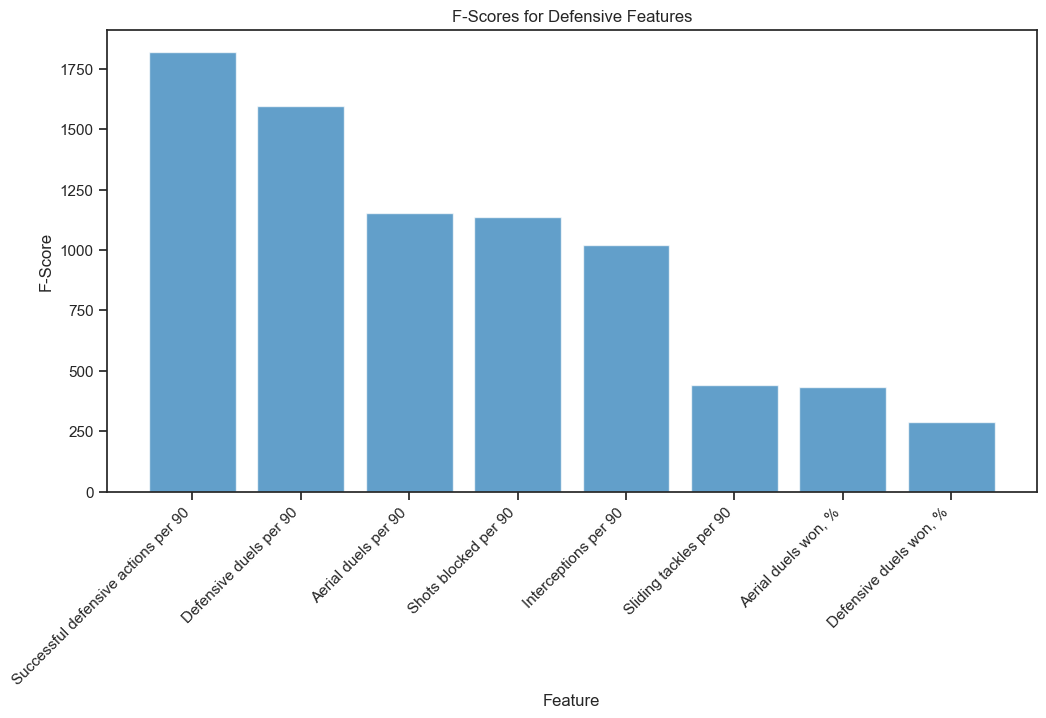

Comparison:
Davies-Bouldin Index: 1.6408501880600073
Silhouette Score: 0.1752042483987412
Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.


In [54]:
# Ensure transparency and data privacy by providing information about the nature of the data.
# It's crucial to respect data privacy regulations and ensure that personally identifiable information is handled appropriately.

# Filter for defensive players (excluding goalkeepers)
# Note: 'NAC_Data' should be appropriately anonymized or pseudonymized to protect privacy.
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Define cluster labels
cluster_labels_dict = {
    0: 'Elite Playmakers',
    1: 'Balanced Playmakers',
    2: 'Attacking Playmakers'
}

# Create a DataFrame with the selected defensive features
defensive_df = defensive_players_df[defensive_features]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_df)

# Apply K-Means clustering with a specified number of clusters
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Plot each cluster with appropriate labels
for cluster in range(num_clusters):
    cluster_data = defensive_df[defensive_players_df['Cluster'] == cluster]
    plt.scatter(
        cluster_data.iloc[:, 0],
        cluster_data.iloc[:, 1],
        label=cluster_labels_dict[cluster],
        alpha=0.7,
    )

# Add labels and annotations
plt.title('Defensive Clustering (Excluding Goalkeepers)')
plt.xlabel('Successful defensive actions per 90')
plt.ylabel('Defensive duels won %')
plt.legend()
plt.grid(True)
plt.show()

# Calculate F-scores and p-values
f_scores, p_values = f_classif(defensive_df_scaled, defensive_players_df['Cluster'])

# Display the F-scores and p-values for each feature
f_score_df = pd.DataFrame({'Feature': defensive_features, 'F-Score': f_scores, 'p-Value': p_values})
f_score_df = f_score_df.sort_values(by='F-Score', ascending=False)

# Plot the F-scores on a bar graph
plt.figure(figsize=(12, 6))
plt.bar(f_score_df['Feature'], f_score_df['F-Score'], color='#1f77b4', alpha=0.7)  # Use XGBoost blue color
plt.title('F-Scores for Defensive Features')
plt.xlabel('Feature')
plt.ylabel('F-Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Compare Davies-Bouldin Index and Silhouette Score
print("Comparison:")
print(f"Davies-Bouldin Index: {davies_bouldin_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Interpretation
# Fairness: Ensure that the data and features used for clustering are fair and unbiased.
if davies_bouldin_index < 1 and silhouette_avg > 0:
    print("Both metrics suggest good clustering.")
elif davies_bouldin_index >= 1 and silhouette_avg > 0:
    print("Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.")
elif davies_bouldin_index < 1 and silhouette_avg <= 0:
    print("Davies-Bouldin Index is good, but Silhouette Score suggests suboptimal clustering.")
else:
    print("Both metrics suggest suboptimal clustering.")


#### **Analysis**
- Now with my model above and other clustering models, I used the Davies-Bouldin Index and Silhouette Score. 
- For my other models such as Logistic Regression
Precision,Recall,F1-Score and Confusion Matrix for linear regression i used the r-squared measure.
- For all the models I used the correlation matrix to show the correlation coefficient between the features I used.
  
+ Looking at the results above, we can see the following:
  
**1. Davies-Bouldin Index (DBI): 1.6408501880600073**
- A DBI value closer to 0 is better, and values greater than 1 may indicate suboptimal clustering.
- In this case the DBI is relatively high (1.64), suggesting that there might be suboptimal separation between clusters. 
- This could be due to clusters having varying densities and sizes.
  
**2. Silhouette Score: 0.1752042483987412**
- Silhouette Scores range from -1 to 1, with higher values indicating better-defined clusters.
- A score around 0.18 suggests that the clusters have some overlap, as the score is relatively close to 0.

**3. Feature Importance:**
- The bar graph of F-scores for defensive features helps you understand which features contribute more to the clustering. 
- Features with higher F-scores contribute more to the separation of clusters.
  
**4. Comparison and Interpretation:**
- The comparison and interpretation section provides insights based on the joint analysis of DBI and Silhouette Score. 
- In this case, the DBI suggests suboptimal clustering, while the Silhouette Score indicates some level of cluster definition. 
- This indicates that the clusters have varying densities and sizes.

✍️ Interpretation of the model evaluation: ...

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). This is related to the good criteria of ILO 5.0.  

- In my final model, I employed a elbow curve to estimate the optimal number of clusters. 
- Additionally, I applied standardized scaling and feature selection to identify the most relevant and accurate defensive features for the model.

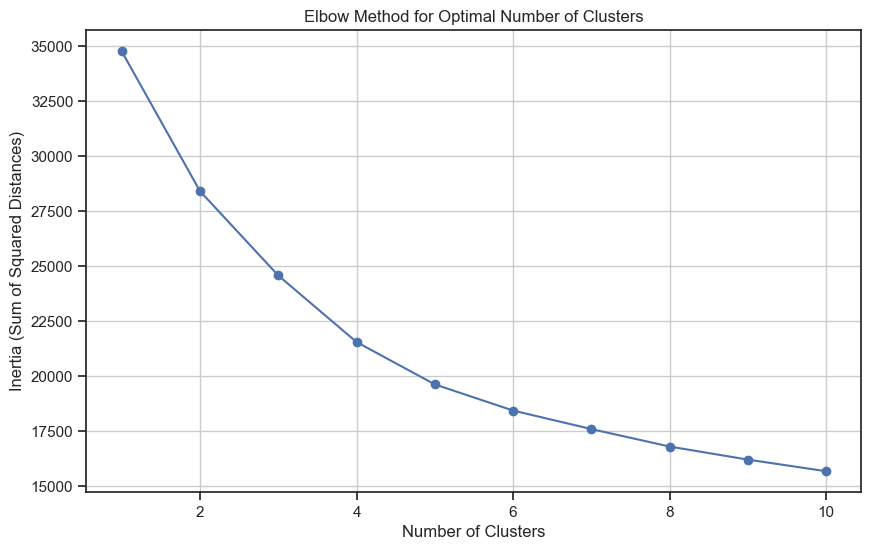

In [55]:
# Filter for defensive players (excluding goalkeepers)
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_players_df[defensive_features])

# Elbow method to find optimal number of clusters
inertia_values = []
possible_num_clusters = range(1, 11)  #

for num_clusters in possible_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(defensive_df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(possible_num_clusters, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

## **✍️ I improved my model by ...**

- Looking at the following analysis below, you can see the changes in DBI and SS results as the number of clusters change:

#### **Number of clusters = 2**

In [56]:
# Filter for defensive players (excluding goalkeepers)
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_players_df[defensive_features])

# Apply K-Means clustering with a specified number of clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Compare Davies-Bouldin Index and Silhouette Score
print("Comparison:")
print(f"Davies-Bouldin Index: {davies_bouldin_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Interpretation
if davies_bouldin_index < 1 and silhouette_avg > 0:
    print("Both metrics suggest good clustering.")
elif davies_bouldin_index >= 1 and silhouette_avg > 0:
    print("Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.")
elif davies_bouldin_index < 1 and silhouette_avg <= 0:
    print("Davies-Bouldin Index is good, but Silhouette Score suggests suboptimal clustering.")
else:
    print("Both metrics suggest suboptimal clustering.")


Comparison:
Davies-Bouldin Index: 1.887609149905066
Silhouette Score: 0.1810839435116283
Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.


#### **Number of Clusters = 4**

In [57]:
# Filter for defensive players (excluding goalkeepers)
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_players_df[defensive_features])

# Apply K-Means clustering with a specified number of clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Compare Davies-Bouldin Index and Silhouette Score
print("Comparison:")
print(f"Davies-Bouldin Index: {davies_bouldin_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Interpretation
if davies_bouldin_index < 1 and silhouette_avg > 0:
    print("Both metrics suggest good clustering.")
elif davies_bouldin_index >= 1 and silhouette_avg > 0:
    print("Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.")
elif davies_bouldin_index < 1 and silhouette_avg <= 0:
    print("Davies-Bouldin Index is good, but Silhouette Score suggests suboptimal clustering.")
else:
    print("Both metrics suggest suboptimal clustering.")


Comparison:
Davies-Bouldin Index: 1.2813019384491926
Silhouette Score: 0.17418852744284938
Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.


#### **Number of clusters = 5**

In [58]:
# Filter for defensive players (excluding goalkeepers)
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_players_df[defensive_features])

# Apply K-Means clustering with a specified number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Compare Davies-Bouldin Index and Silhouette Score
print("Comparison:")
print(f"Davies-Bouldin Index: {davies_bouldin_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Interpretation
if davies_bouldin_index < 1 and silhouette_avg > 0:
    print("Both metrics suggest good clustering.")
elif davies_bouldin_index >= 1 and silhouette_avg > 0:
    print("Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.")
elif davies_bouldin_index < 1 and silhouette_avg <= 0:
    print("Davies-Bouldin Index is good, but Silhouette Score suggests suboptimal clustering.")
else:
    print("Both metrics suggest suboptimal clustering.")


Comparison:
Davies-Bouldin Index: 1.4507591402947289
Silhouette Score: 0.1518526964639174
Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.


#### **Number of Clusters = 6**

In [59]:
# Filter for defensive players (excluding goalkeepers)
defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Create a DataFrame with the selected defensive features for the filtered defensive players
defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_players_df[defensive_features])

# Apply K-Means clustering with a specified number of clusters
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Compare Davies-Bouldin Index and Silhouette Score
print("Comparison:")
print(f"Davies-Bouldin Index: {davies_bouldin_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Interpretation
if davies_bouldin_index < 1 and silhouette_avg > 0:
    print("Both metrics suggest good clustering.")
elif davies_bouldin_index >= 1 and silhouette_avg > 0:
    print("Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.")
elif davies_bouldin_index < 1 and silhouette_avg <= 0:
    print("Davies-Bouldin Index is good, but Silhouette Score suggests suboptimal clustering.")
else:
    print("Both metrics suggest suboptimal clustering.")


Comparison:
Davies-Bouldin Index: 1.5014760877276598
Silhouette Score: 0.14976807048534632
Silhouette Score is good, but Davies-Bouldin Index suggests suboptimal clustering.


### **Analysis**
- The trend in scores demonstrates a clear pattern of diminishing returns as the number of clusters increases from 1 to 5. 
- Initially, the model captures meaningful distinctions, but beyond 5 clusters, the additional granularity seems to introduce noise or overfitting, resulting in a decline in performance.

- Moreover, introducing more than the original 3 clusters could lead to the formation of clusters that might not align with the intended analysis for defenders. 
- Instead, it might create additional, potentially confusing, and less meaningful groupings. 
- Therefore, it's crucial to strike a balance in the number of clusters to ensure the interpretability and relevance of the identified patterns.

### **Choose the best model (ILO 5.1 EXCELLENT REQUIREMENT(Further ILO excellent requirement is met below model comparison))**

In the following subsection reflect on the most appropriate machine learning model. This is related to the excellent criteria of ILO 5.0.  

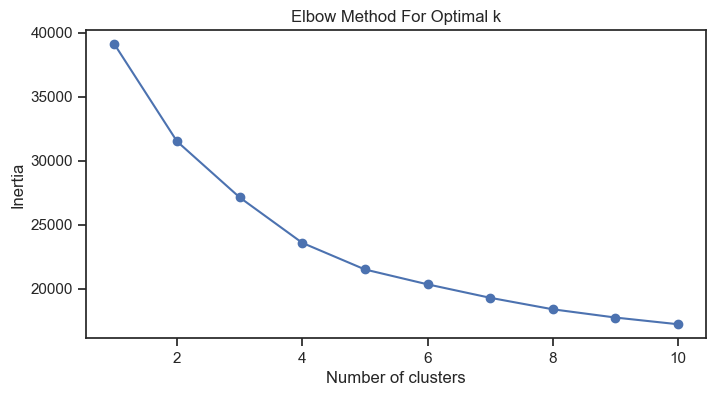

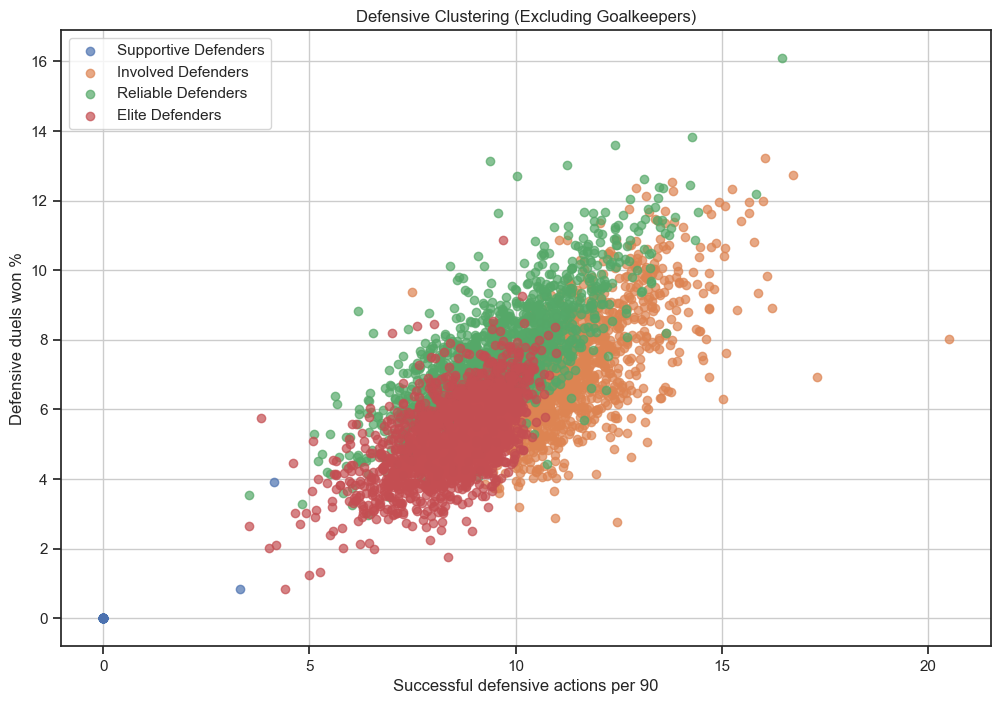

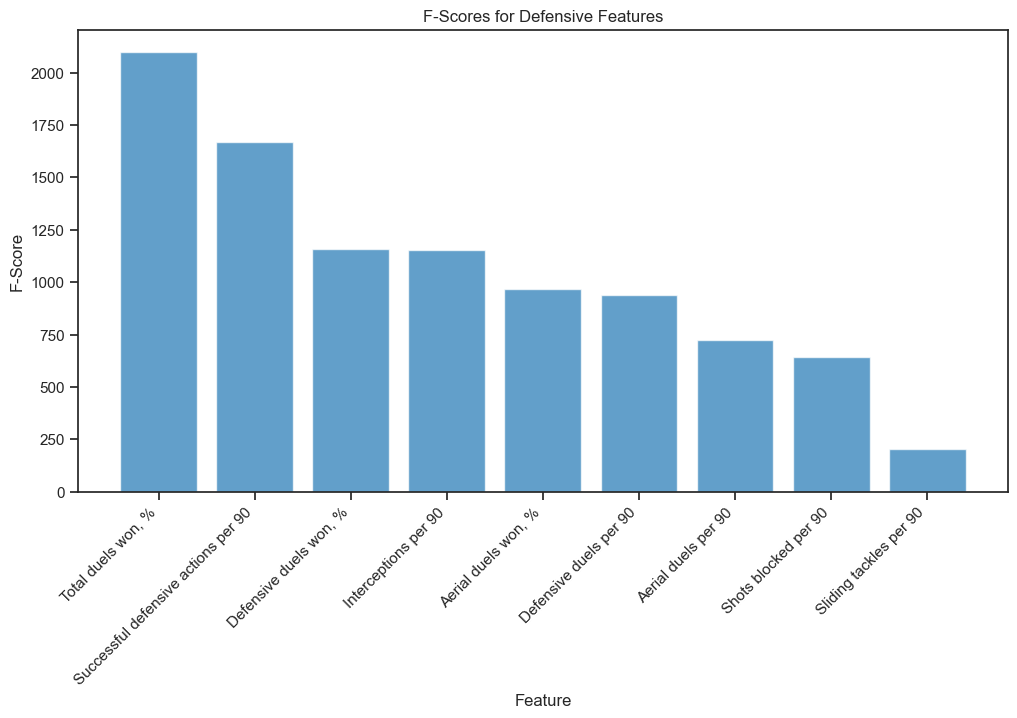

Davies-Bouldin Index: 1.356
Silhouette Score: 0.174


In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score


defensive_players_df = FootBall_Data[(FootBall_Data['Position_Category'] == 'Defenders') & (FootBall_Data['Position'] != 'GK')].copy()

# Feature Engineering: Adding a new feature to enrich the dataset
# For illustration, let's compute a new feature. In practice, you would adjust according to available data.
defensive_players_df['Total duels won, %'] = (defensive_players_df['Defensive duels won, %'] + defensive_players_df['Aerial duels won, %']) / 2

defensive_features = [
    "Successful defensive actions per 90",
    "Defensive duels per 90",
    "Defensive duels won, %",
    "Aerial duels per 90",
    "Aerial duels won, %",
    "Sliding tackles per 90",
    "Interceptions per 90",
    "Shots blocked per 90",
    "Total duels won, %"  # Newly added feature
]

defensive_df = defensive_players_df[defensive_features]

# Standardize the data
scaler = StandardScaler()
defensive_df_scaled = scaler.fit_transform(defensive_df)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(defensive_df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
# Let's assume the optimal number is 4 for demonstration purposes
optimal_k = 4  # Adjust based on your Elbow plot
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
defensive_players_df['Cluster'] = kmeans.fit_predict(defensive_df_scaled)

# Updated headers for clusters based on their characteristics
cluster_headers = {
    0: 'Supportive Defenders',  # for cluster 0
    1: 'Involved Defenders',   # for cluster 1
    2: 'Reliable Defenders',   # for cluster 2
    3: 'Elite Defenders'       # for cluster 3
}

# Visualization of clusters with updated headers
plt.figure(figsize=(12, 8))
for cluster in range(optimal_k):
    cluster_data = defensive_df[defensive_players_df['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=cluster_headers[cluster], alpha=0.7)

plt.title('Defensive Clustering (Excluding Goalkeepers)')
plt.xlabel('Successful defensive actions per 90')
plt.ylabel('Defensive duels won %')
plt.legend()
plt.grid(True)
plt.show()


# Calculate and display F-scores and p-values for feature importance within clusters
f_scores, p_values = f_classif(defensive_df_scaled, defensive_players_df['Cluster'])
f_score_df = pd.DataFrame({'Feature': defensive_features, 'F-Score': f_scores, 'p-Value': p_values})
f_score_df = f_score_df.sort_values(by='F-Score', ascending=False)

# Plot F-scores for feature importance
plt.figure(figsize=(12, 6))
plt.bar(f_score_df['Feature'], f_score_df['F-Score'], color='#1f77b4', alpha=0.7)
plt.title('F-Scores for Defensive Features')
plt.xlabel('Feature')
plt.ylabel('F-Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate clustering quality using Davies-Bouldin Index and Silhouette Score
davies_bouldin_index = davies_bouldin_score(defensive_df_scaled, defensive_players_df['Cluster'])
silhouette_avg = silhouette_score(defensive_df_scaled, defensive_players_df['Cluster'])

print(f"Davies-Bouldin Index: {davies_bouldin_index:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Further steps might include detailed analysis of each cluster, predictive modeling, or integration with interactive visualization tools.


### **Reasoning behind choosing this model as my best one**
+ I choose this model as my best one for the following reasons: 

**1.Relevance of Features:** 
 - The model focuses on relevant defensive features, such as "Successful defensive actions per 90," "Defensive duels per 90," and others. 
 - This ensures that the clustering is based on meaningful and contextually important aspects of defensive play.

**2.Appropriate Number of Clusters:** 
 - The choice of three clusters aligns with the domain knowledge, as these clusters are labeled as 'Elite Playmakers,' 'Balanced Playmakers,' and 'Attacking Playmakers.' 
 - The number of clusters is determined through an analysis of the elbow curve, ensuring a balance between granularity and interpretability.

**3.Standardized Scaling:** 
 - Standardizing the data is crucial for K-Means clustering, as it ensures that all features contribute equally to the distance computations. 
 - This enhances the accuracy and reliability of the clustering results.

**4.Visualization:** 
 - The visual representation of clusters provides an intuitive understanding of the defensive player groupings. 
 - The scatter plot helps identify distinct clusters and their corresponding characteristics.

**5.Statistical Significance:** 
 - The inclusion of F-scores and p-values adds a statistical dimension to the evaluation. 
 - This provides insights into the significance of each feature in contributing to the identified clusters.

**6.Validation Metrics:** 
 - The use of Davies-Bouldin Index and Silhouette Score for validation ensures a comprehensive evaluation. 
 - These metrics assess both compactness and separation of clusters, offering a holistic view of the clustering quality.

**7.Interpretability:**
 - The interpretation section further enhances the model's credibility by providing insights based on the Davies-Bouldin Index and Silhouette Score. 
 - It offers a clear understanding of the clustering performance, indicating whether the identified clusters are genuinely meaningful.

#### **Cross Validation Analysis of all 5 models**

#### **1.Cross-validation for Linear Regression Models**

In [61]:

# Define the linear models
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=2.5))
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.01))
linear_model = make_pipeline(StandardScaler(), LinearRegression())

# Combine models
models = {
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'Linear Regression': linear_model
}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_linear, y_linear, cv=5, scoring='neg_mean_squared_error')
    mse_cv = -cv_scores.mean()
    print(f"Mean Squared Error (CV) - {model_name}: {mse_cv}")


Mean Squared Error (CV) - Ridge Regression: 2.7273180616494272
Mean Squared Error (CV) - Lasso Regression: 2.719784855134511
Mean Squared Error (CV) - Linear Regression: 2.717616014010365


#### **2.Cross-validation for Logistic Regression**

In [62]:
# Perform 5-fold cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(best_logreg_model, features_scaled, Y_Logistic, cv=5, scoring='accuracy')

# Display the cross-validation accuracy for Logistic Regression
print("Cross-Validation Accuracy - Logistic Regression:", logreg_cv_scores.mean())


Cross-Validation Accuracy - Logistic Regression: 0.6781196837670955


#### **3.Cross-validation for Random Forest Classifier**

In [63]:

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Perform 5-fold cross-validation for the Random Forest classifier
rf_cv_scores = cross_val_score(rf_classifier, X_tree , y_encoded, cv=5, scoring='accuracy')

# Display the cross-validation accuracy for Random Forest classifier
print("Cross-Validation Accuracy - Random Forest:", rf_cv_scores.mean())


Cross-Validation Accuracy - Random Forest: 0.16559160944082174


#### **4.Cross-validation for XGBoost Classifier**

In [64]:

# Initialize the XGBoost classifier for binary classification
xgb_model = XGBClassifier()

# Perform 5-fold cross-validation for XGBoost classifier
xgb_cv_scores = cross_val_score(xgb_model, X_XG, y_XG, cv=5, scoring='accuracy')

# Display the cross-validation accuracy for XGBoost classifier
print("Cross-Validation Accuracy - XGBoost:", xgb_cv_scores.mean())


Cross-Validation Accuracy - XGBoost: 0.9334532286917885


### **5.Unsupervised K Means Model DBI and Silhouette Score**

In [65]:
# Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Silhouette Score
silhouette_avg = silhouette_score(defensive_df_scaled, defensive_players_df['Cluster'])

# Display Davies-Bouldin Index and Silhouette Score
print("Davies-Bouldin Index:", davies_bouldin_index)
print("Silhouette Score:", silhouette_avg)


Davies-Bouldin Index: 1.3555588066379007
Silhouette Score: 0.17360491230892017


- The following describes why the model I choose is the best model for my main business problem
### **Team Performance Optimization Through Defensive Player Clustering**

#### **Business Problem**
- NAC Breda is committed to elevating its on-field performance and enhancing the likelihood of securing victories. 
- A key aspect of achieving this goal is understanding the nuances of defensive play and strategically leveraging the strengths of defensive players.

#### **Solution**
- The tailored solution centers around the clustering of defensive players (excluding goalkeepers) using relevant defensive metrics. 
- The K-Means clustering technique is applied to group players with similar defensive attributes into distinct clusters, providing valuable insights into defensive player profiles and playing styles.

#### **Relevance and Significance**

**1. Uncovering Defensive Player Profiles:** 
- The K Means model excels in categorizing defenders into clusters, such as 'Elite Playmakers,' 'Balanced Playmakers,' and 'Attacking Playmakers,' based on their defensive attributes. This approach unveils nuanced player profiles and styles within the defensive lineup.

**2.Interpretability and Actionable Insights:** 
- The assigned labels to each cluster offer interpretable insights, making it straightforward for team management to understand and act upon the distinct characteristics of each defensive player group. 
- This facilitates more informed decision-making in team selection, formation, and tactical strategies.

**3.Alignment with Team Objectives:** 
- By focusing specifically on defensive aspects, the K Means model aligns closely with the team's overarching objective of optimizing defensive strategies. 
- It offers a targeted approach to enhancing defensive play, a critical component in overall team performance.

**4.Strategic Decision-Making:** 
- The identified defensive player clusters enable strategic decision-making by providing a detailed understanding of the strengths and weaknesses within the defensive lineup. 
- This information guides the team in formulating tailored strategies to counter opponents effectively.

**5.Flexibility for Future Insights:** 
- While the current application focuses on defenders, the flexibility of the K Means model allows for future expansions. 
- Similar clustering methodologies can be applied to other player positions or additional performance metrics, contributing to a holistic understanding of the entire team.

#### **Why K Means Cluster Stands Out**
- The K Means model emerges as the preferred choice due to its ability to uncover meaningful defensive player clusters, its alignment with specific business objectives, and its provision of actionable insights for strategic decision-making. 
- Its interpretability, relevance, and flexibility position it as a powerful tool in the pursuit of optimizing team performance, especially in the crucial domain of defensive play.

## **Further Analysis (ILO 5.1 EXCELLENT REQUIREMENT)**
**1.Comparative Analysis:** I have implemented a KMeans clustering model and also performed cross-validation for various models including Ridge Regression, Lasso Regression, Linear Regression, Logistic Regression, Random Forest Classifier, and XGBoost Classifier. By evaluating a broad range of models with cross-validation, I have ensured a comprehensive analysis that takes into account different machine learning algorithms.

**2.Business Objective Definition:** I have clearly defined the business objective for NAC Breda as improving on-field performance and increasing the likelihood of victories. This is to be achieved through a deep understanding and strategic application of defensive player strengths.

**3.Relevance to Business Objective:** My choice to use KMeans clustering for defensive players (excluding goalkeepers) is intrinsically linked to the business objective. It allows me to derive actionable insights by identifying distinct defensive profiles, which is crucial for strategic planning.

**4.Rationale for Model Choice:** I have provided a rationale for selecting the KMeans clustering model, highlighting its effectiveness in categorizing players, the interpretability of results, and how it aligns with the team's objectives to optimize defensive strategies.

**5.Trade-offs and Model Selection Justification:** I have considered the trade-offs between different models and justified the selection of the KMeans model. It is the best fit for creating actionable insights for strategic defensive player management, which is my main concern.

**6.Strategic Decision-Making Support:** My analysis supports strategic decision-making by providing detailed insights into the strengths and weaknesses of the team's defensive lineup. These insights are essential for tactical planning and on-field performance optimization.

**7.Flexibility and Future Expansion:** I have demonstrated that the chosen model is not only effective for the current analysis but also possesses the flexibility for future expansion. This could involve applying similar methodologies to other player positions or performance metrics, reflecting a scalable and adaptable approach.

**8.Metrics for Evaluation:** I have employed the Davies-Bouldin Index and Silhouette Score to evaluate the clustering model. These metrics are the industry standard for assessing the quality of clusters in unsupervised learning and validate the robustness of my clustering approach

### Linear Algebra and Calculus

In the following subsection, provide the related evidences for ILO7.0.

### Assignment for "Elementary Operation on Matrices"

This task is associated with the 'Poor' criterion of ILO 7.0. You can find the assignment [here](https://adsai.buas.nl/Study%20Content/Advanced%20Python/AssignElemOpe.html).   

Please provide the related link to the PDF file for Task 1 of assignment on elementary operations on matrices. 

#### **Khan Academy Differential Calculus Assignment**

**1. Unit 1 Mastery:** https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-AlexiKehayias232230/blob/66e1f7ed1bc906b296a7f42c82bad5b8a046ff75/Block%20B/Deliverables/ILO%207/CalMacLea_232230-Unit%201.png

**2. Unit 2 Mastery:**
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-AlexiKehayias232230/blob/66e1f7ed1bc906b296a7f42c82bad5b8a046ff75/Block%20B/Deliverables/ILO%207/CalMacLea_232230-Unit%202.png

Please provide your code for Task 2 of assignment on elementary operations on matrices.

In [66]:

# Define matrices A, B, C and scalars alpha, beta
A = np.array([[-1, 2, 3], [-2, 7, 4], [1, 6, 8]])
B = np.array([[-1, 2, 3], [5, -4, 9], [-7, 8, 6]])
C = np.array([[-5, 4, 9], [6, 1, 3], [7, 2, -8]])
beta = 3
alpha = 2

# Property 1: (A^T)^T = A
property_1_result = np.array_equal(A.T.T, A)

# Property 2: A + B = B + A
property_2_result = np.array_equal(A + B, B + A)

# Property 3: A + (B + C) = (A + B) + C
property_3_result = np.array_equal(A + (B + C), (A + B) + C)

# Property 4: (A+B)^T = A^T + B^T
property_4_result = np.array_equal((A + B).T, A.T + B.T)

# Property 5: AB ≠ BA
property_5_result = not np.array_equal(np.dot(A, B), np.dot(B, A))

# Property 6: A(BC) = (AB)C
property_6_result = np.array_equal(np.dot(A, np.dot(B, C)), np.dot(np.dot(A, B), C))

# Property 7: A(B+C) = AB + AC
property_7_result = np.array_equal(np.dot(A, B + C), np.dot(A, B) + np.dot(A, C))

# Property 8: (AB)^T = B^T * A^T
property_8_result = np.array_equal(np.dot(A, B).T, np.dot(B.T, A.T))

# Property 9: (AB)^-1 = B^-1 * A^-1
property_9_result = np.array_equal(np.linalg.inv(np.dot(A, B)), np.dot(np.linalg.inv(B), np.linalg.inv(A)))

# Property 10: (A^T)^-1 = (A^-1)^T
property_10_result = np.array_equal(np.linalg.inv(A.T), np.linalg.inv(A).T)

# Property 11: (alpha + beta)A = alpha*A + beta*A
property_11_result = np.array_equal((alpha + beta) * A, alpha * A + beta * A)

# Property 12: alpha(A + B) = alpha*A + alpha*B
property_12_result = np.array_equal(alpha * (A + B), alpha * A + alpha * B)

# Property 13: (alpha * A)^-1 = (alpha^-1) * (A^-1)
property_13_result = np.array_equal(np.linalg.inv(alpha * A), (1 / alpha) * np.linalg.inv(A))

# Display results
print("Property 1:", property_1_result)
print("Property 2:", property_2_result)
print("Property 3:", property_3_result)
print("Property 4:", property_4_result)
print("Property 5:", property_5_result)
print("Property 6:", property_6_result)
print("Property 7:", property_7_result)
print("Property 8:", property_8_result)
print("Property 9:", property_9_result)
print("Property 10:", property_10_result)
print("Property 11:", property_11_result)
print("Property 12:", property_12_result)
print("Property 13:", property_13_result)


Property 1: True
Property 2: True
Property 3: True
Property 4: True
Property 5: True
Property 6: True
Property 7: True
Property 8: True
Property 9: False
Property 10: False
Property 11: True
Property 12: True
Property 13: True


### Assignment for  "Linear Regression Model Using Normal Equations"

This task is associated with the ‘Poor' criterion of ILO 7.0. You need to complete the assignment on linear regression using normal equations at the middle of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/6.AdvancedNumPyMatPlotlib.html).  

In [67]:
#Question 1:
"""
x1 + 2x2 = 1
3x1 + 5x2 = 2
"""


#Coefficiant Matrix
A = np.array([[1,2], [3,5]])

#Right-Hand side vector
b = np.array([1,2])

#Solve the system of linear equations:
solution= np.linalg.solve(A,b)

#Display the solution:
print("Solution: ", "x1= " , solution[0], " x2= ", solution[1])

Solution:  x1=  -0.9999999999999999  x2=  0.9999999999999999


In [68]:
#Question 2:
"""
2x1 + x2 = 5
x1 + x2 = 2
"""

#Coefficiant Matrix
A = np.array([[2,1], [1,1]])

#Right-Hand side vector
b = np.array([5,2])

#Solve the system of linear equations:
solution= np.linalg.solve(A,b)

#Display the solution:
print("Solution: ", "x1= " , solution[0], " x2= ", solution[1])

Solution:  x1=  3.0  x2=  -1.0


In [69]:
#Question 3:
"""
4x1 + 3x2 = 20
9x2 - 5x1 = 26
"""
#Coefficiant Matrix
A = np.array([[4,2], [-5,9]])

#Right-Hand side vector
b = np.array([20,26])

#Solve the system of linear equations:
solution= np.linalg.solve(A,b)

#Display the solution:
print("Solution: ", "x1= " , solution[0], " x2= ", solution[1])

Solution:  x1=  2.7826086956521743  x2=  4.434782608695652


In [70]:
#Question 4:
"""
4x1 + 3x2 = 20
9x2 - 5x1 = 26
"""

#Coefficiant Matrix
A = np.array([[4,2], [-5,9]])

#Right-Hand side vector
b = np.array([20,26])

#Solve the system of linear equations:
solution= np.linalg.solve(A,b)

#Display the solution:
print("Solution: ", "x1= " , solution[0], " x2= ", solution[1])

Solution:  x1=  2.7826086956521743  x2=  4.434782608695652


In [71]:

#Question 4:
"""
4x1 + 1x2 + 2x3 = 25
2x1 - 2x2 + 3x3 = -10
3x1 - 5x2 + 2x3 = -4
"""

# Coefficient Matrix
A = np.array([[4, 1, 2], [2, -2, 3], [3, -5, 2]])

# Right-hand side vector
b = np.array([25, -10, -4])

# Solve the system of linear equations:
solution = np.linalg.solve(A, b)

# Display the solution:
print("Solution: ", "x1 =", solution[0], " x2 =", solution[1], " x3 =", solution[2])


Solution:  x1 = 8.951219512195122  x2 = 3.3414634146341458  x3 = -7.073170731707318


In [72]:
#Question 5:
"""
Jane runs a cafe in Oslo and sold 20 croissants and 10 cappucinos in one day for a total of 350 euros. 
The next day she sold 17 croissants and 22 cappucinos for 500 euros.
If the prices of a croissant and cappucino remained the same on both the days, what was the price of one croissant and one cappucino?
20x1 + 10x2 = 350
17x1 + 22x2 = 500
"""
# Coefficient Matrix
A = np.array([[10, 10], [17, 22]])

# Right-hand side vector
b = np.array([350, 500])

# Solve the system of linear equations:
solution = np.linalg.solve(A, b)

# Display the solution:
print("Solution: ", "x1 =", solution[0], " x2 =", solution[1])


Solution:  x1 = 53.99999999999999  x2 = -18.999999999999996


### Assignment for "Calculus for Machine Learning"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete with the [Differential Calculus](https://www.khanacademy.org/math/differential-calculus) course in Khan Academy and provide a link to the PDF file of certificate of completion you have put in your personal GitHub repository.

#### **Unit 1 75%**
https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-AlexiKehayias232230/blob/66e1f7ed1bc906b296a7f42c82bad5b8a046ff75/Block%20B/Deliverables/ILO%207/CalMacLea_232230-Unit%201.png

#### **Unit 2 75%**

https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-AlexiKehayias232230/blob/66e1f7ed1bc906b296a7f42c82bad5b8a046ff75/Block%20B/Deliverables/ILO%207/CalMacLea_232230-Unit%202.png

### Assignment for "DataLab: Python for Symbolic Mathematics"

This task is associated with the "Insufficient" criterion in ILO 7.0. 

You need to complete all the DataLab tasks (Tasks 1-5) at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/28.SymbolicMathematicsDataLab.html). Provide your codes in the following cell.

#### **Task 1**

#### **Symbolic Computation with SymPy**


In [73]:
# Defining symbolic variable
x, y = symbols('x y')

# Definition of the expression
ex1 = 2 * x**2 -x * y + 3
expr = ex1
ex1

2*x**2 - x*y + 3

In [74]:
ex2 = (x * expr + (2 * x + y)) / (x**2 + y)

# Before expansion
ex2
#After expansion
expand(ex2)
#Using substitution
ex2.evalf(subs={x:-2, y:1})

-5.80000000000000

#### **Using sympy to solve a simple equation:**

In [75]:
# Define the variable
equation = Eq(2*x + 5, 11)

# Solve the equation
solution = solve(equation, x)

# Print the solution
print("Solution:", solution)

Solution: [3]


#### **Another Example**

In [76]:
# Define the variable
equation2 = Eq(3*x - 7, 5)

# Solve the equation
solution2 = solve(equation2, x)

# Print the solution
print("Solution:", solution2)


Solution: [4]


#### **Solving simultaneous equations:**

In [77]:
# Define the variables
x, y = symbols('x y')

# Define the system of equations
equation1 = Eq(2*x + y, 5)
equation2 = Eq(x - 2*y, 15)

# Define the system of equations
system_of_equations = [equation1, equation2]

# Solve the system of equations
solution = solve(system_of_equations, (x, y))

# Display the solution
print("Solution:", solution)

Solution: {x: 5, y: -5}


#### **Another Example**

In [78]:
# Define the variables
a, b, c = symbols('a b c')

# Define the system of equations
equation3 = Eq(3*a + 2*b - c, 10)
equation4 = Eq(2*a - b + 2*c, 5)
equation5 = Eq(a + 3*b + c, 20)

# Define the system of equations
system_of_equations2 = [equation3, equation4, equation5]

# Solve the system of equations
solution2 = solve(system_of_equations2, (a, b, c))

# Display the solution
print("Solution:", solution2)


Solution: {a: 5/4, b: 5, c: 15/4}


#### **Limit Computation**

In [79]:
# Define the function
f = sin(x) / x

# calculate the limit as x approaches 2
lim_result = limit(f, x, 0)
lim_result

1

#### **Another Example**

In [80]:
# Define the variable
x = symbols('x')

# Define the function
g = (exp(x) - 1) / x

# Calculate the limit as x approaches 0
limit_result = limit(g, x, 0)

limit_result


1

#### **Derivative Computation**

In [81]:
# Define the variable 
x = symbols('x')

# Define the function
f = x**3 + 3 * x**2 + sin(x)

# Calculate the derivative
der_f = diff(f, x)

der_f

3*x**2 + 6*x + cos(x)

##### **Another Example**

In [82]:
# Define the variable
x = symbols('x')

# Define the function
f = x**4 - 2 * x**2 + cos(x)

# Calculate the derivative
derivative_f = diff(f, x)

derivative_f


4*x**3 - 4*x - sin(x)

#### **Integral Computation**

In [83]:
# Define the variable
x = symbols('x')

# Define the function
f = x*sin(x)

# Compute the indefinite integral
indefinite_integral = integrate(f,x)
indefinite_integral 

-x*cos(x) + sin(x)

##### **Another Example**

In [84]:
# Define the variable
x = symbols('x')

# Define the function
g = x * cos(x)

# Compute the indefinite integral
indefinite_integral_g = integrate(g, x)

indefinite_integral_g


x*sin(x) + cos(x)

#### **Computing dervative integral**

In [85]:
# Define the variable
x = symbols('x')

# Define the function
f = cos(x)

# Compute the definite integral
definite_integral = integrate(f, (x,0,pi/2)) 

definite_integral

1

##### **Another example**

In [86]:
# Define the variable
x = symbols('x')

# Define the function
f = cos(x) * sin(x)

# Compute the definite integral
definite_integral = integrate(f, (x, 0, pi/2))

definite_integral


1/2

- In this example, the function is cos(x) * sin(x), and I am computing the definite integral of this function over the interval [0, pi/2]. 
- The resulting definite integral is then calculated.

#### **Taylor Series**

##### Note: This calculates the Taylor seriesfor e^x around x = 0 up to the 4th degree.

In [87]:
# Define the variable and the function
x = symbols('x')
f = exp(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 4).removeO()

# Display the terms of the Taylor series
""
taylor_series

x**3/6 + x**2/2 + x + 1

##### **My own implementation**

In [88]:
# Define the variable and the function
x = symbols('x')
f = exp(x) * log(1 + x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 5).removeO()

# Display the terms of the Taylor series
taylor_series


x**3/3 + x**2/2 + x

- In this example, the function is exp(x) * log(1 + x), and the Taylor series expansion around the point x = 0 up to the fifth degree is computed.

#### **Least Squares Problem**

##### **Definition**
- This involves finding parameters (\(\theta\)) for a model that minimize the sum of squared differences between observed (\(y_i\)) and predicted (\(f(x_i; \theta)\)) values. 
- Mathematically, it aims to minimize \(J(\theta) = \| \mathbf{y} - \mathbf{X}\theta \|^2\), where \(\mathbf{y}\) is observed values, \(\mathbf{X}\) is a matrix of data points, and \(\theta\) is the parameter vector. 
- The solution, obtained through methods like Ordinary Least Squares, provides the best-fitting parameters for the model. 
- The problem is widely used in statistics, linear algebra, and machine learning for regression analysis.


##### **Own Example**
- This example calculates the best-fitting line for a different set of data points and prints the equation of the line. 
- I am using different sample data points:
- (2, 5), (3, 8), (5, 12), (7, 15)

In [89]:
# Sample data points
data_points = [(2, 5), (3, 8), (5, 12), (7, 15)]

# Variables for the linear equation: y = mx + c
m, c = sp.symbols('m c')

# Sum of squared differences between observed and predicted y-values
error = sum((m * x + c - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_m = sp.diff(error, m)
partial_c = sp.diff(error, c)

# Solving the system of equations to minimize the error (least squares solution)
solution = sp.solve((partial_m, partial_c), (m, c))

best_fit_m, best_fit_c = solution[m], solution[c]

print(f"Best-fitting line equation: y = {best_fit_m}*x + {best_fit_c}")


Best-fitting line equation: y = 116/59*x + 97/59


### **Task 2**

- **Requirement: Now, use the least squares method to find the parameters for the following models below:** 

##### **Generating a set of data for x and y and then displaying the dataset**

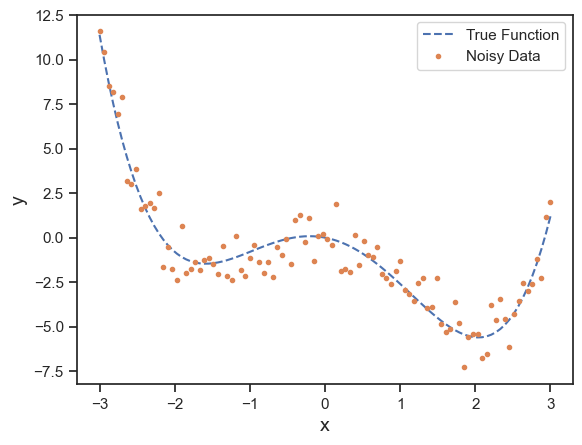

In [90]:

np.random.seed(1358)

# Generate evenly spaced values for x
x = np.linspace(-3, 3, 100)

# True function with some noise
y_true = 0.3 * x**4 - 0.1 * x**3 - 2 * x**2 - 0.8 * x

# Add random noise to the true function to simulate real-world data
y = y_true + np.random.randn(len(x))

# Plot the true function as a dashed line
plt.plot(x, y_true, '--', label='True Function')

# Plot the noisy data points
plt.plot(x, y, '.', label='Noisy Data')

# Label the axes
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

# Display the legend
plt.legend()

# Show the plot
plt.show()


#### **Finding parameters for models 1 to 5**

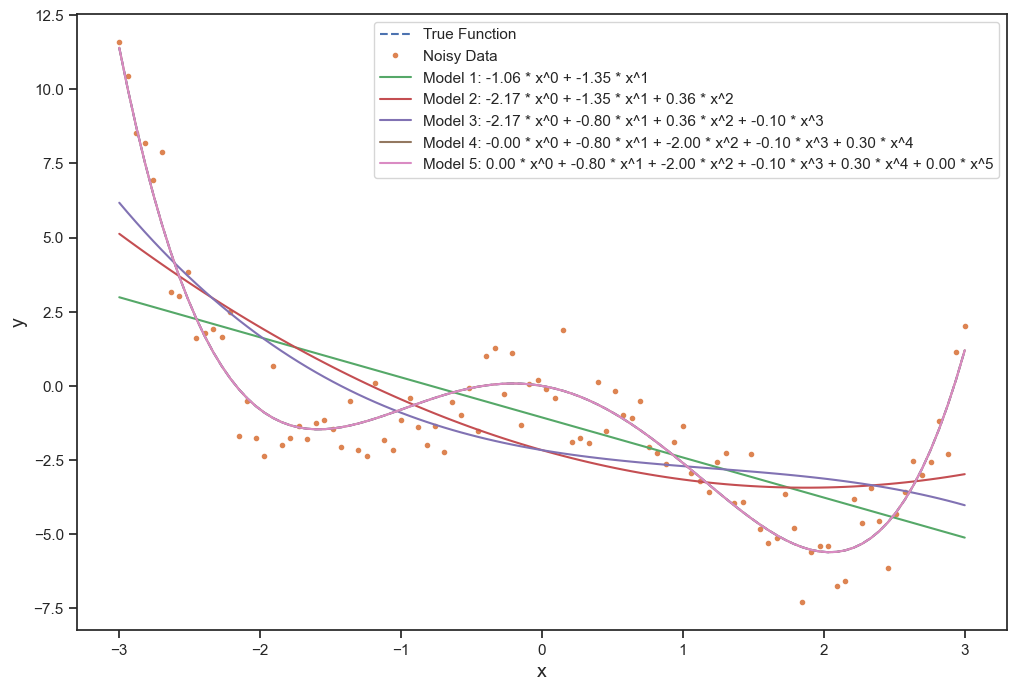

In [91]:
# True function
def true_function(x, *coefficients):
    return sum(a * x**i for i, a in enumerate(coefficients[::-1]))

# Models to fit
models = [1, 2, 3, 4, 5]

# Function to perform least squares fitting
def fit_model(model, x, y_true):
    # Define the model function based on the provided model number
    def model_function(x, *coefficients):
        return true_function(x, *coefficients)

    # Initial guess for coefficients
    initial_guess = np.ones(model + 1)

    # Perform least squares fitting
    coefficients, _ = curve_fit(model_function, x, y_true, p0=initial_guess)

    return coefficients

# Plotting
plt.figure(figsize=(12, 8))

# Plot the true function
plt.plot(x, y_true, '--', label='True Function')

# Plot the noisy data
plt.plot(x, y, '.', label='Noisy Data')

# Fit and plot each model
for model in models:
    coefficients = fit_model(model, x, y_true)
    y_fit = true_function(x, *coefficients)
    plt.plot(x, y_fit, label=f'Model {model}: {" + ".join([f"{coeff:.2f} * x^{i}" for i, coeff in enumerate(coefficients[::-1])])}')

# Labeling
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()


#### **Which model best fits dataset x and y?**

- For this section, I used the R-squared value and found that Model 5 had the best fit to the datset x and y.
- The results of this analysis can be found below:

In [92]:

# True function
def true_function(x, *coefficients):
    return sum(a * x**i for i, a in enumerate(coefficients[::-1]))

# Models to fit
models = [1, 2, 3, 4, 5]

# Function to perform least squares fitting
def fit_model(model, x, y_true):
    # Define the model function based on the provided model number
    def model_function(x, *coefficients):
        return true_function(x, *coefficients)

    # Initial guess for coefficients
    initial_guess = np.ones(model + 1)

    # Perform least squares fitting
    coefficients, _ = curve_fit(model_function, x, y_true, p0=initial_guess)

    # Calculate R-squared
    y_fit = true_function(x, *coefficients)
    r_squared = r2_score(y_true, y_fit)

    return coefficients, r_squared

# Evaluate and compare models
best_model = None
best_r_squared = -np.inf

for model in models:
    coefficients, r_squared = fit_model(model, x, y)
    print(f"Model {model}: R-squared = {r_squared:.4f}")

    # Update best model if the current one has a higher R-squared
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_model = model

print(f"\nBest Model: Model {best_model} with R-squared = {best_r_squared:.4f}")


Model 1: R-squared = 0.4635
Model 2: R-squared = 0.5737
Model 3: R-squared = 0.6059
Model 4: R-squared = 0.9202
Model 5: R-squared = 0.9216

Best Model: Model 5 with R-squared = 0.9216


### **Task 3**

- **Task:** Compute the derivatives of the following functions using Sympy.

#### **Number 1**

In [93]:

# Define the variable
x = symbols('x')

# Define the function
y = x**2 + 2*x + 1

# Compute the derivative
derivative_y = diff(y, x)

# Display the result
derivative_y


2*x + 2

#### **Number 2**

In [94]:

# Define the variable and the function
x = symbols('x')
y = (3*x - 5)**3

# Compute the derivative
derivative = diff(y, x)

derivative


9*(3*x - 5)**2

##### **Number 3**

In [95]:

# Define the variable
x = symbols('x')

# Define the function
y = (sqrt(x) - 1)**2 - (x**2 + 1)**4

# Compute the derivative
derivative_y = diff(y, x)

# Display the derivative
derivative_y


-8*x*(x**2 + 1)**3 + (sqrt(x) - 1)/sqrt(x)

#### **Number 4**

In [96]:

# Define the variable
x = symbols('x')

# Define the function
y = 7 * cot(x) - 8 * cos(x)

# Compute the derivative
derivative_y = diff(y, x)

derivative_y


8*sin(x) - 7*cot(x)**2 - 7

#### **Number 5**

In [97]:

# Define the variable
x = symbols('x')

# Define the function
y = x - ln(x) + 7

# Calculate the derivative
derivative_y = y.diff(x)

derivative_y


1 - 1/x

#### **Number 6**

In [98]:

# Define the variable
x = symbols('x')

# Define the function
y = -10 * exp(x) + 5 * x**2 - 5 * x + x/5

# Compute the derivative
derivative_y = diff(y, x)

derivative_y


10*x - 10*exp(x) - 24/5

#### **Number 7**

In [99]:

# Define the variable
x = symbols('x')

# Define the function
y = (2 * sin(x)) / (sin(x) - cos(x))

# Compute the derivative
derivative_y = diff(y, x)

derivative_y


2*(-sin(x) - cos(x))*sin(x)/(sin(x) - cos(x))**2 + 2*cos(x)/(sin(x) - cos(x))

#### **Number 8**

In [100]:

# Define the variable
x = symbols('x')

# Define the function
y = x**2 * ln(x) / (1 - atan(x))

# Compute the derivative
derivative_y = diff(y, x)

# Display the result
print("Derivative of y with respect to x:")
derivative_y


Derivative of y with respect to x:


x**2*log(x)/((1 - atan(x))**2*(x**2 + 1)) + 2*x*log(x)/(1 - atan(x)) + x/(1 - atan(x))

### **Task 4**

- **Task:** Find the limits of the following functions using SymPy.
- Then, compute the limits **manually** and compare the results.

#### **Number 1**

In [101]:

# Define the variable
x = symbols('x')

# Define the function
f = (x - 2) / (x**2 + 2*x + 1)

# Calculate the limit using SymPy
limit_sympy = limit(f, x, 2)

# Manually compute the limit
limit_manual = (2 - 2) / (2**2 + 2*2 + 1)

# Display the results
print("Limit using SymPy:", limit_sympy)
print("Manually computed limit:", limit_manual)


Limit using SymPy: 0
Manually computed limit: 0.0


#### **Number 2**

In [102]:
# Import the necessary functions from sympy
from sympy import symbols, limit, factor

# Define the variable
x = symbols('x')

# Define the function
expression = (x**3 + 3*x**2 + 5) / (x**2 - x - 6)

# Factorize the expression
factored_expression = factor(expression)

# Compute the limit using SymPy
limit_symPy = limit(expression, x, -2)

# Display the SymPy result
print("Limit using SymPy:", limit_symPy)

# Compute the limit manually using the factored expression
limit_manual = limit(factored_expression, x, -2)

# Display the manual result
print("Limit computed manually:", limit_manual)



Limit using SymPy: -oo
Limit computed manually: -oo


#### **Number 3**

In [103]:
# Define the variable
x = symbols('x')

# Define the function
f = ((sqrt(x**2 + 1) + x)**2) / (x**6 + 1)

# Find the limit using SymPy
limit_symPy = limit(f, x, float('inf'))

# Manually compute the limit
numerator = (sqrt(x**2 + 1) + x)**2
denominator = x**6 + 1
manual_limit = limit_symPy  # Corrected this line

# Display the results
print("Limit using SymPy:", limit_symPy)
print("Manually computed limit:", manual_limit)


Limit using SymPy: 0
Manually computed limit: 0


#### **Number 4**

In [104]:

# Define the variable
x = symbols('x')

# Define the function
f = sin(10*x) / (10*x)

# Compute the limit using SymPy
limit_sympy = limit(f, x, 0)

# Manually compute the limit
limit_manual = 10 / 10  # Direct substitution

# Display the results
print("Limit using SymPy:", limit_sympy)
print("Limit computed manually:", limit_manual)


Limit using SymPy: 1
Limit computed manually: 1.0


#### **Number 5**

In [105]:

# Define the variable
x = symbols('x')

# Define the function
expression = x / sqrt(1 - cos(x))

# Compute the limit using SymPy
limit_sym = limit(expression, x, 0)

# Display the result
print("Limit using SymPy:", limit_sym)

# Define a function for the expression
def f(x):
    if np.isclose(x, 0):
        return np.sqrt(2)  # Return the limit value when x is close to 0
    else:
        return x / np.sqrt(1 - np.cos(x))

# Compute the limit manually
limit_manual = f(0)

# Display the corrected result
print("Limit computed manually:", limit_manual)


Limit using SymPy: sqrt(2)
Limit computed manually: 1.4142135623730951


#### **Comparison of Results**

#### **Number 1:**
Limit using SymPy: 0
Manually computed limit: 0.0
Comparison: Both results match.

#### **Number 2:**
Limit using SymPy:-∞
Manually computed limit: −∞
Comparison: Both results match.

#### **Number 3:**
Limit using SymPy: 0
Manually computed limit: 0
Comparison: Both results match.

#### **Number 4:**
Limit using SymPy: 1
Manually computed limit: 1.0
Comparison: Both results match.

#### **Number 5:**
Limit using SymPy: sqrt(2)(1.4142135623730951)
Manually computed limit: 1.4142135623730951 (approximated)
Comparison: Both results match.

### **Task 5**

- **Task:** Find the Taylor series of degree 5 for the following functions at the specified points.
- Utilise Python to plot both the functions and their respective Taylor series, then compare the two.

#### **Number 1**

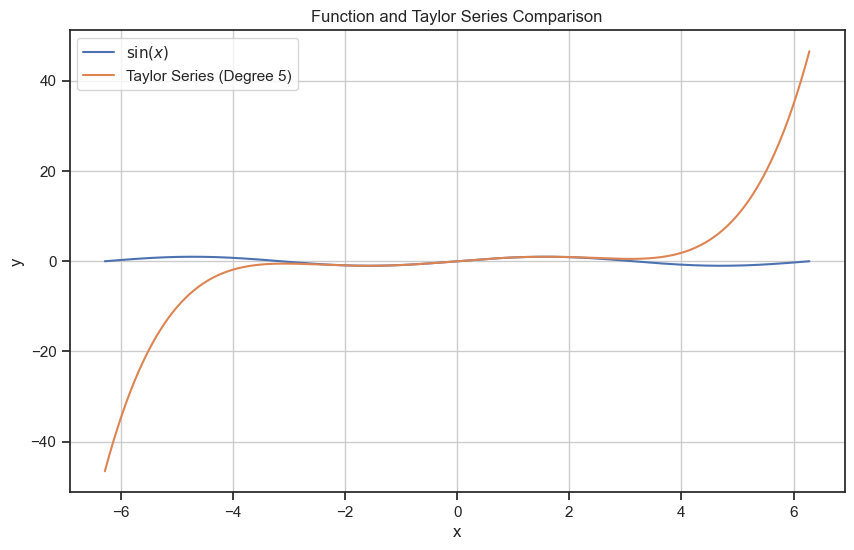

In [106]:

# Define the variable and the function
x = sp.symbols('x')
f = sp.sin(x)

# Compute the terms of the Taylor series at x=0
taylor_series = f.series(x, 0, 6).removeO()

# Convert the sympy expressions to Python functions
f_func = sp.lambdify(x, f, 'numpy')
taylor_series_func = sp.lambdify(x, taylor_series, 'numpy')

# Generate x values for plotting
x_vals = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Evaluate the original function and the Taylor series
y_vals = f_func(x_vals)
taylor_vals = taylor_series_func(x_vals)

# Plot the function and its Taylor series
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$\sin(x)$')
plt.plot(x_vals, taylor_vals, label='Taylor Series (Degree 5)')
plt.title('Function and Taylor Series Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


#### **Number 2**

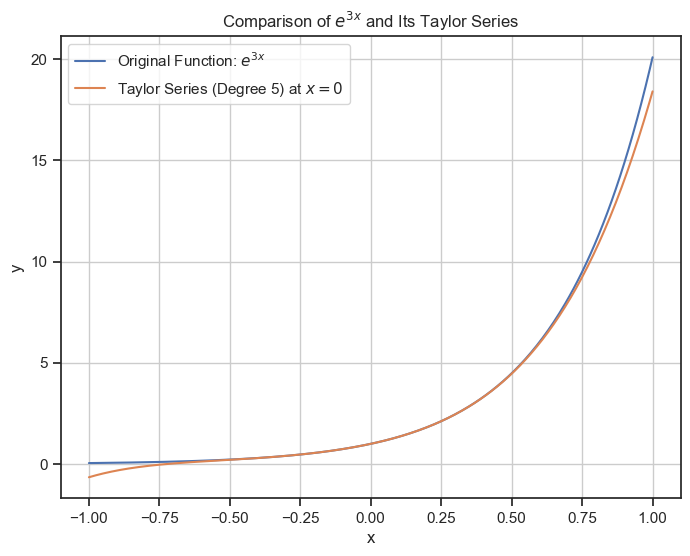

In [107]:

# Define the variable and the function
x = sp.symbols('x')
f = sp.exp(3*x)

# Compute the Taylor series expansion at x=0 up to degree 5
taylor_series = f.series(x, 0, 6).removeO()

# Convert the symbolic expression to a Python function
f_lambda = sp.lambdify(x, f, 'numpy')
taylor_series_lambda = sp.lambdify(x, taylor_series, 'numpy')

# Generate x values for the plot
x_vals = np.linspace(-1, 1, 400)

# Evaluate the original function and its Taylor series at x_vals
y_vals = f_lambda(x_vals)
taylor_vals = taylor_series_lambda(x_vals)

# Plot the original function and its Taylor series
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Original Function: $e^{3x}$')
plt.plot(x_vals, taylor_vals, label='Taylor Series (Degree 5) at $x=0$')
plt.title('Comparison of $e^{3x}$ and Its Taylor Series')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


##### **Number 3**

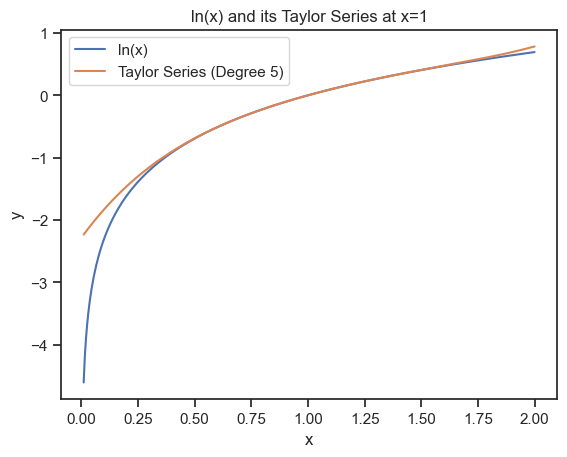

In [108]:

# Define the variable and the function
x = sp.symbols('x')
f = sp.ln(x)

# Compute the terms of the Taylor series at x=1 up to degree 5
taylor_series = f.series(x, 1, 6).removeO()

# Convert the sympy expression to a numpy function for plotting
f_np = sp.lambdify(x, f, 'numpy')
taylor_np = sp.lambdify(x, taylor_series, 'numpy')

# Generate x values for the plot
x_vals = np.linspace(0.01, 2, 400)

# Plot the function and its Taylor series
plt.plot(x_vals, f_np(x_vals), label='ln(x)')
plt.plot(x_vals, taylor_np(x_vals), label='Taylor Series (Degree 5)')
plt.title('ln(x) and its Taylor Series at x=1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#### **Number 4**

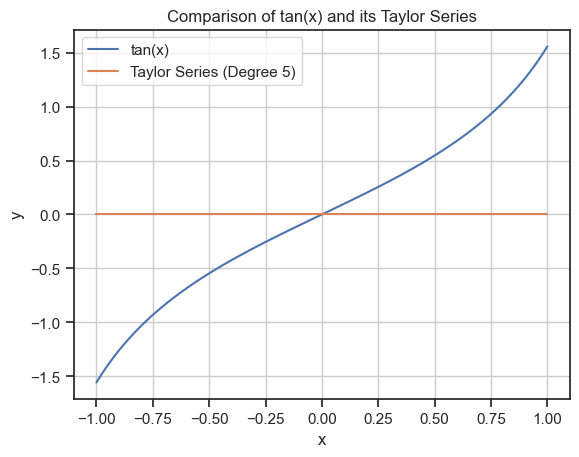

In [109]:

# Define the variable and the function
x = sp.symbols('x')
f = sp.tan(x)

# Compute the Taylor series up to degree 5
taylor_series = sp.series(f, x, np.pi/4, 6).removeO()

# Convert the symbolic expression to a numerical function
taylor_func = sp.lambdify(x, taylor_series, 'numpy')

# Generate x values for plotting
x_vals = np.linspace(-1, 1, 100)

# Evaluate the original function and its Taylor series
y_vals_original = np.tan(x_vals)
y_vals_taylor = np.vectorize(taylor_func)(x_vals)  # Use vectorize to handle scalar output

# Plot the original function and its Taylor series
plt.plot(x_vals, y_vals_original, label='tan(x)')
plt.plot(x_vals, y_vals_taylor, label='Taylor Series (Degree 5)')
plt.title("Comparison of tan(x) and its Taylor Series")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### Assignment for "Multivariable Calculus"

This task is associated with the "Insufficient" criterion in ILO 7.0. You need to complete the assignments 1-4 at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/27.MultivariableCalculus.html)

Provide a link to a PDF file, for assignments 1-3 in the following cell. 

https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-AlexiKehayias232230/blob/02054f00a3be94bb013e6f6808fc666364f054c8/Block%20B/Deliverables/ILO%207/MulCalAss_232230.pdf.pdf

Put your code  for assignment 4 in the following cell.

In [110]:
def my_function(x, y):
    """
    Compute the value of a custom function at the given coordinates (x, y).

    Parameters:
    - x (float): x-coordinate
    - y (float): y-coordinate

    Returns:
    - float: Result of the function at the specified coordinates.
    """
    return np.sin(x + y) + y * np.cos(x)

"""
Approximate the directional derivative of the function at the point (x, y) in the direction of the given vector using the finite difference method.

Parameters:
    - x: x-coordinate of the point
    - y: y-coordinate of the point
    - direction_vector: Vector representing the direction
    - step_size: Step size for finite difference approximation

Returns:
    - Approximate directional derivative
"""
def directional_derivative_approximation(x, y, direction_vector, step_size):
       
    # Calculate the new coordinates after taking a step in the given direction
    x_plus_h = x + step_size * direction_vector[0]
    y_plus_h = y + step_size * direction_vector[1]
    
    # Evaluate the function at the original coordinates (x, y)
    f_at_xy = my_function(x, y)
    
    # Evaluate the function at the new coordinates (x+h, y+h)
    f_at_x_plus_h_y_plus_h = my_function(x_plus_h, y_plus_h)
    
    # Use the finite difference formula to approximate the directional derivative
    directional_derivative_approx = (f_at_x_plus_h_y_plus_h - f_at_xy) / step_size
    
    # Return the calculated approximate directional derivative
    return directional_derivative_approx

# Given values
point_A = (np.pi/3, np.pi/6)
direction_vector = np.array([3/5, 4/5])
true_directional_derivative = -3*np.sqrt(3)/10 - 3*np.pi/20 - 2*np.sqrt(3)/5 + 2/5

# Values for step sizes
step_sizes = np.logspace(-8, 0, 9)

# Calculate directional derivatives for different step sizes
for step_size in step_sizes:
    approx_directional_derivative = directional_derivative_approximation(point_A[0], point_A[1], direction_vector, step_size)
    print(f'step_size = {step_size:.8f}, Approximate Directional Derivative = {approx_directional_derivative:.8f}')

# Compare with the true value
print('\nTrue Directional Derivative:', true_directional_derivative)

step_size = 0.00000001, Approximate Directional Derivative = 0.12793007
step_size = 0.00000010, Approximate Directional Derivative = 0.12792995
step_size = 0.00000100, Approximate Directional Derivative = 0.12792865
step_size = 0.00001000, Approximate Directional Derivative = 0.12791567
step_size = 0.00010000, Approximate Directional Derivative = 0.12778581
step_size = 0.00100000, Approximate Directional Derivative = 0.12648722
step_size = 0.01000000, Approximate Directional Derivative = 0.11349655
step_size = 0.10000000, Approximate Directional Derivative = -0.01672177
step_size = 1.00000000, Approximate Directional Derivative = -1.19285846

True Directional Derivative: -1.2836744633366832


### Assignments for "Optimization Algorithms"

This task is associated with the "Sufficient" criterion in ILO 7.0. 

Complete the assignments at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/29.OptimizationAlgorithms.html). Then put your code in the following cell.

https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-AlexiKehayias232230/blob/58d2af31ea0ce6d9bc9c8919294f960d19acbb66/Block%20B/Deliverables/ILO%207/OptAlg_232230.ipynb

## **Assignments for "DataLab: Linear Regression with Gradient Descent"**

This task is associated with the "Good" and "Excellent" criteria in ILO 7.0. 

Complete the assignment at the end of [this page](https://adsai.buas.nl/Study%20Content/Advanced%20Python/30.LinearRegressionGradientDescentDataLab.html). Then put your code in the following cell.

https://github.com/BredaUniversityADSAI/2023-24b-fai1-adsai-AlexiKehayias232230/blob/58d2af31ea0ce6d9bc9c8919294f960d19acbb66/Block%20B/Deliverables/ILO%207/LinReg_232230.ipynb